# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [6]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [7]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

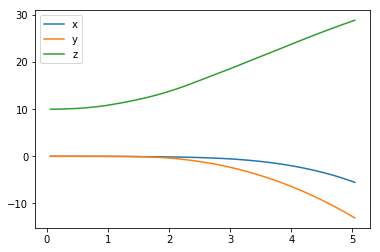

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

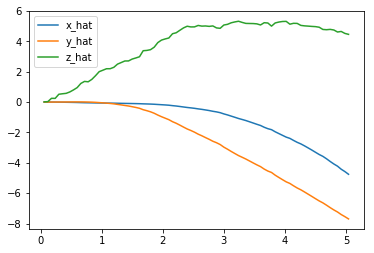

In [9]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

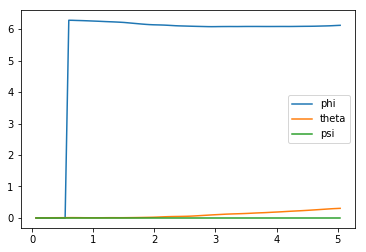

In [10]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

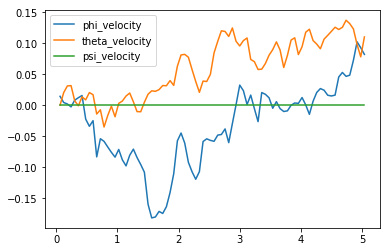

In [11]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

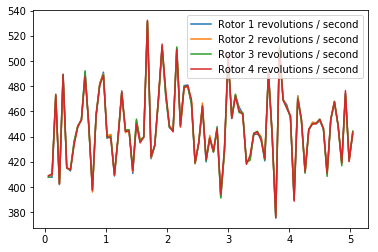

In [12]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [13]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -5.53617486 -13.07518232  28.86939576   6.12188883   0.30417573   0.        ]
[-4.75625042 -7.69586022  4.46039469]
[ 0.0820885   0.11028762  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [14]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 30.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        print(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

[-295.46776099  -75.4857278   235.47810193    4.14153125]
[-295.6873089   -72.24937207  229.98084739   -1.19334872]
[-291.08776151  -63.32013888  226.12404833   -3.51795147]
[-289.25001266  -58.97282844  224.58888568   -3.62232875]
[-290.20441143  -59.75265163  224.99520389   -1.6109455 ]
[ 243.4094162   145.8326864    66.10771026   91.3507669 ]
[ 100.8659886    74.78636163 -133.74432858  -10.86542446]
[ 172.37909378  371.1038026   -23.80945667  -95.60178008]
[ 150.84299561  355.23123167  -33.22869926 -106.81665822]
[ 140.80303783  361.27206721  -38.25896514 -116.32891875]
[ 185.91782042  113.91444738   53.1757445    72.58655061]
[ 187.333434    125.74797081   52.49574591   71.31217118]
[ 184.63946513  124.1657838    48.27006341   69.82189323]
[ 183.54971599  122.30618743   43.22748966   68.87555515]
[ 184.10554387  120.31561176   37.353263     68.42952667]
[ 186.34321513  118.24456994   30.62226212   68.46192444]
[ 190.3175696   116.11741374   23.01730681   68.9726337 ]
[  59.35967705

Episode =    6, score = -18.282 (best = -18.176), noise_scale = 1.6[-325.61828831  -60.27805407  223.28706429  -15.63338205]
[-329.35992376  -57.89115314  214.37723368  -24.0060116 ]
[-326.26955311  -45.71251054  208.90040493  -27.97507204]
[-324.92155022  -38.16860991  206.83460083  -29.01159584]
[ -54.36678835  182.09858223  174.03157502   32.47408524]
[ 201.98810239  179.12789113   35.87733625   50.93680158]
[ 196.21390004  167.68885572   41.17857495   57.03241307]
[ 146.41727886  385.33035372  -70.93330624  -97.22828985]
[ 254.41931373  430.09228199  133.24131997  -17.05304363]
[ 161.78233761  152.04317578   21.90823946   37.29676782]
[ 165.2250468   164.24443907   23.38364896   39.69129468]
[ 161.99004473  160.47265099   20.51098265   39.67890886]
[ 160.26552131  157.11099624   16.64057813   39.73776728]
[ 160.07632484  154.20624783   11.78383387   39.86669757]
[ 161.44081466  151.74899857    5.93864651   40.07188823]
[ 164.38773342  149.71815492   -0.89605355   40.37033031]
[ 168

[ 297.86472164  107.80304496  -82.16092314   16.7737711 ]
[ 307.78052608  113.59137694  -93.83693662   16.10991651]
[ 317.94091746  117.24524866 -106.14900593   16.95370964]
[ 328.22987075  118.6456823  -119.08655743   19.29344908]
[ 338.54666727  117.74583487 -132.63833616   23.07307689]
[ 262.29864775   28.90479998 -295.69651645  -42.60006218]
Episode =   12, score = -18.358 (best = -18.106), noise_scale = 1.6[-160.31415445 -117.90975517  243.76084882   55.44025875]
[-156.65016678 -115.63256723  242.90330779   55.47743567]
[-144.04600068  149.58499706  214.41149874 -116.8262752 ]
[-145.92461566  148.17219206  212.48737762 -116.00710411]
[ 101.83387362  322.72288889  190.02460093 -101.13302822]
[ 273.08854022   44.47370311   68.68710702   66.1434431 ]
[ 267.03019589   55.39056739   68.8752995    60.19599959]
[ 260.41638218   62.38308495   68.58564785   55.8743855 ]
[ 254.41546806   66.58516997   67.60750964   53.56222157]
[ 248.91570311   68.03796221   65.86503398   53.09233552]
[ 243

[ 103.27620564  270.38037483  146.6273135  -172.96838647]
[ 260.23831614  258.12891757   -9.02881976 -151.94966236]
[ 251.68770436  259.96875301   -6.32200423 -148.08010422]
[ 243.98280799  258.61863985   -7.73012312 -145.57944701]
[ 238.06034889  258.35624603  -10.81583758 -143.44541712]
[ 233.89248283  259.33699486  -15.55555603 -141.72194016]
[ 231.40929786  261.65395095  -21.91466082 -140.46066004]
[ 230.53726758  265.38268437  -29.86226144 -139.71548466]
[ 231.20525002  270.59491463  -39.37432062 -139.54126428]
[ 233.3468919   277.36821323  -50.43207801 -139.98785238]
[ 236.89241379  285.78228684  -63.02398673 -141.10088991]
[ 241.76122311  295.92270682  -77.1444037  -142.92215914]
[ 247.85511621  307.88546838  -92.79191375 -145.49021   ]
[ 255.05188426  321.78068331 -109.96976638 -148.84169774]
[ 378.10793843  426.95720387  -26.51078024  -57.85019909]
[ 306.01769148  122.48810618 -179.04941245  -44.52849655]
Episode =   18, score = -18.230 (best = -18.056), noise_scale = 3.2[-111

Episode =   23, score = -18.483 (best = -18.056), noise_scale = 3.2[-131.1468189  -256.76467423  272.10300808   88.93433618]
[-128.31155563 -254.18274305  269.00723861   86.05784228]
[-124.18149486 -248.69403412  263.73806666   84.44640063]
[-124.45520056 -243.17806867  259.53623575   82.21904722]
[-129.05282731 -237.71109382  256.49092897   79.4155539 ]
[  98.56878083  -41.88399971  230.45471106   73.40902694]
[ 289.46461718  -47.89588998   73.45990744   83.05485379]
[ 269.45777257  -43.98069289   69.72933945   74.48216596]
[ 256.62367037  -30.85555886   71.07045609   71.13077301]
[ 244.36834546  -21.56919738   70.56299455   68.33589812]
[ 233.40617996  -14.06789253   68.81862365   66.36747698]
[ 223.72135443   -8.00046191   65.88239253   65.11724771]
[ 215.21348818   -3.17099378   61.70108437   64.43479803]
[ 207.81785548    0.69548635   56.22580848   64.17315889]
[ 201.505873      3.91009593   49.41941771   64.1945278 ]
[ 196.27996275    6.78301709   41.26358754   64.3785418 ]
[ 192

[ 200.68045997  207.85738793  -69.44921193  -77.52117487]
[ 217.39989756  217.88003881  -85.60971698  -89.07012743]
[ 235.90081228  228.78687048 -102.9003026  -101.57372628]
[ 256.20788294  240.51254019 -121.2942302  -115.02154764]
Episode =   29, score = -18.025 (best = -18.025), noise_scale = 1.6[-294.6019455  -192.03659875  238.29171109  196.97510846]
[-295.67777668 -192.35423009  236.92141207  195.17767194]
[-107.26877512  -92.80601846  357.63608037   50.3807924 ]
[-270.25181715 -176.5461707   234.57022528  190.55461503]
[-322.0022199   -16.01571251  188.95885377   68.72168665]
[-275.7177926  -184.86208872  221.2814506   188.82623777]
[-369.74789115 -333.94761519  193.43536263 -319.29740387]
[ 156.29604319  156.85458651   22.98193634    2.88514093]
[ 157.97747791  151.60356384   19.7322405     5.95009843]
[ 157.21734619  146.6770693    18.46980951    7.61030859]
[ 157.59324953  142.69052412   16.31511982    8.43326096]
[ 159.11877569  139.62569123   13.2937621     8.45153863]
[ 161

Episode =   34, score = -18.189 (best = -17.996), noise_scale = 1.6[-207.33630422 -173.53997619  251.16947345  224.05936063]
[-207.30438975 -173.2580184   250.87298401  224.16264493]
[ 204.85767033  286.25024092  -43.59203879  116.847018  ]
[ 191.85517771  107.82862404   37.45479272  243.63775808]
[-202.05532515 -167.17823812  245.41446745  219.33749446]
[-195.57535582 -161.4852266   239.62040915  218.73558582]
[-191.0239489  -157.85415244  235.23179292  216.75536202]
[-186.51034895 -154.49525832  230.62046488  214.33403751]
[-169.75594394   26.21975371  142.62597527   82.15716579]
[-164.9796774    29.3775601   136.8831472    78.36178561]
[-159.79075243   33.18572495  131.09685237   74.73418893]
[-154.66559611   36.36472582  125.078462     70.73338735]
[-149.53384658   39.04211375  118.71492418   66.27965508]
[-144.31410413   41.37759126  111.88791892   61.30844264]
[-138.92368214   43.53328796  104.47515598   55.77024189]
[-133.28183166   45.66527361   96.36102689   49.63598827]
[ 106

Episode =   39, score = -17.922 (best = -17.890), noise_scale = 3.2[-417.95016139 -235.86194061  409.43106563  251.62780609]
[-409.49826021 -231.83822552  399.65654798  238.79896983]
[-393.16821408 -211.43735953  391.60540134  237.40235117]
[-384.21656555 -199.48908778  386.8267374   238.73479893]
[-382.76379629 -195.90004669  385.37962035  242.038924  ]
[-387.46910621 -199.51083751  386.50367698  246.77799308]
[-301.91955604 -110.00667839  507.74060175  220.95467669]
[-379.4136964  -358.56907051  238.44096059  174.42184875]
[-336.62250366   63.28745355  459.22802432  115.52587675]
[   4.85547252  127.24583862  177.46005536  174.100288  ]
[  -2.21631485  111.53966752  173.51642344  176.01247077]
[ -14.48849733   97.92625032  175.09164733  177.39013562]
[ -25.80285972   84.52324603  175.38796919  177.47160792]
[ -35.24029756   72.24574992  174.10082129  176.25905655]
[ -42.23630402   61.44863915  170.94735134  173.75475199]
[ -46.53101611   52.2773243   165.80560013  169.99585929]
[ -48

[ -91.5621732   -23.10725832  176.38957763  220.29615653]
[ -66.12727727  -19.00399845  157.36982293  207.50386299]
[ -38.50428298  -13.28486313  136.49900147  193.59619865]
[  -8.65580799   -5.993954    113.8250657   178.55030897]
[  23.35110592    2.80332612   89.45274948  162.34144756]
[  57.28516496   13.00701508   63.56599943  144.98860595]
[ 172.64310191 -121.72963352 -139.86951772   20.83704915]
[ 178.30731557  223.23030834  -83.02823055   20.90529304]
[  2.14716397e+02   2.35506808e+02  -1.13342114e+02   1.34706324e-01]
[ 251.45747312  250.08077037 -143.9190296   -20.69742107]
Episode =   44, score = -18.444 (best = -17.890), noise_scale = 3.2[-342.40103048 -240.26390449  332.15358591  267.52604259]
[-341.46124809 -239.60017675  329.71986584  265.66875826]
[-339.63162471 -235.21677204  328.04022642  266.56126454]
[-339.38226033 -233.00425793  327.31618775  267.12690854]
[  40.91098668 -137.4981965   171.30684543  277.50026457]
[  67.41890095 -267.09958423  -17.25728052  233.724

[-299.25903187 -325.48998383    1.16880401 -158.16050123]
[ -97.81968549   96.03194069  103.85725661  138.09901582]
[ -61.38823522  109.43266047   82.79069038  122.32307481]
[ -24.22013468  122.33241524   59.41288832  103.95447055]
[  14.31175371  137.39092628   34.56618159   84.22744634]
[  54.40473081  154.62012571    8.13806194   63.05190841]
[  96.2203612   174.03109794  -19.92666896   40.24482153]
[ 139.78285371  195.54660005  -49.60371517   15.62930114]
[ 184.98631904  218.99048208  -80.80139153  -10.87339688]
Episode =   49, score = -17.759 (best = -17.759), noise_scale = 1.6[-368.57699798 -292.10073522  326.33156268  372.47817121]
[-367.4949774  -291.46150561  325.25960454  370.61826367]
[-363.0547886  -287.1955489   324.38397589  370.79375477]
[-356.40507445 -283.41605254  322.73668203  371.17304528]
[-516.74486887 -492.87796567  156.26339493  -11.06232076]
[-341.06970347  -79.45675169  294.56672996  306.05207041]
[-333.77488309  -81.94861459  286.15791422  299.16738058]
[-323

[-176.04588445   53.61183941  153.33047064  289.45590457]
[-135.13313126   58.18382765  132.94888094  279.41077485]
[ -91.61913501   65.69936792  110.47858678  267.62951509]
[ -45.71122505   75.96159097   86.06760328  254.29987212]
[   2.46836196   88.69698301   59.85373259  239.5710024 ]
[  52.91787695  103.62764836   31.94517298  223.41011902]
[ 105.65465182  120.53147819    2.36469658  205.74475833]
[ 160.64017502  139.2150239   -28.89753488  186.60629002]
[  63.58914967  -41.63456548 -247.41199928 -199.67716618]
[ 304.62232238  404.28419919 -178.0595235    67.49731462]
[ 146.63438401  246.36284025 -246.67023098   67.68449604]
[  32.72948946  255.59821099 -127.16408543   66.86241123]
Episode =   54, score = -19.365 (best = -17.759), noise_scale = 3.2[-428.28830655 -263.13379092  378.43175056  287.02045591]
[-427.9623789  -264.98650671  374.04608821  274.67985589]
[-421.19905409 -251.70362281  373.31413915  272.67077752]
[-416.91666592 -242.46008169  372.47849574  273.48648443]
[-415

[-297.38706018 -304.10264645  247.59203635  391.01793397]
[-264.28169026 -282.66141399  241.47586697  394.41619144]
[-227.59344963 -370.08558227   75.8687421   328.9392781 ]
[-201.22260982   59.15952967  315.08831835  396.28660138]
[-148.48207961 -238.13640327  190.46636646  375.18092902]
[-104.59691156 -218.74066363  172.63860136  365.16166166]
[ -56.10883404 -197.1098668   150.20767992  353.22978143]
[  -5.55672044 -172.37428079  126.19422093  339.52552411]
[  46.86138169 -144.87548905  100.84096569  324.39394354]
[ 100.87808049 -115.34831092   74.39608275  308.02203997]
[  76.58124611 -173.28126532  -85.38709471  370.50284594]
[-197.84826167 -217.36784726  182.1391771   272.39254182]
[-133.38915193 -180.56899483  150.23728192  251.6427898 ]
[ -70.30832204 -144.5663012   117.02607995  229.96013924]
[  -9.50475969 -108.44812238   84.59004259  207.05900064]
[  50.18406408  -71.66484416   52.44033019  182.96112144]
[ 109.10424419  -34.38093423   20.42369567  157.66860827]
[ 167.51988761

[-432.16378113 -369.54702297  367.47278037  308.31646421]
[-432.30608283 -368.77809252  367.56350429  309.5819201 ]
[-178.35162545 -361.58171289   45.56945095 -154.84451802]
[  -3.62736274 -160.56191341  217.21334099  242.75369598]
[  -5.66713771 -153.63838808  220.82133921  247.63516439]
[  -8.73086346 -154.73706876  219.69570136  246.85075286]
[  -9.80624235 -153.91291111  217.02889912  244.78729349]
[  -8.88627201 -151.03735838  212.88339495  241.51450421]
[  -5.96637213 -146.10340071  207.26025828  237.04717641]
[  -1.02257594 -139.11037996  200.15623399  231.40636375]
[   5.98264082 -130.07442752  191.55787775  224.60868822]
[  15.0998824  -119.01695509  181.44595108  216.66670398]
[  26.39001991 -105.96200233  169.79790294  207.5879007 ]
[  39.92041984  -90.93535997  156.59006372  197.3748348 ]
[  55.75670084  -73.96697671  141.79953618  186.02749091]
[  73.95122261  -55.09465266  125.40897818  173.54563172]
[  94.53968582  -34.3641711   107.40664358  159.93107353]
[ 117.53865961

Episode =   68, score = -18.287 (best = -17.759), noise_scale = 3.2[-346.96125325 -266.08219835  304.37007753  353.88125039]
[-345.2551151  -264.95020077  303.26065291  351.7570541 ]
[-340.15937231 -259.65608782  302.17396179  351.27561231]
[-333.03167044 -254.63803173  300.08846849  350.52029855]
[-456.51913733 -462.54674597  128.02679518  -51.06604983]
[-268.64001052  -16.26805883  276.94525191  285.15009857]
[-259.57526826  -16.18024868  270.14147708  280.06210051]
[-249.1327922   -11.07898908  266.20567212  278.33384278]
[-238.13779532   -8.67795092  261.45488982  276.00028055]
[-226.39463444   -8.47239685  255.77458869  272.74570999]
[-213.69454246   -9.81805044  249.09942871  268.30265158]
[-199.85298778  -12.05865875  241.37978449  262.44739004]
[-184.73134954  -14.57802581  232.56968219  255.01555396]
[-168.24802843  -16.83210565  222.62878558  245.919167  ]
[-150.37625125  -18.3740127   211.53398225  235.15244274]
[-131.13089871  -18.86666745  199.28659509  222.77700672]
[-110

Episode =   73, score = -19.274 (best = -17.759), noise_scale = 3.2[-420.88681885 -305.99145224  516.80578756  455.81070755]
[-418.292348   -304.6154337   513.42232819  449.14475323]
[-412.19200523 -296.60158798  512.35313103  448.67152545]
[-410.00821587 -292.70528319  512.40681076  450.73295729]
[-412.30666215 -293.01275718  513.75414287  455.38309263]
[-174.88198434 -105.87239816  526.64971348  385.80734919]
[-174.71359003 -413.92009308  228.30729944  380.03264192]
[-414.913012   -306.95248421  505.11555246  449.72336638]
[-347.26985171 -164.06962122  631.05891704  366.35241981]
[-351.49104459 -248.98963646  508.67557167  448.58656312]
[-524.08711807 -465.1194524   340.63132235   81.61664099]
[-345.80210454  -98.06681764  463.12195237  384.83011674]
[-373.96315528 -119.93757542  465.91795106  392.97043276]
[  67.35166502   68.84310192  350.10979466  327.04017007]
[  41.93662799   51.13191631  356.86285905  336.47363676]
[  19.96691528   31.57085019  359.40762996  342.79949018]
[   0

[  99.47238222  291.90046539 -101.84183491   90.08793613]
[ 134.47561718  311.15889178 -139.25250602   67.09411498]
[ 171.41825654  333.33033223 -179.6938102    42.02856797]
Episode =   78, score = -19.029 (best = -17.759), noise_scale = 3.2[-414.49591607 -281.02494156  316.87342157  352.57769892]
[-414.40091307 -282.80340718  312.0522337   346.55699323]
[-409.4287557  -273.80015193  311.69459161  347.60700824]
[-403.51425563 -266.76941992  310.66456954  349.17987603]
[-396.35815689 -261.50996666  309.08888007  351.66977073]
[-387.89019691 -258.55270929  306.70938889  354.74188607]
[-537.00017644 -485.48833133  129.8360473   -14.44575389]
[-316.11629251  -82.61986009  272.42503139  325.55243309]
[-305.56693735  -88.50715727  265.98862396  325.34445067]
[-291.7693784   -91.41879086  260.56540956  326.44275609]
[-275.61929563  -95.87414257  253.40349133  325.66224902]
[-256.834053   -100.81758902  244.32110823  322.76371525]
[-235.35498867 -105.33569076  233.20856651  317.70192239]
[-211

[-157.02806983  -61.83880759  148.63463399  205.19719858]
[-121.22446491  -51.44250319  128.50208298  194.94395238]
[ -82.93398966  -38.79824354  105.70124974  183.27418236]
[ -42.23056608  -23.8782158    80.4049489   170.34690628]
[   0.73589944   -6.84621284   52.89409731  156.308274  ]
[  45.77905021   12.02965887   23.48244309  141.29556696]
[ 138.01545464  -87.32374154 -235.59028192   -7.01951071]
[ 171.39155389  244.77922037 -201.98826886    4.52862388]
[ 224.44898419  267.25028453 -240.54953605  -15.10308168]
Episode =   83, score = -18.872 (best = -17.744), noise_scale = 3.2[-495.96773989 -248.58389637  399.00840544  197.32526754]
[-487.28869926 -234.71195564  370.42953141  163.5363212 ]
[-461.2878537  -181.72953353  350.48004779  162.58593279]
[-448.14410228 -147.69330058  339.56036266  167.25265997]
[-446.14130955 -133.66635044  336.10252162  174.63103192]
[-451.54482844 -136.23314602  337.08693756  182.97498313]
[-410.85383232  -65.69586929  459.49218503  147.75031918]
[-448

[ 113.11523688   66.52188584  131.31988051  226.9307537 ]
[ 115.82520258   56.60882709  128.36171905  220.19720775]
[ 120.72499459   48.8348257   123.74692396  211.97481051]
[ 128.09280151   43.3478861   117.23227525  202.35765978]
[ 137.91694364   40.13984053  108.79614571  191.43986452]
[ 150.12693381   39.11590963   98.46393701  179.25805858]
[ 164.68190013   40.16132544   86.2568865   165.79266564]
[ 181.58777117   43.18341072   72.16656302  151.01567987]
[ 200.85789955   48.11801904   56.16102423  134.92706114]
[ 222.4681952    54.91389608   38.20523273  117.55450773]
[ 246.33830019   63.51476861   18.27942933   98.92993342]
[ 272.34035615   73.84995107   -3.61192903   79.06566653]
[ 300.3235937    85.8374583   -27.44317641   57.94542971]
[ 330.13727019   99.39527884  -53.17661171   35.5327176 ]
Episode =   88, score = -18.382 (best = -17.744), noise_scale = 3.2[-407.21115311 -404.00393916  359.23494635  259.61294687]
[-359.78834397 -470.46084114  110.107956    154.58135658]
[-403

[ 110.33385278   82.20839291   14.96841151   36.27134029]
[ 121.79716954   92.291899      3.82692804   28.52371922]
[ 134.64927506  103.74403283   -8.53592406   19.89630927]
[ 148.86963104  116.5634589   -22.11532511   10.36581474]
[  1.64449260e+02   1.30747672e+02  -3.69094927e+01  -9.96242478e-02]
[ 181.39073979  146.29136657  -52.91902212  -11.53838119]
[ 199.70702206  163.18433375  -70.14522458  -23.99401376]
[ 219.42029086  181.40884073  -88.58768967  -37.51512126]
[ 240.56215761  200.9366021  -108.24154364  -52.1561873 ]
[ 263.17596863  221.72566823 -129.09503828  -67.97818756]
[ 287.32079208  243.71790702 -151.128432    -85.04658618]
Episode =   93, score = -17.874 (best = -17.744), noise_scale = 3.2[-344.70128405 -242.40040561  407.62167276  176.99091263]
[-320.76497279 -228.35390244  402.3742219   172.51962597]
[-285.72718637 -211.2032499   387.46739108  175.9993541 ]
[-267.71624762 -204.74790959  378.47423215  179.40024241]
[-240.27152827 -293.04876277  168.47255333  121.654

[-222.51917874  -47.5672772   260.11772572  342.10818462]
[-187.04635932  -43.94772898  244.63888331  333.8802929 ]
[-148.91656806  -38.13624042  226.69474273  323.70502938]
[-108.02301203  -29.70506181  206.26473172  311.71983404]
[ -64.33458928  -18.55788769  183.41788952  298.01662052]
[ -17.77600133   -4.68723345  158.16692168  282.69243624]
[  31.78085176   11.9560018   130.45231215  265.80262873]
[  84.27997168   31.27373881  100.32918177  247.37941904]
[ 139.46633895   52.93578004   67.99435655  227.4963399 ]
[ 197.02469362   76.45635898   33.67216946  206.20040709]
[ 256.74509905  101.43476384   -2.61121928  183.28718844]
[-263.3932142  -302.61782041  -49.36476331 -234.24872519]
[ -17.12315112  143.34169651   -6.46478235   72.68218702]
[  49.93372805  175.60083617  -50.0802411    43.0574956 ]
[ 117.71591457  208.63482825  -96.3246233    11.71970443]
Episode =   98, score = -18.992 (best = -17.744), noise_scale = 3.2[-517.64199265 -514.35941363  423.17045752  400.9957789 ]
[-473

[-347.55077585 -399.39341156  403.91648404  205.89660491]
[-368.66504105 -402.2051422   403.5606803   205.5499585 ]
[  44.62665059 -170.41723788  259.99155664  133.57312621]
[  20.29711931 -172.4836075   258.9955961   133.35174201]
[  -1.45052179 -172.0118611   255.6998245   132.31352002]
[ -20.64627961 -168.93540618  250.29354004  130.27145521]
[ -37.11612624 -163.30627192  242.79296284  127.22285778]
[ -50.81217079 -155.27888694  233.34031488  123.20032774]
[ -61.87664809 -144.97525343  222.04400685  118.27596775]
[ -70.36790471 -132.41673872  208.82733638  112.4045427 ]
[ -76.05446652 -117.58350256  193.60302158  105.48216004]
[ -78.80575214 -100.55916719  176.47825651   97.57007532]
[ -78.80134359  -81.54145225  157.65234465   88.82548758]
[ -76.26352919  -60.71565402  137.24112022   79.33577364]
[ -71.26042345  -38.20965598  115.26710055   69.10072885]
[-63.73279821 -14.11379192  91.72451129  58.0941561 ]
[ 173.25533239  175.14619606   88.60170297  -71.06926328]
[ 396.55919197  27

[ 109.6877492   101.51692545  -94.02479314  -19.935416  ]
[ 134.79081442  135.81500873 -124.35978405  -43.25459027]
[ 162.29477392  172.32039969 -156.84658318  -67.76548891]
Episode =  107, score = -17.808 (best = -17.744), noise_scale = 3.2[-422.86847074 -378.89405046  469.09793173  305.57270896]
[-407.75180959 -367.77468796  466.14446254  304.34610787]
[-382.19440881 -355.57139489  453.9963126   307.15167273]
[-384.1097512  -376.33352464  250.02584973  201.75621267]
[-407.34309633  -59.40219084  304.68594341  195.83364381]
[-393.73508482 -366.31989542  437.23435242  285.34221331]
[-394.24801701 -344.08041387  450.0365155   297.24709399]
[-385.47455777 -276.50598862  587.08584212  265.79922719]
[-366.75287147 -345.22933799  455.31839104  296.19132363]
[-387.73031841  -56.83819996  299.54860245  190.01775146]
[-241.64517879   64.72079339  289.01549307  158.75177497]
[ -37.86134807  109.53493658  153.26065856  211.32210262]
[ -50.83962832   86.88585944  167.63639725  208.26638466]
[ -54

[  50.41601454   65.84664594  224.03425429  241.73640566]
[  39.58321264   51.43750259  227.64597834  237.40770396]
[  30.73999187   38.75913125  229.26278896  231.41532293]
[  24.11029591   27.79415479  228.85369892  223.75507975]
[  19.74810079   18.47213338  226.46811228  214.46663662]
[  17.58168179   10.7193975   222.17414297  203.6270257 ]
[  17.46428916    4.50424136  215.98944862  191.33534797]
[  1.92450262e+01  -1.52699750e-01   2.07839211e+02   1.77665030e+02]
[  22.85173585   -3.21954415  197.5896145   162.59495679]
[  28.33396328   -4.71339373  185.15080027  145.9904864 ]
[  35.80979544   -4.72896406  170.57336458  127.68174942]
[  45.34163789   -3.41370605  154.05708947  107.59388658]
[  56.84635104   -0.91581759  135.86606858   85.82643258]
[  70.12031702    2.6530468   116.22611489   62.62520358]
[ 84.94543943   7.22504543  95.27875423  38.28550961]
[ 101.17146788   12.77118627   73.09057969   13.06607209]
[ 118.72424768   19.3050574    49.6619211   -12.84926147]
[ 137.

[-371.83662522 -446.37178017  401.03095649  271.76715745]
[-367.33161976 -436.00280314  394.51498051  267.11497824]
[-368.42933276 -427.86750864  388.27168394  262.29611686]
[-374.49094977 -421.64845568  382.09925767  257.37464539]
[-186.18245752 -226.87853756  444.73149171  200.02995481]
[  -8.40753816 -166.37105786  319.5499333   245.8819835 ]
[ -18.85247036 -161.72284799  305.59311304  242.28952369]
[ -38.08916661 -158.18618144  297.13003262  235.04082699]
[ -54.91014422 -151.96860732  286.78875995  226.86243458]
[ -69.33154324 -143.25920557  274.73369952  217.74093082]
[ -81.27222379 -132.26249078  261.10159365  207.71462693]
[ -90.70866003 -119.17815033  246.06191733  196.86027663]
[ -97.75498962 -104.13954284  229.72264013  185.26092521]
[-102.53527406  -87.1771929   212.05130549  172.93632339]
[-104.99911217  -68.2614893   192.95008465  159.85868545]
[-104.98879216  -47.4153818   172.39936856  146.03734954]
[-102.4190495   -24.78032084  150.49574154  131.53750778]
[ -97.33176716

[ 113.85481678  229.83028859  -98.05872588  -43.54302786]
[ 137.50409823  256.67229442 -131.97951581  -67.20093874]
Episode =  121, score = -18.131 (best = -17.744), noise_scale = 3.2[-426.34130824 -280.57380074  356.18992581  358.87917453]
[-427.47792457 -282.48244224  346.67402953  349.40010198]
[-424.95516335 -271.89088238  342.66097524  347.71614289]
[-422.38172485 -263.80881659  340.23229592  347.66145013]
[-419.37581167 -257.72893731  339.97525984  350.06068173]
[-415.9327468  -254.36162265  341.84471809  354.76303811]
[-412.03950789 -254.03057219  345.61614591  361.37854716]
[-364.46965383 -392.35900056  107.94944368  261.88621352]
[-367.54757528  -73.86356849  210.05249564  265.33970402]
[-355.56626497  -72.75465838  208.36593971  268.77150631]
[-342.86369724  -70.30477806  211.93563094  275.02009272]
[-328.59764351  -71.63764604  215.99772998  280.46499283]
[-312.36082596  -74.76272425  219.58782215  284.43676956]
[-293.95034255  -78.14459291  221.85107228  286.45381969]
[-273

[  81.91198846  -64.16430113  149.52738982  102.82961347]
[  84.54078241  -45.11584893  128.20091992   89.69526799]
[  90.15953821  -23.90587171  104.16906383   76.00223779]
[ 99.1492611   -0.46858736  77.30889139  61.70871928]
[ 111.60310698   25.00362108   47.90751943   46.86949926]
[ 127.18666804   52.14391725   16.45414016   31.6228946 ]
[ 145.30349465   80.5752627   -16.61323776   16.12986858]
[ 165.31301907  110.00288555  -51.02135368    0.51722167]
[ 186.68299955  140.21466533  -86.63163433  -15.17711332]
Episode =  126, score = -19.673 (best = -17.744), noise_scale = 3.2[-390.71374376 -332.72178832  493.88807798  307.07468611]
[-365.42847616 -314.14208229  487.86138277  298.97190814]
[-327.10229159 -295.32047218  468.29845327  296.50426148]
[-484.68263422 -462.44301463  247.25770144  -90.85958362]
[-278.63389715  -54.26079493  298.58952035  193.49253513]
[-296.74949935  -67.94085303  304.90011646  190.95314538]
[-313.19733987  -76.97351881  312.83405969  190.12454433]
[-115.158

[-330.12724172 -121.62138224  219.68273078  193.83833329]
[-308.67991317 -110.82166184  201.81993036  180.80499864]
[-285.27809255  -94.20016292  189.64536395  172.02458925]
[-260.76517815  -81.61447398  177.35851318  162.46547205]
[-235.14099285  -71.48051813  164.44338391  151.93519816]
[-208.47655571  -62.57857912  150.51698429  140.26646347]
[-180.86760366  -53.90829194  135.45967522  127.38785084]
[-152.39747345  -44.67705496  119.20349165  113.19876929]
[-123.07805303  -34.22610788  101.57714661   97.58685205]
[-92.85790238 -22.07271539  82.37241023  80.52416659]
[-61.68689264  -7.97387571  61.49323793  62.08301828]
[-29.56882467   8.10695241  38.99220936  42.35481617]
[  3.42884057  26.10910258  14.98324999  21.38100956]
Episode =  131, score = -17.825 (best = -17.744), noise_scale = 3.2[-436.23048892 -338.96030041  341.85691329  260.46923745]
[-435.12133648 -336.73954767  338.04631357  255.77225902]
[-431.85700777 -329.02301111  335.6416517   255.38068002]
[-431.07879718 -325.2

[-468.33340354 -332.74127634  395.77633087  243.40150159]
[ -14.85153525 -230.45347964   24.4296126   110.2971291 ]
[ -73.79471538   44.7317724   138.4179628   109.48433379]
[ -84.73690147   36.65053955  148.07716212  121.10546439]
[ -96.41152034   20.58461473  154.10540899  127.38245559]
[-105.306492      6.69500323  158.11864328  132.54843002]
[-111.46848749   -5.09914692  160.1255126   136.52995842]
[-114.88410422  -14.83692856  160.16536322  139.28971842]
[-115.54679692  -22.57034457  158.27713326  140.81940522]
[-113.47855391  -28.32388487  154.47261389  141.15857199]
[-108.69538958  -32.06682801  148.69767233  140.37651916]
[-101.13622939  -33.72677004  140.83312585  138.50584323]
[ -90.63951834  -33.24237725  130.77153796  135.46952814]
[ -77.05086841  -30.60756163  118.51180186  131.11209792]
[ -60.38461659  -25.87472147  104.17165234  125.33610309]
[ -40.85032462  -19.12742734   87.91029724  118.19593278]
[ -18.71536061  -10.45249093   69.8550389   109.8573437 ]
[  5.82302517e

Episode =  140, score = -17.904 (best = -17.744), noise_scale = 3.2[-423.78748574 -383.42457337  362.0270348   232.06670195]
[-418.33193893 -380.13659928  361.28942281  229.65829905]
[-409.68637006 -375.47107501  357.63454138  229.55284686]
[-379.74456642 -494.43689127  104.05879199  111.23585702]
[-412.58001409 -380.17316838  344.62096962  221.21719034]
[-415.73863222 -370.86203681  348.44380495  225.07568406]
[ -30.81753269 -189.80567192  212.67038384  175.68263676]
[ -40.73298411 -193.55570457  212.46227202  176.66571004]
[ -52.92284545 -197.34685689  212.77906178  175.92793087]
[ -63.64831383 -198.6788409   211.09257602  174.08847622]
[ -72.92342064 -197.51007901  207.49915597  171.25889268]
[ -80.729233   -193.90014569  202.06179989  167.50463212]
[ -86.99640344 -187.92458591  194.81614946  162.86055062]
[ -91.60732621 -179.66729055  185.77990275  157.33082084]
[ -94.4166747  -169.22211624  174.9711666   150.90165461]
[ -95.28484426 -156.69326327  162.42492006  143.56466558]
[ -94

[ 157.15035034   80.63455114  -25.13026236   92.02812672]
[ 177.80091653  107.23083927  -46.42435128   81.66318876]
[ 199.97253409  134.73071246  -68.42839978   70.68265883]
[ 223.54291767  163.03430726  -91.0936989    58.99056604]
[ 248.40851334  192.03852664 -114.36425978   46.49837725]
Episode =  145, score = -18.642 (best = -17.744), noise_scale = 3.2[-290.60304266 -391.08520094  392.37192954  239.38377048]
[-282.42108003 -385.2522895   386.15573256  233.12367396]
[-269.30095969 -372.83802481  373.29655184  230.69601321]
[-263.82896642 -362.52268392  361.85498554  228.23590414]
[-265.96862027 -354.39578781  352.7716051   225.58563365]
[-273.90197136 -347.77806668  345.33548591  222.83442546]
[ -54.00393337 -191.83252035  328.05284241  169.90040027]
[ 110.48270487 -128.21196699  172.9544591   219.20574358]
[  97.43942567 -120.0450852   165.43875416  215.37741155]
[  87.54165128 -109.48316594  155.81370907  211.29685042]
[  80.2423319   -97.15487709  144.39883019  206.49464121]
[  75

[-231.72467654 -186.34210702  221.14484015  233.55404123]
[-212.65432224 -167.02670446  205.05796907  227.91795059]
[ 205.73429685   79.49044893  -28.48172679  267.64710579]
[-163.71820421 -120.61927263  166.99380212  214.17480056]
[-130.75342199  -93.14663181  141.92323108  209.54688996]
[ -99.42179012  -66.82452522  117.82215872  202.3192615 ]
[ -65.0777367   -38.24002934   91.36448608  194.27385073]
[ -27.69576366   -7.11510804   62.40528594  185.27814778]
[  12.6441792    26.7707801    30.81232858  175.24270088]
[-122.97630042 -117.67765411 -213.55086111 -226.36712106]
[  92.5797177   362.62244467 -138.79027121   59.71947843]
Episode =  150, score = -18.881 (best = -17.744), noise_scale = 3.2[-332.3887697  -287.48358778  357.9602483   293.73979667]
[-330.44248114 -285.98997556  357.07155506  293.11351265]
[-328.21991343 -284.18344302  355.84080895  293.1968975 ]
[-316.59070938 -388.17315097  188.3624844   239.61330265]
[ 303.60139636  418.68739664  321.15765935  555.62441865]
[-280

[  37.84060119  225.06398055   43.17980451  157.82959417]
[  52.06829008  230.15212462   23.93790173  151.58543072]
[  69.52854608  237.61656819    2.49563929  143.82874629]
[  90.13193805  247.59089376  -21.14576343  134.47349137]
[ 113.73499749  260.12864047  -46.97986335  123.4370923 ]
[ 140.14942048  275.24402466  -74.99863157  110.63735394]
[ 169.18912607  292.9775671  -105.17445031   96.04664077]
[ 200.71898105  313.39941496 -137.38655865   79.80501348]
[ 234.65527508  336.34299066 -171.54038699   62.0062817 ]
[ 271.05888497  361.60834753 -207.53148888   42.75342296]
Episode =  155, score = -19.087 (best = -17.744), noise_scale = 3.2[-268.49272987 -318.57074173  305.96916102  276.12553867]
[-268.47783023 -318.57269206  304.74964046  275.04088861]
[ -73.88589785 -128.19372924  325.30477155  222.62318933]
[-265.19155984 -312.11306457  300.59936637  272.5033865 ]
[-213.95818814 -205.39530504  458.68415556  186.14160649]
[-236.1070253  -282.37623242  293.70827813  262.4352595 ]
[-219

[  92.74397848  -92.68640347  167.44709515  277.8797561 ]
[ 114.61008363  -71.9503937   150.95673659  266.51603214]
[ 140.15155496  -48.42592483  132.05019074  254.35644932]
[ 169.19248685  -22.3252403   110.79565228  241.37928633]
[ 201.51961167    6.16699657   87.25103223  227.52749401]
[-174.35619826 -198.42564634  234.68355303  189.97437983]
[-136.62536417 -166.56405815  207.97435874  176.49604729]
[ -99.65102682 -136.73479687  179.21458296  160.84763763]
[ -62.89761033 -105.83203178  149.63829561  143.96050782]
[ -25.74388424  -73.52708761  118.96568417  125.91262226]
[  12.16728078  -39.69973519   87.04931043  106.79544108]
[ 51.00192601  -4.37800349  53.85470671  86.71150869]
[ 90.79559123  32.30093106  19.43248794  65.77066463]
[ 131.49850463   70.12434451  -16.10626563   44.08430609]
Episode =  160, score = -18.543 (best = -17.744), noise_scale = 3.2[-291.40462081 -420.7587646   420.26734578  288.7400072 ]
[-285.25147949 -414.56944036  411.74253794  282.36585526]
[-271.7784073

[  -5.48781131   27.50913279   48.44240319  157.4699964 ]
[  -7.51933249   26.27225436   48.8150641   155.7496974 ]
[  -6.80412524   27.00604085   47.47805438  153.23393268]
[  -3.39651831   29.69098967   44.45292266  149.90683474]
[   2.66907401   34.31883785   39.74393734  145.75234406]
[  11.36364637   40.8897041    33.34989687  140.75380289]
[  22.66035256   49.41056536   25.26583686  134.89559049]
[  36.53051558   59.89260847   15.48516159  128.1650808 ]
[  52.93370892   72.344654      4.00291816  120.55512498]
[  71.80620675   86.76659122   -9.17401464  112.06433398]
[  93.06442467  103.14740397  -24.02658297  102.69953135]
[ 116.60450859  121.46067967  -40.52175152   92.47759968]
[ 142.3009059   141.65944845  -58.609454     81.42630415]
[ 170.00581077  163.671266    -78.21984668   69.58414648]
[ 199.54982568  187.39399251  -99.26099629   56.99910647]
[ 230.74445253  212.69277828 -121.61717629   43.72626591]
[ 263.38743728  239.39887866 -145.1480799    29.82443297]
[  75.65432265

Episode =  169, score = -17.973 (best = -17.744), noise_scale = 3.2[-457.20947253 -361.79866107  435.32737285  325.38179107]
[-449.68196488 -356.78314525  429.02835105  321.54836948]
[-437.60238984 -345.17859039  422.14591067  324.12019517]
[-433.0693732  -340.6166976   419.87063192  326.53631229]
[-435.456807   -342.42233608  422.25349695  328.47984784]
[-442.90611658 -349.32748845  428.28411573  330.15979623]
[  29.3889623   105.05491811  102.30562804  329.95392258]
[  31.28690832  100.63171433  113.0279726   332.45341748]
[-428.36548533 -140.6882316   295.11705755  257.67038217]
[-425.17224719 -147.9770226   275.07287692  245.62455755]
[  48.43755082  102.67443298   93.53841508  325.02140156]
[-174.20413918  -53.12661743   86.72006932  309.54192049]
[-393.88964023 -129.9562155   284.47799291  253.5417256 ]
[-378.05552167 -135.35189987  273.86954403  249.25445672]
[-366.93195201 -135.40805036  276.35508233  249.69306056]
[-356.3620755  -142.71600603  279.9602379   248.25955317]
[-345

[-235.11049261  -72.38212616  224.64571297  201.89681013]
[-211.16196179  -61.5707973   208.38905826  190.63436733]
[-190.01288361  -49.8339414   195.56448571  178.88410552]
[-168.73430823  -39.66114745  182.15633718  165.69863039]
[-147.00625233  -30.12893184  167.85818762  151.22807508]
[-124.66758705  -20.68135251  152.45797089  135.55462831]
[-101.61695676  -10.9210767   135.86561901  118.7680461 ]
[ -77.80086581   -0.57321845  118.07345406  100.93276976]
[-53.19784308  10.56609602  99.0997311   82.07213783]
[-27.80371683  22.66471388  78.94800519  62.17881959]
[ -1.62150935  35.86307636  57.59704335  41.23979104]
[ 25.34447445  50.26743295  35.01448976  19.25925936]
[ 53.09115384  65.94048346  11.17736673  -3.73115699]
Episode =  174, score = -18.353 (best = -17.744), noise_scale = 3.2[-501.00506122 -448.24441292  367.70078049  343.02710711]
[-500.93330211 -448.02673921  365.6833226   341.80390371]
[-302.83620646 -308.10124096  384.43403124  270.35975079]
[-495.64478644 -441.95569

[ 366.41192807  231.3925301  -183.19272646  136.62425169]
Episode =  178, score = -18.998 (best = -17.692), noise_scale = 3.2[-463.69858478 -435.63938376  314.71819171  280.91729645]
[-463.36690815 -435.29260667  314.19861408  280.68591614]
[-428.87071516 -358.66436648  420.48125266  189.31513377]
[-446.43251134 -421.43106459  309.75046748  274.30132043]
[-407.17113604 -524.47521563   85.10160237  253.53019608]
[-440.57517435 -422.87819775  293.52030426  270.54496802]
[-436.6391016  -411.42698217  294.63740203  276.3458894 ]
[-439.53337218 -414.0655792   296.19261553  275.40762155]
[-442.01992919 -416.57656737  297.86264015  274.55113776]
[ -71.72863049 -179.7241359   117.64166291  249.1530305 ]
[ -71.64613999 -180.8189269   118.41080432  246.36558838]
[ -66.37578728 -178.08989542  115.11653272  243.18676929]
[ -57.70825328 -172.02496279  109.4562194   238.97844054]
[ -45.48299866 -162.55957558  101.36730015  233.74699812]
[-181.4156448  -287.93094505  107.19227313  319.45267703]
[-377

[-506.06631786 -236.39015003  278.07849604  429.08121327]
[-451.75508719 -450.22205012  365.68265553  385.71668469]
[-415.58262757 -413.31102321  373.48663248  403.77333061]
[-398.21156055 -421.73389867  373.73912782  398.30643744]
[-593.06733464 -647.54148023  159.68773363   84.03937124]
[-386.23339401 -211.60094062  233.87660385  409.60056734]
[-342.20372852 -197.62593273  221.78784678  397.75229219]
[-277.39414308 -173.65751075  207.40859636  389.81302939]
[-209.3502402  -155.62793073  192.52279292  377.29969823]
[-139.68024513 -140.07614878  174.85577412  360.94658516]
[ -69.23598709 -123.56778329  154.61354298  341.93392107]
[   2.37576343 -104.32505085  132.36320672  321.1359167 ]
[  75.76626694  -81.99581898  108.61669894  299.0309338 ]
[ 151.09589282  -57.18472364   83.78494395  275.78749514]
[ 137.64082418  -87.17565563  -71.3021828   306.75751923]
[-182.51042105 -219.35789523  144.20228249  223.46032244]
[ -99.56434714 -188.7464096   114.40463065  195.37743056]
[ -16.73119906

Episode =  187, score = -18.634 (best = -17.692), noise_scale = 3.2[-483.14836436 -425.57868413  410.56755494  387.48892735]
[-483.26398456 -425.13320518  408.90497982  386.19242751]
[-436.90842392 -347.62184537  517.29858853  339.41450232]
[-462.00767046 -404.07835768  406.54952894  384.37833544]
[-448.39593293 -397.98050666  395.89718433  391.951406  ]
[-437.67494164 -158.99407721  324.20236139  373.23782353]
[-467.59733891 -420.1970678   393.6701845   381.63859755]
[-465.68589647 -408.60557102  407.55995844  395.58958638]
[-406.01109154 -101.99113481  444.10087813  328.55413422]
[-243.69071171  -82.95538988  175.54802594  432.10189293]
[-424.76050904 -171.14548988  340.36094462  375.05501367]
[-404.4571669  -177.58144615  324.36763272  375.36912136]
[-399.06754831 -186.20323828  332.02158031  377.42688924]
[-391.74187061 -201.61600173  338.23307163  376.22772898]
[-382.29583243 -218.62718466  343.75834406  372.73343894]
[-370.7958658  -235.27254094  347.56312696  366.59008994]
[-357

[-462.50464716 -416.46375913  303.57017407  335.4134674 ]
[-453.32501389 -419.89746607  304.9091408   332.54930049]
[-440.82810911 -541.25256337   89.27648211  344.12827212]
[-236.39055556   42.72405221  358.48036854  667.01800465]
[-254.20817214  -99.68592192  160.06967707  358.04870226]
[-141.49522748  -44.37809692   99.90756806  362.29281692]
[ -92.1996644   -22.34101343   88.13855749  354.52306801]
[ -40.49535004   -0.69451564   73.50711704  344.58732059]
[-214.20547669  -97.48894613   48.11354807  381.64270423]
[-358.77694391 -192.50335845  172.8512738   337.13514247]
[-299.22866692 -164.20208548  150.79171724  323.20138815]
[-238.22157845 -131.21715494  134.50493504  311.27361879]
[-178.19040468 -104.50354681  117.99727255  295.248426  ]
[-118.04768843  -79.27792227  100.43835935  276.80526581]
[ -57.25672847  -53.15300247   81.51880801  256.90162629]
[   4.47781815  -25.15949711   61.28852434  235.99538234]
[  67.3802355     4.94650567   39.86062472  214.15738622]
[ 131.47401343

[  28.37955237 -151.69468068   94.13363956  274.97076972]
[  50.53326839 -123.36741951   69.25806539  271.37441386]
[  78.57201121  -91.31339647   40.82255776  266.38397428]
[ 112.14357511  -55.84969139    8.94913185  260.07363683]
[ 123.56261484  -72.21973738 -136.8836059   305.24154669]
[-232.52251871 -168.98575843  146.56924297  279.173019  ]
[-187.50622239 -127.08348386  106.98597371  269.06668145]
[-140.9125054   -83.44060616   68.59439445  257.88618415]
[ -91.70358343  -39.48599685   28.84795276  244.84664688]
[ -40.53630108    4.9359974   -12.12326536  230.28263502]
[  12.13440554   49.91365845  -54.23719662  214.41751068]
[  66.21794768   95.67591222  -97.51669546  197.3634951 ]
[ 121.9898027   142.70285821 -142.19697866  179.10658141]
[ 179.90587811  191.64360593 -188.67071405  159.57801799]
[ 240.42656944  243.02312734 -237.28474255  138.73511081]
[ 304.20075765  297.15923504 -288.27774984  116.51682573]
[ 372.67312875  354.6702045  -342.10068262   92.64869619]
Episode =  196

[-448.81413303 -264.46765422  220.33197554  311.63647077]
[-484.12737718 -453.60346699  337.30492717  371.77396189]
[-467.94221203 -434.50573511  343.68030619  383.2471644 ]
[-417.57538848 -247.15474081  217.08053191  311.8373683 ]
[-404.98725273 -248.00544898  211.71495266  304.76992909]
[-384.04541561 -237.1630153   212.03925298  306.04690891]
[-361.37541923 -230.64340119  213.56996221  306.13421016]
[-336.39798827 -226.60844454  215.25642526  304.4476258 ]
[-309.06238034 -223.53545749  216.20618695  300.36128635]
[-279.47414568 -219.98539129  215.81194564  293.65940275]
[-247.9034302  -214.94111311  213.77872053  284.47953067]
[-214.63341679 -207.84618322  210.01750773  273.15415574]
[-179.77556011 -198.42989874  204.50227159  260.01762154]
[-143.26283433 -186.54973608  197.21374683  245.28329815]
[-104.99767491 -172.16666793  188.16863621  229.05282006]
[ -64.92000292 -155.31747411  177.41257254  211.37871288]
[ -23.00216261 -136.0561237   164.9942671   192.30892138]
[  20.70585316

[-351.08652855 -371.60747609  244.25182002  348.68894453]
[-317.87072273 -330.03588179  220.82387921  343.35626134]
[-279.35591614 -283.27858025  194.66055618  336.41438472]
[-236.38004162 -232.2343847   166.31516085  327.94913781]
[-189.91633088 -178.08989246  136.4130189   318.08409725]
[-140.68080387 -121.86871431  105.39626218  306.86751834]
[ -88.95768563  -64.01092294   73.33908107  294.26496575]
[ -34.86811197   -4.52936567   40.11913734  280.23845615]
[  21.3672254    56.55881771    5.67836842  264.77270923]
[  79.52671306  119.19974165  -29.98165749  247.82457139]
[ 139.53884456  183.54065726  -66.93791772  229.30265924]
[ 201.3539958   249.9243111  -105.33507437  209.13568229]
[ 264.74893874  318.57393624 -145.26603933  187.35912181]
[ 108.00073971  229.19564342 -222.91595987  251.36498265]
[ -68.39538405  179.21087473 -121.34146876  214.90570024]
[  -5.20080135  253.42371039 -165.33065503  190.84745916]
[  58.14217596  329.75104951 -212.37424465  163.82024454]
[  70.55158645

[  15.07674553 -108.97460395   78.71737658  219.56785757]
[ 125.81821972  -25.54186641   26.76489135  196.04797355]
[ 228.64024048   51.04628221  -25.70929291  170.67669035]
[ 325.19389473  124.90887867  -76.92439235  142.98729835]
[ 420.54259523  199.93659082 -131.00580182  112.29938886]
[ 519.17345066  280.83196585 -192.95365      77.60148469]
[ 626.1769842   374.43790026 -266.39486756   39.69378483]
Episode =  209, score = -20.860 (best = -17.692), noise_scale = 3.2[-529.54661947 -439.12346797  379.1189456   298.5594074 ]
[-526.90354713 -436.16775463  373.58383084  293.44145863]
[-520.60890327 -424.63102499  371.9190173   294.14222011]
[-518.71774336 -418.75731101  371.61208282  295.39307549]
[-520.8415691  -418.03283984  372.92617685  297.53928858]
[ -93.46862219 -182.6556839   232.34210883  312.21409732]
[-276.62955241 -386.39813678   37.72047126  -28.40200066]
[ -39.8842158    81.46002821  173.86425838  258.05815591]
[ -43.67936862   80.75014048  178.3989019   261.67443566]
[ -45

[-390.23357597 -289.09483901  180.61867671  413.25149889]
[-337.45602844 -258.64663528  174.48429703  408.68768414]
[-440.11135265 -468.7358724   -46.39519013   72.79585378]
[-211.8375763    -4.88596509   30.85217195  430.66312759]
[-144.20654685   34.53336316   24.30589506  417.4997672 ]
[ -72.7874433    74.21483235    9.66225081  402.48737548]
[-407.88052499 -160.33348296   71.42194517  408.53949118]
[-343.3466577  -124.70926581   48.74813922  387.1585082 ]
[-272.45630972  -74.01475651   40.22655829  374.55193257]
[-202.59004594  -35.57623879   32.0002599   354.77580659]
[-131.92546148   -0.79107144   22.20833046  330.82660281]
[ -59.76090901   34.83416352   10.48620449  304.59327506]
[  14.22562641   73.00734179   -2.92598865  277.0378154 ]
[  90.09917633  114.06697309  -17.68813087  248.39028964]
[ 108.60771848  112.07982773 -215.40660805  267.96887264]
[-154.77552823  -67.5217291    26.99557115  210.93619464]
[ -78.21402399  -23.1702927     9.73096002  179.80635097]
[  -4.71012792

[-113.63119449   -6.77843832   31.15636011  208.39313145]
[ -38.65326746   31.30355739    2.82647807  188.7026276 ]
[  29.68035267   15.49121931 -257.40617304  163.51150828]
[ 126.36895929  394.7310837  -199.3788792   184.88014282]
[ 360.33936396  638.42933407  -70.5006276   482.88684883]
Episode =  218, score = -19.079 (best = -17.692), noise_scale = 3.2[-523.38752178 -384.01155871  283.07995121  313.23767393]
[-522.0735185  -386.01946407  269.04851312  301.577157  ]
[-514.76080259 -366.69273147  264.12659726  300.46516243]
[-507.50821213 -351.73232553  259.57601492  300.16206239]
[-499.42161943 -338.72188937  256.97110366  302.4413798 ]
[-490.64638352 -329.45759389  255.93129403  306.78475388]
[-481.05787894 -324.47592039  256.00090386  312.66108215]
[-470.38158929 -323.63585358  256.59298513  319.37650067]
[-384.01610392 -103.53165848  136.03391449  254.75074354]
[-368.68740504 -107.22878259  134.80008566  259.78902691]
[-349.45591834 -108.84130814  133.88476233  265.22456851]
[-327

[ -88.54338017  -95.51476309  109.20505595  212.31275961]
[ -28.51518339  -61.21244282   89.06583818  189.92546399]
[  32.68153436  -25.38671087   67.82716189  166.76092357]
[  94.56913242   11.53062599   45.91426339  142.8131972 ]
[ 156.62125498   48.81529061   23.70771496  118.11010598]
[ 253.22656791  -60.04176409 -223.67221087   89.86362528]
[ 368.14301988  332.93116875 -153.20634514   67.43270988]
[ 436.66140022  375.42218197 -178.692711     41.25524237]
[ 501.00792213  414.35049075 -203.80671935   11.85521129]
Episode =  223, score = -19.431 (best = -17.692), noise_scale = 3.2[-472.05321312 -463.38585381  377.93953473  346.7368124 ]
[-631.7801362  -675.41752482  203.30064999    9.39747963]
[-471.20921962 -463.5716628   374.68074519  344.32668325]
[-424.28963127 -417.55233664  486.85124189  272.72275418]
[-447.21137836 -448.13299328  371.05857312  340.63311099]
[-433.13007005 -441.76420318  357.59716711  347.61735156]
[-446.34924509 -446.49071647  362.57873533  348.87495424]
[-458

[-492.5244273  -525.40948407  373.10936516  254.78735226]
[-489.25584918 -522.6677024   369.12994855  254.41496603]
[-490.62782214 -522.0650029   366.76076481  254.98607316]
[-496.1511167  -523.20957417  365.78487357  256.50778218]
[-133.73974871 -305.57754669  213.16162256  190.00796372]
[-147.4159261  -310.71635121  209.56917253  189.82794884]
[-159.48981904 -308.58042422  206.55949621  190.8877252 ]
[-169.06310567 -303.03539237  201.6744198   191.49154583]
[-176.12929527 -294.75247933  194.7543786   191.29917007]
[-180.45675861 -283.82478523  185.73356925  190.17109089]
[-181.81924536 -270.26418124  174.65135514  188.04681615]
[-180.0697984  -254.11876688  161.64726061  184.92127288]
[-175.17353611 -235.48267197  146.91848239  180.81830659]
[-167.20019564 -214.45730039  130.63837788  175.75404534]
[-156.25284477 -191.12394998  112.90207355  169.71591038]
[-142.40405384 -165.55160092   93.74891258  162.67833726]
[-125.70098429 -137.80440606   73.20003375  154.61245252]
[-106.17974555

[-476.11704939 -518.48023219  174.31943198  308.59024463]
[-467.21209215 -215.34756472  266.03350503  313.36474246]
[-466.06979258 -222.17100108  255.77074132  311.46207615]
[-463.76958981 -221.1679071   257.90098545  316.86684472]
[-461.07343215 -229.69658963  261.4498396   320.89818628]
[-457.33318542 -244.35912039  266.19944576  323.74685879]
[-452.05327649 -262.92518263  271.14683842  324.68069662]
[-444.31555593 -282.57733751  275.11439658  323.1070097 ]
[-433.05135041 -300.59247658  276.74145377  318.6986517 ]
[-417.4975608  -314.89062625  274.92041219  311.58584027]
[-397.43003347 -324.24287539  269.08825079  302.22141933]
[-373.04493769 -328.18674493  259.24642974  291.18229416]
[-344.83381264 -326.92412358  245.92467145  278.99499918]
[-313.30544716 -320.92723987  229.83969202  265.89961369]
[-239.49832143 -391.12262219   20.59368992  210.63339227]
[ -33.55132383  145.67118974  290.97438106  540.28905577]
[ -91.47626961   23.45774997   68.12953199  167.86511748]
[   3.00249442

[ 335.29356204   51.25372496  -27.43035591  -58.02781741]
Episode =  236, score = -19.013 (best = -17.692), noise_scale = 3.2[-451.67260474 -573.5682851   347.85441913  341.83407744]
[-250.99405596 -401.4309415   381.63159808  213.36964089]
[-439.27968188 -546.93165762  326.32763211  330.20478186]
[-430.41882039 -528.97059296  309.27405679  330.39724362]
[-431.00378517 -508.98424483  300.38028979  331.29732878]
[-428.44145728 -486.50638526  289.95189729  332.02870227]
[-422.03287538 -461.52377732  276.3665922   331.02725648]
[-410.5920681  -432.06394016  259.35459421  327.93043062]
[-393.24107957 -397.11922688  239.06349326  322.49079433]
[-369.53068053 -356.59729047  215.81226154  314.56867653]
[-339.59561526 -311.10957327  190.11362154  304.19952931]
[-304.0960582  -261.76888477  162.5982318   291.56934723]
[-264.00086185 -209.86500014  133.85471311  276.96825664]
[-220.28026313 -156.47126513  104.27324738  260.70380475]
[-173.72962846 -102.28072741   74.02432518  243.00774879]
[-124

[-274.74229702 -138.61389326  121.33492584  184.79154816]
[-236.32692841 -106.351556     99.33604323  175.58530786]
[-195.95671864  -75.81553901   76.86229294  165.78635702]
[-153.7080329   -46.12374373   53.41851689  155.17990338]
[-109.61407566  -16.30854437   28.69617309  143.66952685]
[ -63.69069323   14.42787232    2.57049616  131.23258894]
[ -15.96187445   46.62267926  -24.96578492  117.87845563]
[  33.51292417   80.5812623   -53.86134435  103.63206072]
[  90.02245496   25.84835263 -328.19383158   45.32546464]
Episode =  241, score = -18.504 (best = -17.692), noise_scale = 3.2[-499.4060184  -372.32329026  406.0094792   372.35187302]
[-499.81633081 -371.73960064  394.51663374  361.97384816]
[-496.34620211 -358.54484751  389.11316695  359.39457445]
[ -88.89985171 -126.59966564  186.87868453  337.50263919]
[-487.9130517  -340.14142194  393.25247691  366.03399518]
[-481.73585807 -342.7217302   381.81769545  362.95144717]
[-477.12965047 -337.34947331  382.67724057  367.96155181]
[-474

[-245.12290373  -96.20586963  156.77139978  339.41837415]
[-206.14810721  -90.54948535  153.03316682  334.02019718]
[-164.94467364  -84.49098201  147.43630644  326.27669009]
[-121.63038586  -76.61661156  139.81702354  316.43020078]
[ -76.16371779  -66.2565054   130.19710559  304.76965876]
[ -28.34037479  -53.18266609  118.64061587  291.51381991]
[  22.06336075  -37.34647001  105.20478641  276.7722375 ]
[  75.07016966  -18.80207902   89.9921317   260.63061677]
[ 130.31875003    2.09587423   73.2745546   243.20890304]
[ 127.43400354  -86.69627679  -76.15916717  276.6236404 ]
[-193.21782918 -204.74984109  181.85103112  221.12183122]
[-130.54899368 -177.01042324  159.8349788   198.60406679]
[ -66.93841662 -147.60034114  134.75685475  175.08026381]
[  -4.61197667 -117.21296594  109.05682643  150.61781249]
[  56.98750924  -85.89823892   82.93265404  125.3658553 ]
[ 118.2077314   -53.81321508   56.39685507   99.29531083]
[ 179.12628021  -21.20143923   29.40809659   72.31180164]
[ 239.75158464

[  80.13997485  -76.39368704  140.36214528  179.51758145]
[ 134.96768756  -52.29094369  114.69439172  154.70044259]
[ 192.1112233   -25.97788017   86.98512201  128.32038827]
[ 251.36446222    2.3697235    57.0753662   100.18264113]
[ 312.62075445   32.86689926   24.53669695   69.89767203]
[ 212.73615685 -109.20102718 -238.23029509 -308.81414961]
[ 473.45345762  366.88379714 -208.23397539  -46.51239472]
[ 546.29572726  402.09639133 -246.93257208  -83.94426691]
Episode =  250, score = -19.001 (best = -17.692), noise_scale = 3.2[-593.30706244 -468.37980877  418.07394045  270.53244548]
[-580.15569062 -464.97163559  401.03803915  260.60413359]
[-556.11025699 -439.69456666  391.79623754  266.47201417]
[-546.604454   -427.59387477  388.03077285  271.16116763]
[-548.21631858 -425.11610921  388.82628807  275.0055342 ]
[-557.64469022 -429.78964189  392.66444232  278.28461464]
[-311.94109495 -289.58626113  417.77746336  257.89355368]
[-245.00924173 -457.84442663   35.88889908  -42.43381551]
[-117

[ 186.83250351  200.08317573   58.69647343  143.40435304]
[-213.46624645  -91.09514178  154.25030082  178.4219972 ]
[-180.92272812  -67.4874682   131.9454047   160.36872817]
[-146.37510945  -41.56911585  110.22453452  142.39408924]
[-110.83780648  -16.19442644   87.97245402  123.14175236]
[ -74.14366461    9.2645994    64.78608753  102.68895353]
[-36.18632791  35.33648641  40.36868352  81.13762256]
[  3.06941982  62.40191201  14.55144856  58.60334917]
[ 43.5881498   90.6806607  -12.71523494  35.19673399]
[  85.27050221  120.25033317  -41.38768258   11.01115869]
[ 127.96239033  151.07477811  -71.35777237  -13.8783024 ]
Episode =  255, score = -18.317 (best = -17.692), noise_scale = 3.2[-480.10453499 -426.56193702  307.4279594   199.47638029]
[-476.77085607 -424.12010184  305.03748912  197.69052946]
[-471.71233537 -419.75208653  302.85596179  198.5256375 ]
[-470.59883396 -418.88025142  302.75865121  199.64973673]
[-670.34694379 -624.815592    100.59671485 -123.88518103]
[  45.43494681   

[-309.63483549 -184.08365664  214.62213889  307.2235155 ]
[-289.82725399 -183.92091058  217.25851692  301.4547906 ]
[-267.81356971 -182.76774183  218.4223482   293.67501405]
[-243.67149246 -179.7818197   217.62357786  283.87988401]
[-217.47206116 -174.38289697  214.57643017  272.24045415]
[-189.31069128 -166.2962252   209.18216748  259.02012756]
[-159.28385533 -155.51176541  201.48000616  244.49021086]
[-127.45348839 -142.16505583  191.58424906  228.84784997]
[ -93.86080497 -126.41127433  179.62545187  212.18056269]
[ -58.5727412  -108.39145611  165.72848416  194.51178211]
[ -21.69393661  -88.25960181  150.02603606  175.85705577]
[  16.64030632  -66.20968932  132.69113887  156.22811696]
[  56.23644759  -42.51300765  113.97349666  135.62052561]
[  96.83001162  -17.54327458   94.1888331   114.02807887]
[ 138.17366197    8.29370337   73.62197105   91.46342098]
[ 180.18613896   34.72510085   52.38829      67.93895467]
[ 254.97483553  255.97043364 -125.91709131   11.18171996]
[ 299.46383595

[ -41.56186093 -244.40148035  167.84074905  232.70917281]
[ -46.54036947 -235.19485417  160.51522752  234.29939393]
[ -47.7073777  -222.45883998  150.48014662  235.17954395]
[ -44.90771457 -206.5012414   137.66636282  235.15452013]
[ -37.94104761 -187.42198233  122.01127117  234.08687552]
[ -26.64381359 -165.25095983  103.49828724  231.87401498]
[ -10.89975656 -140.01126154   82.14993434  228.44231986]
[   9.35062699 -111.75484979   58.02122994  223.73942339]
[  34.09062636  -80.57855957   31.19788328  217.73091373]
[  63.19440118  -46.63673566    1.79296497  210.41150372]
[  96.28092294  -10.20382962  -30.00546672  201.84169668]
[ 132.68346306   28.32994004  -63.84157816  192.0869934 ]
[ 171.68406946   68.55195845  -99.29945822  181.19678362]
[ 212.64080962  110.07671321 -135.96230864  169.19315502]
[ 255.07399444  152.5766495  -173.47076438  156.07582278]
[ 298.7370338   195.81171429 -211.58543316  141.83653854]
[ 343.69183207  239.67507758 -250.25894692  126.45032442]
[ 390.42085841

[ 277.25775138  165.53863597 -117.14896351   54.82407298]
[ 332.58375833  199.22785605 -145.37153342   34.55798484]
[ 389.4777291   234.81183864 -175.18887339   13.06913981]
[ 447.73966817  272.30251047 -206.61245544   -9.68820399]
Episode =  269, score = -18.249 (best = -17.692), noise_scale = 3.2[-489.00195902 -548.3703616   410.22156568  319.50346032]
[-485.37222343 -546.41371133  406.81422868  315.25196169]
[-479.15209027 -538.91966963  400.91224275  313.23495406]
[-477.40266818 -532.19907739  395.7118102   311.7510463 ]
[-480.21485506 -526.58720363  391.31604771  310.95392877]
[-288.207862   -369.56357258  413.7997778   243.23999334]
[ -49.4923352  -275.30740816  247.65472804  297.34828704]
[ -54.14517232 -267.04390571  235.64626911  296.85891824]
[ -61.55639091 -254.93405357  227.11137272  294.99172432]
[ -64.38333815 -238.94560528  215.75017571  292.27096528]
[ -62.59017866 -219.19481088  201.67536397  288.38423415]
[ -55.88196888 -195.57792428  184.8919467   283.17225295]
[ -44

[ 124.49648177   -1.98606177  139.35717556  221.5583867 ]
[ 152.22212362    5.3473514   125.68521508  206.69195552]
[ 183.34324206   14.86400533  109.4129263   190.29715735]
[ 266.15306192  215.90496539 -157.74822263  118.12006168]
[ 303.7793571   229.36145285 -179.68133459   98.34036112]
[ 343.51178351  244.55170584 -203.85014903   77.14274569]
[ 385.15253942  261.19921017 -230.09239901   54.75357716]
[ 236.35072746  135.44954294 -283.20046035  129.31932314]
[  43.42961521   83.81232521 -132.04067241   55.72952817]
[  82.17377654   96.34199088 -161.57552945   30.69745482]
Episode =  274, score = -19.451 (best = -17.692), noise_scale = 3.2[-538.31400385 -500.6169527   375.36582416  354.47518832]
[-538.16555862 -500.38181117  374.5705365   353.92129333]
[-352.89054614 -378.03936951  390.45515322  304.95367011]
[-696.80120518 -687.56178145  211.14199616   10.2062049 ]
[-472.29395215 -256.40928632  294.59058289  324.71271555]
[-358.40342547 -383.904207    378.12813314  295.34704416]
[-141

[-185.13249377 -121.69852426  -21.83678088  395.52875813]
[-102.07698969  -51.21711137  -77.95624651  388.59584421]
[ -17.94776404   21.11945677 -134.02347531  380.6215253 ]
[  67.30398419   93.91492483 -191.28820747  371.0766652 ]
[ 155.08070596  168.86289962 -250.62876491  360.06275599]
[ 246.41099043  246.96887419 -312.25329469  347.58083228]
[ 342.90398318  329.11509816 -376.00953407  333.34375088]
[ 369.37003527  306.72647149 -582.10495256  382.33090408]
[ 182.16516279  283.31084292 -378.69900424  273.96761884]
[ 310.2355623   375.82556462 -474.52374063  267.47383239]
Episode =  278, score = -20.380 (best = -17.692), noise_scale = 3.2[-482.54800276 -442.65787583  406.03660674  359.57856045]
[-481.52649318 -441.45155996  405.12472642  358.96977642]
[-480.42149306 -439.66590263  404.87069369  359.69670677]
[-425.01823911 -379.6216019   542.35342753  307.77197601]
[-409.12478435 -136.18817263  273.23461552  379.42913146]
[-422.62393232 -396.18366209  377.58892311  342.38248334]
[-419

[-367.55791747 -380.71113783  232.54414742  287.36208955]
[-344.77351378 -349.03601075  212.41695981  283.26872622]
[-318.48426399 -313.27157476  189.98481411  278.31937231]
[-288.70224485 -273.67221459  165.48403962  272.45083422]
[-255.61537581 -230.7189136   139.23737366  265.65714779]
[-219.54360555 -185.07423914  111.61705935  257.95481318]
[-180.81310928 -137.42988392   82.95202689  249.33163912]
[-139.61087782  -88.25302211   53.38513456  239.71768046]
[ -95.9666034   -37.6180838    22.81973809  229.0089471 ]
[ -49.89350468   14.68338749   -8.98227871  217.11692471]
[  -1.52460041   68.87088243  -42.23503111  203.99593391]
[  48.92404662  125.02766016  -77.05831678  189.61389339]
[ 101.33199969  183.22119768 -113.55889197  173.8889801 ]
[ 155.80562503  243.75558512 -151.95963731  156.65656313]
[ 212.61815298  307.28016271 -192.62991515  137.70655505]
[ 272.03851359  374.63972911 -235.99934417  116.85962487]
[ 334.35986276  446.70747653 -282.53162949   93.99411721]
[ 364.30838633

Episode =  287, score = -19.592 (best = -17.692), noise_scale = 3.2[-540.63692888 -495.99035688  347.64652939  301.00562646]
[-539.83666796 -495.29425573  346.01976204  299.89659256]
[-538.63222847 -493.306913    345.8867216   300.97558854]
[-323.06847209 -283.47422714  320.0593314   200.88036568]
[-271.92882133 -515.44177216  -36.74252195  329.47801849]
[-538.77494047 -496.34762527  317.00094399  275.19766346]
[-506.76805686 -446.24532415  317.92283879  297.05550114]
[-505.69343141 -442.41304519  313.65820465  297.0756771 ]
[-503.93692005 -437.11187499  309.18574438  297.94856238]
[-501.45573838 -431.66971469  303.5137214   298.88875437]
[-498.00156217 -425.98382276  296.68205121  299.90410601]
[ -18.54674161 -116.34445168   93.07521588  265.42984378]
[ -55.91581841 -224.49336472  -47.10059337  343.720941  ]
[-452.59285071 -388.13389776  260.28144203  292.14290979]
[-417.52209751 -364.80534849  232.72024424  292.42166361]
[-393.0619779  -345.74727074  214.66009342  290.29029018]
[-365

[-222.60921444 -256.78966338  194.79449978  211.26436577]
[-196.04207393 -241.64185195  183.67805018  194.04646995]
[-167.76302078 -224.33534667  170.71920516  175.76726333]
[-137.89200764 -205.05454942  156.06279376  156.50112258]
[-106.48656508 -183.96437916  139.8613809   136.24897658]
[ -73.56057367 -161.18559675  122.26530779  114.96007361]
[ -39.12058874 -136.7998377   103.42247579   92.56369269]
[  -3.19818988 -110.87055586   83.48153393   68.99885306]
[ 34.13285852 -83.46597225  62.59212379  44.23275114]
[ 72.75780362 -54.67414516  40.89776102  18.26615417]
[ 112.53884209  -24.60454861   18.52190742   -8.86989932]
[ 153.34500776    6.62202604   -4.45202464  -37.12335705]
[ 195.09080116   38.89592852  -28.0001295   -66.43026044]
Episode =  292, score = -18.522 (best = -17.692), noise_scale = 3.2[-407.80085718 -475.52825733  377.75618275  309.76910706]
[-406.48569199 -476.39147763  373.5610054   306.61303163]
[-404.10756621 -473.25011568  367.85734032  305.39176487]
[-404.5099994

[ -32.80896568  -79.0677781    38.21964282  232.47804461]
[  42.78675441  -27.04171522    5.39504788  216.71828439]
[ 274.58841004  225.93097836  199.95824845  548.35638557]
[ 196.5802583  -121.63940368   58.7617866   257.84264978]
[ 317.7816912   -47.91759479    2.83000025  243.51884536]
[ 409.48608667   13.56902138  -44.80566564  216.88367808]
[ 502.78480592   84.88549952 -104.58718526  180.0269798 ]
[ 601.03870539  174.6572801  -183.77319383  128.71437594]
[ 494.17666559  217.20413363 -317.78539593  135.72959006]
[ 412.63148872  266.1303359  -178.7274136    84.77574362]
[ 510.57365168  324.08380118 -207.0635365    76.70611112]
Episode =  296, score = -21.079 (best = -17.692), noise_scale = 3.2[-513.15896368 -485.87434928  341.09230937  364.77440902]
[-512.78225734 -485.62608016  340.808499    364.37869693]
[-511.54741583 -484.55839007  341.12254071  364.99012302]
[-467.68329457 -596.75171444  109.48447832  271.20392538]
[-505.77207532 -486.05372624  324.91854457  349.16843629]
[-487

[-390.22851089 -339.40801024  285.4423785   423.90886979]
[-213.6389061   -55.16472042   82.35770622  411.62184696]
[-161.92614079  -37.47854329   76.32822059  399.37785923]
[-100.69750171  -15.59400656   62.31890704  387.96405196]
[ -42.79072806    4.69380348   48.8492911   374.13049202]
[  14.7501806    25.85004907   34.73651139  358.38579158]
[  73.37584758   48.81554032   19.70319317  340.97711882]
[ -56.5787714   -48.99636968  -16.34470148  425.98476087]
[-235.72254431 -126.32588988  117.8198618   333.47835946]
[-164.08011513  -93.72770907   96.34515301  311.31142022]
[ -94.62330945  -61.52316489   76.60762926  287.92814235]
[ -25.7797772   -30.16919626   56.08101853  262.54338348]
[  43.67096023    2.33020268   34.29864531  235.52623662]
[ 113.9042935    36.30011377   11.43124279  206.99278939]
[ 184.75722064   71.39526172  -12.27125173  176.88901791]
[ 256.20227744  107.53781277  -36.93760764  145.15653931]
[ 327.86456317  144.52683334  -62.79264256  111.71141177]
[ -36.88755192

[-312.5492987   -99.88288603  191.70481827  363.25489896]
[-278.65939799  -97.07913412  177.39760334  360.0419554 ]
[-241.27934869  -93.29723326  160.60735674  354.71954287]
[-200.82784051  -87.29158325  141.49687131  347.86545224]
[-157.42448159  -78.41313884  120.19311639  339.95914562]
[-110.94186693  -66.35802695   96.76431839  331.25557089]
[ -61.23796582  -51.08564431   71.22707877  321.850933  ]
[  -8.11409164  -32.52903068   43.51986869  311.75150325]
[  48.32152586  -10.83261461   13.74640452  300.90594715]
[ 107.65771003   13.50653515  -17.84747193  289.26925414]
[ -25.46817659  -76.71169301  -35.07220772  358.09728813]
[-168.90982671 -114.92673443   80.64733449  240.61494383]
[ -97.75590044  -81.84693305   42.31210858  226.71808028]
[  72.76051952  184.86352017  -91.35333853  230.6072839 ]
[ 143.18516793  218.1738356  -132.87270144  212.97477233]
[ 215.64730135  255.61786103 -174.62409984  195.66256631]
[ 289.88711268  295.04431085 -217.53610632  177.75987736]
[ 366.34134099

[ 269.32431963  432.86839612 -232.75714886  267.27606615]
[ 354.77753552  529.09313455 -297.8942905   245.21410344]
[ 447.43324328  639.39482878 -370.49907902  223.61462241]
Episode =  309, score = -20.846 (best = -17.692), noise_scale = 3.2[-505.75101975 -395.08545311  380.48363007  323.17332741]
[-506.32651428 -394.5032204   372.84391185  317.39406376]
[-503.13354378 -383.1255951   369.01888597  319.19958384]
[-502.80671695 -376.25909653  366.70490512  321.10838059]
[ -31.98875439 -133.26009012  279.82218063  328.67755332]
[ -33.79839845 -134.53796083  285.33183094  333.27455011]
[ -35.6926672  -142.78933552  287.14621773  332.96217665]
[ -57.65165751 -248.38863625   60.26638359  295.18529995]
[  -7.68341549   78.05606357  164.71631122  312.42311685]
[-456.79654168 -149.27798493  245.83610212  307.54582819]
[-421.23142794  -43.28964656  439.83020894  323.9718929 ]
[-424.6720247  -321.03006642  321.0214985   303.27408921]
[-394.08940935 -295.2040665   318.78908001  313.63025287]
[-557

[  67.7670057  -153.47944106   17.3706377   261.88029544]
[ 169.61907737  -83.55810294  -30.96626738  239.13285656]
[ 269.27771728  -12.7974094   -80.92765472  214.57131864]
[ 368.79655525   61.21955146 -135.21876979  187.47515181]
[ 469.89069412  141.68346708 -197.63348717  156.8711527 ]
[ 573.8038148   233.06480292 -274.61594538  120.617368  ]
[ 425.92580812   44.68436086 -289.19026505  141.37316053]
[ 310.43005559  103.36139515 -173.92450597  100.44569129]
Episode =  314, score = -20.916 (best = -17.692), noise_scale = 3.2[-453.77059987 -376.06147376  426.33000672  402.05678235]
[-453.24925656 -375.59109036  422.14497867  399.24767721]
[-419.89578756 -316.84766603  559.95215039  317.00136992]
[-406.09981106 -335.89429535  425.13130353  385.06955027]
[-372.18318109 -317.96084261  402.77585716  398.1733302 ]
[-334.03228745 -429.55330228  127.31975446  321.05484233]
[-289.90563849  -74.88359472  221.23084606  342.11490348]
[-277.30595472  -68.79667128  216.90351885  341.01903751]
[-264

[-146.42610649 -149.77054396  232.18760987  217.93805138]
[-148.00174195 -152.82226785  227.1688885   212.89029934]
[-147.1583747  -153.88752082  220.46064202  206.75361356]
[-143.88619629 -152.91917178  212.00657606  199.50269502]
[-138.15725557 -149.90106929  201.79142194  191.10599505]
[-129.98364497 -144.84268402  189.83751816  181.56594519]
[-119.42259385 -137.75858582  176.17616277  170.92434326]
[-106.53593895 -128.6561852   160.82782267  159.24010969]
[ -91.35696438 -117.5398736   143.80777348  146.56818407]
[ -73.89793448 -104.42064233  125.14293894  132.95405405]
[ -54.18078904  -89.31633409  104.87563345  118.43554176]
[ -32.2546747   -72.23890816   83.04734781  103.04110967]
[ -8.1852309  -53.17950328  59.67464455  86.78218543]
[ 17.97292007 -32.10219496  34.73329077  69.64630917]
[ 46.1990391   -8.95114238   8.1588026   51.59667392]
[ 76.5119709   16.33183912 -20.13897145  32.57788876]
[ 108.96004015   43.78664853  -50.25466411   12.52387244]
Episode =  319, score = -18.68

[ -13.60544926  -45.0298602   -91.97947951  289.67845109]
[-171.11137093  -92.23335019   58.73842173  255.80179058]
[-104.48234711  -61.87548365   20.27718283  233.27032159]
[ -36.45417643  -30.93575002  -19.96078498  209.20418376]
[-120.26977981 -224.03458952 -283.97100975 -152.20907889]
[ 203.89284031  245.29382624 -247.54006262  144.79889959]
[ 289.58345912  288.24547315 -301.47563668  118.05226081]
[ 371.44045989  330.24406428 -350.26459285   88.95879104]
[ 461.13770458  376.04078584 -403.44429767   57.04889214]
[ 563.75322976  428.11480918 -464.04286482   19.74805382]
Episode =  324, score = -19.928 (best = -17.692), noise_scale = 3.2[-431.3142433  -358.41966092  242.61664243  304.60012306]
[-430.42294164 -356.87130075  240.49033603  302.06888673]
[-425.27356448 -350.28039297  238.88827167  301.9521613 ]
[-417.63321486 -344.53958794  237.41180491  302.05107319]
[-407.33826715 -339.825005    236.22799879  302.53621021]
[-400.42878495  -54.06633535  119.34987318  244.32339761]
[-383

[-390.42569386 -180.41373574  251.47967071  335.13830989]
[-370.01762246 -310.51404605   22.64496823  317.22104154]
[-318.09389809   36.31641216   77.70540321  349.8403718 ]
[-257.04349915   51.62553534   66.2723334   338.05224333]
[-194.47301434   59.97595064   48.39228257  320.30583711]
[-131.93168109   71.08093931   27.72752485  301.38891321]
[ -68.50062746   86.14180143    4.60176917  281.9384335 ]
[  -3.23085183  104.92547184  -20.83825385  262.00041925]
[  64.41148874  126.79894133  -48.298601    241.3440564 ]
[ 134.63396948  151.3549366   -77.47642133  219.84301556]
[ 206.90331446  177.78913655 -107.71326994  197.49458387]
[  89.29773273   77.93374345 -179.18556197  230.82372845]
[ -89.1122611    47.28246692  -26.42563422  183.84501188]
[ -16.25658398   75.4761408   -59.66862984  158.0672853 ]
[  56.22767318  104.50961317  -93.72144629  130.98662825]
[ 129.45692585  135.08627761 -128.88468421  103.53474923]
Episode =  329, score = -19.395 (best = -17.692), noise_scale = 3.2[-623

[-359.66802935 -283.77383438  205.51958402  406.19893952]
[-321.77813688 -265.95377943  198.84062684  403.14051667]
[-270.1909655  -239.02870253  186.56776948  402.1805307 ]
[-216.114011   -211.91183695  173.38608947  398.74456229]
[-159.27321423 -183.43187429  158.00462244  392.68209364]
[-100.09039444 -152.82291516  140.35863637  384.13422404]
[ -38.83608317 -119.77352904  120.70074982  373.4762823 ]
[  24.34895171  -84.36078104   99.40221289  361.12440637]
[  45.10751679 -110.90057378  -75.76699731  386.74185286]
[-269.61818844 -246.47067914  168.19460561  319.66093207]
[-196.90718626 -203.18146308  141.98140893  303.14686376]
[-124.44534729 -159.88213399  114.90340506  285.28058386]
[ -52.94116173 -116.81556713   87.07575339  265.28266054]
[  18.87864976  -72.51645603   58.03844837  243.45762076]
[  91.47632898  -26.62606469   27.78728465  219.98077075]
[ 165.00243517   20.74736374   -3.67621277  194.74683117]
[ 239.58665974   69.6345228   -36.73458657  167.41086502]
[ 315.14999008

[  -2.69060087   41.39399906   84.80982592  166.25243814]
[  44.56895217   60.52422906   62.6701885   138.9502972 ]
[  93.9480794    81.71980726   38.69053116  110.48839363]
[ 145.13965415  104.58092262   13.09595881   80.8733464 ]
[ 197.99014937  128.76840365  -13.99994355   50.0887951 ]
[ 252.45474221  154.07726824  -42.57771161   18.09780812]
[-40.25508887 -64.27088987  52.91158178  91.46757113]
[ 16.74047749 -37.26526064  21.24915389  56.65519756]
[ -64.70070111 -202.47451162 -195.76718128 -325.09805445]
Episode =  338, score = -18.975 (best = -17.692), noise_scale = 3.2[-537.39159308 -301.56756819  421.46735314  372.90125645]
[-544.88930662 -312.60580771  384.31077706  354.80516222]
[-533.07250394 -277.00691961  367.10257021  363.84069694]
[-122.47979046  -24.29727072  274.74891948  343.6812311 ]
[-107.95836173    2.34661082  287.14230309  356.33144639]
[-278.44915741 -127.00342899  216.20326202  430.17065116]
[-470.40218539 -212.48406159  365.57492053  370.00325601]
[-438.1367464

[-291.1964508  -233.36982703  280.90438308  223.26883338]
[-273.29313151 -236.22734247  270.17769156  209.13336047]
[-254.90817601 -236.6504973   257.78276875  193.581641  ]
[-236.14960607 -234.85103936  243.98110309  176.56600371]
[-193.35378188 -310.65693734   34.99014365   75.34651054]
[  18.18874809  161.49084447   94.80921759   38.2937152 ]
[ 247.53648319  294.57992638  -83.32581715   75.98709191]
[ 272.90105722  310.574521   -105.88262262   51.0625236 ]
[ 300.8877193   329.64120223 -130.64204639   24.94682998]
[ 330.70680983  351.11502678 -157.26825053   -2.27885388]
[ 361.72924088  374.69092598 -185.44742085  -30.58882903]
Episode =  343, score = -18.031 (best = -17.692), noise_scale = 3.2[-587.23721015 -499.10296986  248.3598902   304.35718782]
[-587.39115336 -497.16865764  239.38904398  297.98210297]
[-580.99696852 -483.50839499  232.33520773  297.57806981]
[-573.08005349 -472.09208523  227.14157827  298.00109482]
[-562.78264409 -462.58975544  224.87141323  300.22163669]
[-550

[-391.01192673 -412.29880676  360.94542222  410.72737391]
[-384.64265484 -407.15806721  357.88863867  409.90522486]
[-375.95544755 -400.23201459  353.6071716   408.82603604]
[-364.65668097 -391.43387797  347.91050001  407.3952283 ]
[-350.36663961 -380.59363449  340.53097464  405.47746704]
[-332.63616254 -367.43467893  331.12485398  402.89328635]
[-310.98094389 -351.56136953  319.28800299  399.42841795]
[-284.94344204 -332.47733506  304.59756167  394.85910939]
[-254.18163759 -309.6533096   286.68471841  388.99496381]
[-218.56477452 -282.65129657  265.32580222  381.72741107]
[-178.22937446 -251.2714734   240.50726852  373.06251405]
[-133.55300772 -215.65153976  212.42711962  363.10998001]
[ -85.03196656 -176.24270161  181.41884103  352.01172766]
[ -33.11368735 -133.62216692  147.82651032  339.83209782]
[  21.88962673  -88.25560386  111.9101137   326.50522246]
[  79.70407795  -40.45291416   73.88884674  311.89202107]
[ 139.92672567    9.49911677   34.06426385  295.87464264]
[ 201.96973708

[  18.77897565  -20.70956241    6.25088834  200.23648526]
[  80.44215772   41.21601355  -29.06303225  177.44955572]
[ 142.18823683  103.64668434  -64.62210197  153.72160546]
[ 203.8761797   166.28443427 -100.38595174  128.9584911 ]
[ 265.87434561  229.50371413 -136.75124517  102.97341057]
[ 328.67129637  294.04491451 -174.21883193   75.55708127]
Episode =  352, score = -19.432 (best = -17.692), noise_scale = 3.2[-426.87532156 -475.39525     432.11122087  334.30294451]
[-421.01794446 -471.87075965  428.98511312  331.99518387]
[-412.63326196 -464.96384357  422.37368158  332.08618758]
[-410.21385865 -459.15840839  416.69417887  332.12760429]
[-413.69078762 -454.34665585  412.49451766  332.14651876]
[-376.56707039 -384.23881454  538.46623318  268.85980278]
[-389.40676529 -422.73804974  402.81622979  328.0672321 ]
[-376.93513745 -412.53095171  380.16186665  337.15550442]
[-357.13507845 -346.80088519  509.18215216  272.7306126 ]
[-403.95338612 -398.28693816  375.19273962  333.54161827]
[  48

[-656.47001949 -558.38275005   71.9684173   -37.00628812]
[-465.98379036 -161.95884561  120.31810258  308.00126213]
[-454.30956424 -169.66604201  127.32162809  305.61563494]
[-430.4438311  -168.25591821  137.85596871  307.75634404]
[-404.19348974 -171.13665606  149.36550221  306.99363677]
[-375.17909678 -174.64157341  159.02591292  303.38493063]
[-343.65615105 -176.08376805  165.64014871  297.56789925]
[-309.77396048 -174.23700038  168.80086662  290.16324091]
[-273.33791841 -168.70836775  168.50955286  281.52172701]
[-233.91617784 -159.3750008   164.88656974  271.67971361]
[-191.24053911 -146.21076438  158.14654433  260.54596587]
[-131.19198137 -242.29687983 -156.1185855   198.86849558]
[ -51.61217906  100.79147855  -62.76250601  203.84828849]
[   0.81959197  131.39730123  -76.24371025  192.64220768]
[  52.86097998  157.20944125  -93.65283459  176.33827284]
[ 107.48540872  186.25551516 -113.26436312  158.87479349]
[ 164.44297798  218.04352837 -134.8359113   140.12941472]
[ 223.46010661

[ -48.54827225 -167.63016991  103.58769167  253.88400022]
[  14.84955152 -107.03356981   55.46053202  237.50453042]
[  80.82584264  -44.32289184    5.83285745  220.32695883]
[ 149.09572379   20.45792867  -45.44117893  202.31399498]
[ 218.89319246   86.96555792  -98.09226717  183.32778166]
[ 289.84539294  155.02847618 -152.02577583  163.20909086]
[ 362.26646261  224.91560855 -207.52854246  141.85828722]
Episode =  361, score = -20.484 (best = -17.692), noise_scale = 3.2[-432.87232833 -436.89052227  438.36838511  371.9675449 ]
[-429.71150076 -434.67035627  438.42239114  371.40671779]
[-426.01835936 -432.67640942  436.77901778  371.54867163]
[-425.91411617 -433.07434084  435.98340753  371.93351966]
[-429.48987603 -435.80794857  436.18323999  372.52063627]
[  18.1652697  -154.0836823   315.15417385  354.97270132]
[   7.78514332 -160.64967905  316.55548534  355.22235185]
[  -1.28832571 -165.09894855  316.84971514  354.67740455]
[  -7.77130494 -166.78772711  315.04160771  353.24249772]
[ -11

[ -59.83014723 -236.64828702   95.77023298  286.60457301]
[-248.02929296 -263.59413608  211.86853454  248.01034587]
[-190.64388119 -208.91396276  173.01948119  229.2222634 ]
[-134.40111167 -152.48857573  135.20357181  209.54144724]
[ -76.05770955  -94.69313569   95.99710566  188.6586454 ]
[ -15.74073399  -35.60495775   55.55014158  166.71450045]
[  46.29852463   24.62396534   13.95857844  143.83392486]
[ 109.74328751   85.75444579  -28.64906606  120.06460007]
[ 174.42667893  147.64327078  -72.2491522    95.36114626]
[ 240.4508807   210.41846691 -116.97859093   69.64309675]
[ 308.06702695  274.33062587 -162.98718371   42.79638582]
Episode =  366, score = -19.138 (best = -17.692), noise_scale = 3.2[-534.34655528 -554.47956632  397.05246525  377.03879142]
[-534.44493022 -554.84049496  396.51286193  376.36695529]
[-299.18182807 -452.7987518   411.16647785  333.46254897]
[-537.64540924 -558.0446416   383.00392481  362.88041807]
[-468.9886359  -496.96995795  494.06376284  332.04783798]
[-518

[-308.21407014 -160.761633    287.97301161  359.34307212]
[-290.42869046 -166.22755754  289.50955501  354.89385054]
[-270.41568384 -170.16565469  288.72056223  347.96985405]
[-248.37571908 -171.87917561  285.18771288  338.72546274]
[-224.47406342 -171.03534601  278.72849563  327.50582809]
[-198.73737977 -167.5746394   269.3332577   314.67791775]
[-171.03939504 -161.52975965  257.0650563   300.4775849 ]
[-141.19829481 -152.91693443  241.98697744  284.97044664]
[-109.0755887  -141.73773541  224.17863549  268.10467182]
[ -74.6700732  -128.03865316  203.82918245  249.7802935 ]
[ -38.21105919 -112.02543834  181.30375955  229.946036  ]
[ -7.58499553e-02  -9.40947196e+01   1.57045338e+02   2.08681334e+02]
[  85.57067036  123.39024745  -18.24088998  123.30049312]
[ 126.57392575  144.09887136  -45.50317743   99.45357162]
[ 169.27464683  166.32460269  -74.4299605    74.34732948]
[ 213.75560998  190.16608876 -105.11605604   47.77966563]
[ 259.90007702  215.59047374 -137.53425558   19.47650596]
[ 

Episode =  375, score = -19.300 (best = -17.692), noise_scale = 3.2[-528.23267759 -528.18380679  397.5973078   315.64599336]
[-480.33813778 -628.05228258  130.44806516  279.87597515]
[-520.42426154 -526.18679635  364.57530129  295.9302089 ]
[-502.21271522 -485.60128494  361.12638659  309.01414456]
[-497.41414347 -478.32551529  353.34788179  309.18734908]
[-494.1068099  -470.76606059  346.07991064  309.7408698 ]
[-491.31784188 -462.99848236  338.25084299  310.27512039]
[-488.29354262 -454.41356858  329.44852083  310.69097819]
[ -35.86745552 -206.6894473   111.98289261  302.32717442]
[ -21.57498551 -190.2431442    98.71019049  299.50904094]
[-443.59183697 -404.0756789   283.7475462   305.39964813]
[-418.42476811 -379.52234998  257.87199645  303.38772719]
[-394.46719681 -353.39758367  235.22415898  300.00573593]
[-365.80074798 -324.53459917  209.92826119  295.5601878 ]
[-331.82516777 -292.42429027  181.94851806  290.12310108]
[-292.31381921 -257.08861845  151.20697644  283.65338715]
[-247

[ -77.47562581 -238.47539528  234.30213958  237.55194921]
[ -77.1066743  -231.0076123   226.37388169  234.26214762]
[ -74.44213652 -220.73960357  216.04762787  230.32911553]
[ -69.19176728 -207.28664251  203.45771318  225.89462931]
[ -61.18617747 -190.7817223   188.61097815  220.82399173]
[ -50.19050057 -171.31234185  171.4739299   214.97827436]
[ -35.9366257  -148.9171554   152.01009321  208.23835655]
[ -18.17190967 -123.62112616  130.20317859  200.50919137]
[   3.30263823  -95.46650673  106.06733174  191.71793198]
[  28.60978551  -64.5329656    79.64829107  181.80846562]
[  57.78341365  -30.94514853   51.02131368  170.7344247 ]
[  90.76130751    5.130913     20.28522062  158.45225902]
[ 127.38416856   43.49927339  -12.44845268  144.91755207]
[ 167.39830037   83.94419398  -47.06772451  130.0883912 ]
[ 210.48886588  126.24894439  -83.45776624  113.92273045]
[ 256.3882334   170.23833566 -121.5303075    96.37288395]
[ 304.98424881  215.82119237 -161.25760944   77.37441738]
[ 356.43511991

[-398.00575066 -427.91629661  283.49289704  305.99455876]
[-386.89789506 -409.83736097  271.98256035  303.51516101]
[-372.61260595 -388.55749231  257.95410738  300.6348417 ]
[-354.54822323 -363.71328336  241.27360771  297.02532799]
[-332.18144074 -335.0391752   221.91540092  292.37648686]
[-305.16630034 -302.44782907  199.94612446  286.43276672]
[-273.39035687 -266.03969994  175.49562589  279.03005145]
[-236.98944356 -226.06962402  148.73230989  270.10301272]
[-196.33685173 -182.90929781  119.86633465  259.66627387]
[-152.01241437 -137.03840383   89.16874329  247.78678199]
[-104.7085467   -89.01576461   56.94639763  234.55916655]
[ -55.03430658  -39.33511579   23.43895423  220.08050435]
[  -3.31870487   11.77963386  -11.30459896  204.4217231 ]
[  50.40185171   64.44729691  -47.41736047  187.61271831]
[ 106.20515524  118.96912217  -85.07013695  169.63902787]
[ 164.0918199   175.58345199 -124.31481929  150.44604189]
[ 223.96647043  234.3529158  -165.04978633  129.93937455]
[ 285.80900399

[ -82.24321794 -125.53159044  109.73338456  244.15979795]
[ -29.68850919 -104.39040543   90.5118523   232.48141039]
[  26.33003798  -79.26929378   69.00553876  219.19238326]
[  85.65835801  -50.57766239   45.47529458  204.46047235]
[ 148.00940633  -18.9658007    20.22507124  188.34630045]
[ 213.16351762   15.0443955    -6.66741578  170.75534716]
[ 281.09151252   51.52639451  -35.60962255  151.35850979]
[ 351.75048535   91.14870803  -67.38278878  129.56437689]
[ 425.03091704  134.96920617 -102.81229747  104.64824046]
[ 501.13329557  184.53355225 -142.46983153   76.13570872]
[ 580.66823046  241.57958184 -186.24363597   44.28214199]
[ 435.05558883  155.39767408 -204.97096509  113.80348826]
Episode =  389, score = -18.954 (best = -17.692), noise_scale = 3.2[-421.03340786 -466.71255173  278.31186308  351.92459563]
[-419.15738    -465.00057856  276.24990094  349.24026841]
[-412.71644657 -458.11444974  271.62611969  346.96248556]
[-403.53149246 -448.2844521   265.37754245  344.14225165]
[-391

Episode =  393, score = -19.475 (best = -17.692), noise_scale = 3.2[-509.06244285 -548.66340363  410.69974563  212.37510099]
[-494.73845248 -541.30645831  408.20063138  207.58843257]
[-472.49213588 -530.15076875  395.36410167  205.16866836]
[-460.46190116 -522.40790961  384.33263319  202.92867119]
[-458.65857266 -516.86874098  377.12522092  201.13001751]
[-464.22849883 -512.59108126  373.05009571  199.96489798]
[-474.7988966  -509.10444847  370.82306219  199.38023647]
[-323.71753826 -412.75099061  366.17099333  139.54807781]
[-122.54846323 -334.01181498  217.53161998  175.19574233]
[-136.70239734 -324.24023899  208.76849892  170.64078371]
[-146.17950166 -306.60398514  199.67865136  168.1612418 ]
[-152.43417085 -287.29111117  188.84982442  164.93856064]
[-155.33676724 -266.23786099  176.03552891  160.71610857]
[-154.86265901 -243.02782303  161.3752955   155.61815771]
[-151.13919103 -217.47728319  144.97679163  149.75947003]
[-144.24123894 -189.56936183  126.89253682  143.19303384]
[-134

[-340.58491545 -162.80873455  224.38794706  268.66549435]
[-316.93904743 -150.96323902  209.22500399  254.42943235]
[-290.38069584 -131.59951606  199.06096291  244.12256235]
[-262.81208481 -116.47313079  189.73795645  232.3212696 ]
[-233.90508944 -103.64882774  180.34933442  218.9690031 ]
[-203.48366476  -91.64522672  170.06752309  203.955932  ]
[-171.42597402  -79.18204895  158.36920492  187.32684979]
[-137.71858713  -65.33083225  144.9848194   169.17378543]
[-102.44852974  -49.52412696  129.8067475   149.59732138]
[ -65.75348715  -31.55969167  112.85953474  128.72389396]
[ -27.75530781  -11.51496545   94.27020196  106.69223634]
[ 11.46536743  10.41312405  74.19809138  83.61170438]
[ 51.85473881  34.02088441  52.77692172  59.55414271]
[ 93.3784865   59.12618622  30.10482055  34.57306943]
[ 136.01738145   85.56920316    6.27115704    8.70810553]
Episode =  398, score = -17.867 (best = -17.523), noise_scale = 3.2[-429.33261286 -401.7302688   433.55070035  288.60176126]
[-413.91216268 -3

[-462.87037021 -213.81222557  287.47574231  406.99356757]
[-425.631235   -211.26779494  274.53239865  402.87407885]
[-385.13050658 -213.04005367  257.09395984  395.04614752]
[-346.16923964 -233.31656577   24.16970836  375.44295361]
[-235.41823953  109.15572766  116.53422838  384.72671692]
[-168.68744917  129.47211838   80.53534181  371.87015075]
[-101.20085626  153.93826825   42.34818451  356.12352197]
[ -31.58920295  184.62259613    2.22986771  339.06724616]
[  40.46582008  220.86729803  -39.76718288  320.66211732]
[ 115.2901325   262.20653638  -83.65951336  300.94203756]
[-238.16996676   55.96602347   92.34513349  273.51121002]
[-157.04741743  104.69590365   49.60385499  254.93269949]
[ -77.18976059  147.20794372    5.68993092  232.74217268]
[   1.74341538  188.27378405  -40.27020876  207.44539818]
[  81.36617633  232.28043871  -87.91748186  180.61708777]
[ 163.16083015  280.79880705 -137.33402172  152.43424904]
[ 248.04048936  334.18707808 -188.66863954  122.65680395]
[ 336.06931461

[-479.01051513 -370.0070605   105.02991141  311.66946305]
[-440.20876209 -352.07027655   99.64937339  317.07644837]
[-396.5299399  -337.99475768   93.8834303   320.9763457 ]
[-320.79877592  -94.74098611  -23.03329868  323.84236625]
[-266.46826397  -79.51638334  -33.31468244  323.04059476]
[-206.19070982  -59.52006801  -42.46543929  323.25171544]
[-144.00632652  -40.80111519  -53.02710544  320.34546102]
[ -79.33465804  -20.05751384  -65.13249206  315.42477844]
[ -11.93653396    3.91588933  -78.46219166  309.14341499]
[  58.33931894   31.28528178  -92.69287258  301.82179709]
[ 131.31956595   61.60911932 -107.5446442   293.63237687]
[-327.49947514 -197.17507711   26.93842175  249.09714542]
[-250.61254819 -162.90663672   10.18527777  238.65862475]
[-171.81895363 -126.00432191   -5.01564747  228.81990285]
[ -93.6589192   -90.94420452  -21.40511869  216.55050356]
[ -15.19045253  -54.62424271  -38.65138107  203.12786104]
[  63.97680542  -16.23425926  -56.32848673  189.07693801]
[ 143.67483457

[-512.28358406 -277.02315802  262.70821747  339.00066749]
[-495.44412254 -251.37683608  252.37029792  341.96209636]
[-471.44900825 -229.46327146  249.53219783  347.70838704]
[-441.43510219 -212.99201653  252.05538475  354.53306207]
[-406.71234521 -201.25776158  256.47486239  360.94715428]
[-368.04517791 -191.90869927  259.91928988  366.08070479]
[-330.66626624   -4.50351915   56.19270263  307.19616636]
[-280.15341669   10.65780462   55.86329947  309.57857732]
[-224.00323349   29.10132103   50.93640441  309.9244869 ]
[-165.08046224   50.59807878   41.92097852  307.60557416]
[-103.47303416   76.1332225    28.83897596  303.12952263]
[ -39.15320716  105.73025493   12.08417095  296.83226547]
[  27.85938811  138.91205598   -7.74427795  288.87262897]
[  97.70783113  175.29299415  -30.19771251  279.39790417]
[ 170.37078185  214.60238613  -54.80493759  268.62540156]
[ 245.32780742  256.07302098  -80.82672887  256.69099799]
[-148.97163536  -31.60228977    8.62872     216.48469942]
[ -69.83312186

Episode =  417, score = -18.598 (best = -17.523), noise_scale = 3.2[-478.1590956  -415.85442774  283.36502692  225.20438263]
[-477.04795054 -415.53669456  280.56905227  222.99557167]
[-475.59292027 -411.87948641  279.52001779  223.44958866]
[-167.03803682 -269.59442572  254.38995726   90.0921445 ]
[  54.92253268 -169.33347395  126.43257252  172.46669001]
[ -98.09571955 -390.41874612  -51.81606145 -187.29020661]
[  46.4209944  -178.36543612  106.99442825  155.19948053]
[  53.18885921 -150.28026158  106.58217213  160.97726966]
[  55.71882019 -143.6540707   101.56849006  157.6180283 ]
[  60.95230866 -135.00702123   94.89411312  153.21976495]
[  68.95645846 -124.01692809   86.69886066  147.95908116]
[  79.7267487  -110.75889298   77.03863208  141.85962568]
[  93.26148794  -95.31187056   65.96561959  134.94135387]
[ 109.55863901  -77.75403671   53.52975703  127.22249877]
[ 128.60677554  -58.16578221   39.77984541  118.71992217]
[ 150.3747888   -36.63321645   24.76640474  109.44609101]
[ 174

[ 200.7211126   222.6557825  -130.69676451  118.16630717]
[ 236.21588632  247.305524   -146.87172768  111.38576078]
[ 273.47936197  273.82531839 -164.23367014  104.03458099]
[ 312.3084744   302.02655058 -182.65643055   96.14566401]
[ 352.53809888  331.7354166  -202.02527985   87.74206233]
[ 394.06557276  362.81435482 -222.2580935    78.83470632]
[ 436.83164164  395.15893057 -243.31215772   69.41758305]
Episode =  422, score = -18.722 (best = -17.523), noise_scale = 3.2[-417.30277611 -364.29710283  413.48547995  379.0523005 ]
[-416.69131535 -363.48391668  412.25148989  377.92315592]
[-416.07016067 -361.39545973  412.08945731  378.57539547]
[-164.67067033 -232.57503225  397.50886902  297.45177931]
[-408.54663878  -88.13399562  321.96795009  312.6333503 ]
[  73.10071329  -54.17493063  229.26687255  349.7528996 ]
[  81.24755488  -27.41928659  241.55655866  362.55118303]
[-405.01200737 -339.28865921  405.66557939  374.64116862]
[-396.39325526 -340.69097675  400.33696711  373.84105235]
[-385

[-108.76685997 -225.49354377  -19.2615664   -46.06921743]
[ 145.56804062  179.0925158     4.1936555   230.77463017]
[ 164.52856727  192.97563541   -6.09783691  229.84386396]
[ 188.16876773  202.21333408  -22.67813586  224.48551573]
[ 216.75185163  213.96103982  -41.75996484  217.74538321]
[ 249.75724124  227.96466501  -63.22135128  209.62261753]
[-255.2239874   -16.97984371   83.3185265   235.09088552]
[-213.91305853    1.29715174   57.68624212  223.70383678]
[-167.49416141   23.08567564   31.55309921  212.49720404]
[-118.46187881   44.56675065    3.52545254  199.28476646]
[ -66.71285954   67.0768972   -26.82601768  184.17108338]
[ -12.40744174   91.31335503  -59.43857316  167.44785117]
[  44.16750288  117.50965934  -94.04224047  149.38708638]
[ 102.70178945  145.62884903 -130.31914997  130.22401534]
[ 162.96873723  175.45701931 -167.97408361  110.17350592]
[ 224.95169446  206.75442032 -206.81837982   89.38335889]
Episode =  427, score = -19.695 (best = -17.523), noise_scale = 3.2[-479

[-507.26444228 -352.27480418  322.88706979  365.9712897 ]
[-495.67824719 -337.68234409  319.97338447  368.57260242]
[-479.9598154  -327.25627266  318.81044378  374.26741964]
[-460.04281527 -322.19207519  318.92914925  382.34534611]
[-605.545493   -506.91594415  149.45963832    9.39203079]
[-406.98505386  -71.01022022  208.78452956  309.47245708]
[-379.92829294  -75.95691963  205.46983776  314.52243498]
[-345.28071517  -75.78423074  205.76308506  324.2437326 ]
[-306.34292429  -79.30598412  204.34311207  332.00987494]
[-262.87867749  -81.61055272  200.11467615  337.33496617]
[-215.07813797  -79.9393922   192.76860261  340.30197794]
[-163.10061773  -73.16463462  182.38712617  341.25704434]
[-106.98253785  -61.08128268  169.21505205  340.56775577]
[ -46.71714484  -43.98490926  153.52814259  338.54166347]
[  17.75849603  -22.35680578  135.58038097  335.40554499]
[  86.42040928    3.23245207  115.62547734  331.29475446]
[ 158.98891198   32.07595857   93.91007261  326.29691227]
[ 234.90105355

[ 145.91730469  122.72604688 -153.32708179  189.35306147]
[ 210.05022523  176.14395835 -194.54709383  178.56666153]
[ 275.98791166  231.05622434 -236.75954004  167.09825579]
[ 344.59361655  287.98073035 -280.36970274  154.82176284]
[ 417.44532276  348.11501455 -326.18126316  141.49951113]
Episode =  436, score = -19.370 (best = -17.523), noise_scale = 3.2[-526.32125693 -430.17838428  368.34628565  356.51161068]
[-455.07617685 -354.5785683   459.98564437  315.5114495 ]
[-511.99758145 -410.83988181  361.67344072  351.19406845]
[-504.96114284 -403.47153982  354.86615704  354.03168079]
[-508.97177777 -404.40999946  357.75642512  357.0328235 ]
[-512.79479696 -409.26485452  361.18947541  360.6057397 ]
[-467.38581955 -487.45376968  208.24819166  -62.79529308]
[ -80.25927176  102.60865746  153.87338928  320.15607599]
[ -76.69684243   95.94082956  157.25865664  322.85563795]
[-466.21026025 -201.56895614  286.05499913  332.93336877]
[-457.79719094 -206.31404261  269.23427181  321.87952825]
[-443

[-101.11168913  -54.05195161  118.75564699  323.70879581]
[ -40.90301089  -30.86344068   93.7696246   311.92978616]
[  22.41872152   -4.14398782   67.04341381  299.52432455]
[  88.72667041   25.69313843   38.70521575  286.35856283]
[ 157.64341296   58.02321717    8.95090928  272.34892141]
[ 128.6153363    49.29724894 -131.63007077  298.51601756]
[-219.42309798 -290.88539084  -44.31164775  231.62691831]
[-136.97797411   82.41081738   46.09255774  262.43510352]
[ -60.42237193  125.74377255   12.06871593  246.00551529]
[  15.68083708  165.60251537  -24.03125309  225.73726745]
[  93.39351459  207.66021518  -61.69900564  204.25563585]
[ 173.15513434  252.7726495  -100.83454747  181.87809946]
[ 255.20063749  301.00299923 -141.32725626  158.57876417]
[ 339.42342433  351.76240924 -182.91557631  134.13551395]
[ 425.71227595  404.18455159 -225.41533158  108.1328046 ]
Episode =  441, score = -19.172 (best = -17.523), noise_scale = 3.2[-497.30712221 -448.36056978  331.30783665  310.61358179]
[-497

Episode =  445, score = -18.003 (best = -17.523), noise_scale = 3.2[-426.2148732  -415.28523842  354.85725772  357.66133756]
[-426.16564849 -415.20191112  354.83879626  357.68461204]
[-338.50105023 -199.92518256  234.20928188  335.16655229]
[-420.41265636 -413.0067556   350.34839017  353.9943352 ]
[-411.55473875 -402.96493569  349.75171641  356.88100988]
[-365.2298849  -521.54989555  127.8985467   336.3637892 ]
[-389.53097691 -401.16221478  329.11635079  339.3336367 ]
[-361.34438367 -366.51350677  322.6443979   347.53863731]
[-346.67693615 -358.20341428  315.67472273  345.30646967]
[-329.58995798 -348.6903967   307.2120413   342.66135951]
[-309.67448443 -337.64371029  296.9588758   339.44305934]
[-286.49613743 -324.61500482  284.61683155  335.50536005]
[-259.6237016  -309.10001502  269.89404456  330.71736956]
[-228.66946252 -290.58060785  252.54255406  324.97805321]
[-193.34354147 -268.59486559  232.40180532  318.22879139]
[-153.51007601 -242.82336096  209.43387791  310.46057539]
[-109

[ 384.44203083  106.52555028    5.61484015  123.8599258 ]
[ 454.07526601  160.66988705  -30.42199589   97.39886675]
[ 526.91432071  221.87887686  -73.64017733   66.90667768]
[ 604.21549545  293.86306058 -121.98472821   35.34837977]
[ 337.05816169   -5.88134272 -113.85685665  141.46017379]
[ 184.8987104   -37.25293581   17.90249098   83.40153692]
Episode =  450, score = -19.345 (best = -17.523), noise_scale = 3.2[-449.21149861 -405.50662125  288.11604423  299.65173845]
[-448.93928889 -405.21906498  286.97736171  298.78941129]
[-447.70664464 -403.03425808  286.71666863  299.1186957 ]
[-446.13872642 -401.57325876  286.95726357  299.72296389]
[-357.57273658 -138.44779703  110.82275887  218.20786823]
[-439.41925241 -399.39782486  279.85493984  294.02484252]
[-373.46543947 -507.65009644   41.33062347  210.91523208]
[-422.46948691 -388.50377166  268.45227177  286.77968335]
[-405.51342937 -364.1373891   268.10555503  294.26590828]
[-394.20754119 -359.59479658  266.4203547   294.41368181]
[-294

[ -52.05132888 -174.27993131  152.03310203  331.18892973]
[   7.79724057 -133.05115626  120.48832742  317.28027063]
[  70.69754237  -88.9361706    86.95375099  302.19093574]
[ 136.22062262  -42.43601133   51.57618485  285.85866215]
[ 204.0030168     6.0777494    14.33856986  268.09281451]
[ -1.98929324e-02  -1.11934260e+02   4.92317951e+01   3.01113813e+02]
[-176.44742368 -204.27255234  159.0421637   240.68278358]
[-100.1362044  -150.00809241  117.31772999  218.85406866]
[ -24.19337471  -95.11039214   74.23927202  196.32070433]
[  49.63328242  -40.75438966   31.73111483  172.81271511]
[ 122.52750128   13.52616732  -10.63244526  148.13481053]
[ 195.30521999   68.1667428   -53.34025323  121.77157377]
[ 268.53712401  123.73880828  -97.04177067   93.18833854]
[ 342.46334211  180.62468736 -142.43665105   62.01869221]
[ 417.23251512  238.99877623 -190.38103482   27.80037131]
[ 493.71429495  300.05343449 -241.92505663   -9.98281789]
Episode =  455, score = -19.311 (best = -17.523), noise_scal

[-411.6642032  -122.07187868  236.76024451  345.29554466]
[-376.81506432 -120.39036772  230.18357655  340.77380622]
[-338.437891   -116.12441485  219.9874317   334.09128913]
[-295.4854408  -107.96883652  206.35118488  325.08927981]
[-186.99388135  121.47144769   72.96298909  229.44000629]
[-135.58038612  137.49980804   48.73859483  211.68906666]
[ -79.50147758  163.05568275   23.86770422  193.31850595]
[ -20.52578834  191.79636893   -3.74236904  172.36819688]
[  41.28708732  224.02347016  -33.72271304  148.92511716]
[ 105.86286011  259.5062166   -65.89478598  123.01491125]
[ 173.14223462  298.10138031 -100.06217657   94.76518166]
[ 242.74317089  339.46778682 -135.86223744   64.4227706 ]
[ 313.99129948  382.91577193 -172.72240005   32.34457854]
[ 139.93849563  259.37411439 -194.6273375   116.45336215]
[ -43.5763512   153.94889726  -68.09196522   18.83599536]
Episode =  460, score = -18.664 (best = -17.523), noise_scale = 3.2[-506.89443679 -413.35664923  402.01768666  369.37312142]
[-507

[-458.12145777 -340.47794584  328.17309358  390.25541577]
[-443.02877185 -337.53627217  326.78047899  395.90176468]
[-342.70443283 -146.24450211  262.72117194  350.25915174]
[-321.96653135 -147.12947138  258.83089388  354.26892639]
[-297.23592838 -146.56473191  255.0530426   358.13283067]
[-269.03890956 -145.86531955  249.61923991  359.96337866]
[-237.21473129 -143.52564645  242.327869    359.61575653]
[-201.98539036 -138.67128811  233.15548778  357.24238578]
[-163.61223882 -130.97020134  222.19647801  353.16812576]
[-122.14805731 -120.37362822  209.55286921  347.68415319]
[ -77.49536433 -106.93914834  195.29335191  340.94825313]
[ -29.51308048  -90.7555821   179.423463    333.02175006]
[  21.9384701   -71.83624981  161.87156843  323.93550388]
[  76.77899087  -50.25032793  142.62458133  313.72331956]
[ 134.67600862  -26.30408104  121.7609965   302.39914981]
[ 105.63633015  -55.61082758  -23.08772771  332.43049498]
[-200.18337606 -203.71318899  188.54159205  248.03508539]
[-129.00697527

[ 141.07241029   -8.79764678  -12.95970485  152.26570746]
[ 204.22062399   43.85345551  -51.18526114  133.05449733]
[ 269.97516462   98.81789798  -91.43029903  112.46678253]
[ 338.20622651  156.6450622  -134.2860243    90.03792046]
[ 408.75499288  218.33469122 -180.73580901   65.02784132]
[ 481.91403686  285.95804412 -231.67590099   37.05021232]
Episode =  469, score = -18.984 (best = -17.523), noise_scale = 3.2[-495.72525365 -333.89174635  373.26516366  327.58162521]
[-493.98496559 -334.82065991  358.55892322  312.3772666 ]
[-484.15548317 -315.48440167  350.05555219  309.82335281]
[-233.23371916 -164.61376864  296.22002116  262.0137815 ]
[  33.95092379  -16.18210254  145.83206647  339.43038652]
[-204.93033052 -156.78516826  196.18309349  390.06194422]
[-442.41342047 -287.14773762  345.48214265  328.36931636]
[-418.81671625 -280.0422185   327.65866881  328.80991617]
[-360.952756   -374.4341767   103.40142897  248.7032073 ]
[-285.77974817  -62.49971462  177.61266633  238.24605386]
[-266

[-361.90957504  -77.34292202  225.11523614  340.35750075]
[-311.73157678  -47.55032014  188.91325096  332.28479567]
[-260.18430711  -13.14946501  166.54764895  329.01281653]
[-204.81179254   15.96513884  141.4513137   322.06540244]
[-145.73906456   44.22190661  113.14346984  312.32830158]
[ -83.39470734   74.15791452   81.66265394  300.48296362]
[ -18.13303561  106.9866637    47.33615038  287.08288738]
[  50.05194079  143.14642987   10.35171373  272.4086938 ]
[ 121.55011959  182.87835569  -29.37865335  256.49927962]
[ 196.54673837  226.12529213  -71.8013962   239.30089296]
[ 274.59065596  272.09464984 -116.35001521  220.73182067]
[ 355.43052658  319.88829497 -162.60175955  200.59726239]
[ 439.80371012  369.68527607 -211.18925037  178.60875726]
[ 528.59477235  422.45602726 -263.41149256  154.43102814]
Episode =  474, score = -19.976 (best = -17.523), noise_scale = 3.2[-503.59936415 -331.3698429   335.59058367  302.39434679]
[-505.16754928 -330.14142848  318.67280561  290.74739551]
[-373

[ 118.08032086   15.75566127   65.24255225  253.29108475]
[ 184.14806482   45.39146569   46.6466063   242.83850761]
[ 252.69789734   77.04703188   26.68831005  231.39500277]
[ 173.63724646  -97.60835476 -196.71915828 -136.94401439]
[ -42.38124321  133.31102613  -23.5433029   168.28586476]
[  34.22860342  170.79679712  -51.86245033  152.54724527]
[ 107.56689558  209.99706471  -79.11914423  134.89286674]
[ 182.02020962  252.2514888  -107.42682379  116.75556657]
[ 257.2454025   296.37304268 -136.22032722   98.12317052]
Episode =  478, score = -19.335 (best = -17.523), noise_scale = 3.2[-494.93457217 -425.34399914  372.57615316  241.45870323]
[-485.98061124 -420.80766464  368.95917026  237.65352976]
[-474.12920431 -410.55552404  364.74929467  238.96822705]
[-469.60266467 -406.79307416  363.37691169  240.75308258]
[-472.09704756 -409.05899461  364.97331535  242.83024169]
[-429.72822574 -204.99514417  222.22553571  228.32673781]
[   2.40930171 -151.5252395   234.40638126  214.02658609]
[  3.

[  64.45974734  124.86890428   26.036035    298.9143253 ]
[-117.38022542    2.36818065   -4.62607837  393.6564699 ]
[-250.72485502  -88.28241934  127.23693723  275.44512571]
[-172.89808048  -51.06788859   96.41237045  259.04151483]
[ -97.22335581  -13.94326747   68.03209098  242.7493857 ]
[ -23.62781351   20.04997765   39.0569201   223.98699154]
[  49.94630245   54.27998071    9.04132726  203.00785874]
[ 124.20114103   89.73597639  -21.87597947  179.99236792]
[ 199.10823037  126.04313167  -53.50846568  155.22009682]
[ 275.00291292  163.10224384  -86.22934109  128.69292072]
[ 352.04605544  201.2346269  -120.73056951   99.8875105 ]
[ 430.03943379  240.933945   -157.98670744   67.94563197]
[ 509.15479345  283.56190408 -199.35870953   31.97724923]
Episode =  483, score = -19.520 (best = -17.523), noise_scale = 3.2[-496.42584769 -501.62931586  381.98299853  252.58981416]
[-486.97022122 -498.00655757  380.18523878  252.33667567]
[-475.20741992 -493.51924289  374.77361486  254.03657573]
[-471

[-580.89957927 -617.31894749  113.07815001  -52.11373373]
[-187.21232333 -101.02050485  205.6440041   178.27188406]
[  50.66299769  -13.06277334   59.62803017  233.98203212]
[  45.10197675  -18.17640736   64.67738525  233.17852326]
[  46.41113864  -20.11269637   65.65243017  231.50054073]
[  51.68832775  -19.37286117   64.84212825  228.72761302]
[  61.04487805  -15.90895627   62.21250252  224.8638344 ]
[  74.51942294   -9.71801988   57.76897857  219.91994378]
[  92.00256859   -0.88576387   51.5362577   213.92952993]
[  28.31364823  -41.46805121  -88.72653482  233.96422403]
[-329.15117092 -194.07884257  162.9523473   197.95136007]
[-302.14659459 -179.35558759  148.15620591  186.45099812]
[-273.92436801 -159.2273542   137.83290214  177.44476995]
[-245.08791859 -141.25281726  127.97051383  167.53579331]
[-215.25688483 -124.16290047  117.9994379   156.61612552]
[-184.19860533 -107.11443277  107.34371918  144.52528003]
[-151.76147773  -89.40809976   95.61603429  131.22148909]
[-117.89213673

Episode =  492, score = -19.692 (best = -17.523), noise_scale = 3.2[-480.37443491 -396.57180195  408.04778492  381.7317436 ]
[-480.71768635 -397.95251015  404.08176466  377.66366371]
[-382.18789024 -312.77941513  523.59722976  323.40438144]
[-439.37525532 -363.43820489  403.3235346   378.63179277]
[-423.24423018 -353.67924589  388.53877653  389.14646379]
[-450.89836587 -544.75281869  175.24840012  298.07369186]
[-354.5147291   -46.91780809  501.42886633  375.5910592 ]
[-426.42816679 -369.53511518  387.97319029  375.7461278 ]
[-419.24595512 -361.67755565  391.75395792  385.90836269]
[-358.32038527 -226.57382326  287.22949169  288.12074144]
[-368.06647091 -243.86632008  294.18972784  287.48746988]
[ 109.0108844    83.90934383  154.24426226  336.39444945]
[ 115.62860247   78.14229452  161.95132383  335.67181804]
[-350.19642898 -262.06536685  309.07462301  288.57502272]
[-337.2928488  -263.84865697  306.29687274  289.19347431]
[-330.27667162 -269.5349474   308.06971513  286.61515662]
[-323

[  16.75813352  -53.8020768   192.91300355  271.25289394]
[  35.0681871   -26.71323334  167.06639073  257.61524634]
[  57.70078969    3.36231714  138.67279466  242.98891747]
[  84.66740111   36.34650541  107.74025977  227.34725317]
[ 115.77161478   72.07855598   74.31921359  210.64599111]
[ 150.65723244  110.34131518   38.49441451  192.83733787]
[ 188.8400059   150.87726826    0.39728849  173.88352126]
[ 229.75539018  193.40272154  -39.78619456  153.77638391]
[ 272.82938094  237.61511347  -81.81840177  132.55582286]
[ 317.57885656  283.20892478 -125.43380741  110.31031987]
[ 363.73577386  329.92629684 -170.38462386   87.14677603]
[ 411.37492651  377.64880003 -216.50194661   63.13989518]
[ 345.87839471  344.04628106 -386.84301214   88.77361702]
Episode =  497, score = -18.165 (best = -17.523), noise_scale = 3.2[-475.61932411 -405.58170455  301.79174014  442.66654034]
[-457.86256114 -398.08830255  299.88569393  436.20931416]
[-421.98610196 -379.14331006  292.61272945  434.37552436]
[-381

[  5.43183334e+01   5.85368107e-02   5.59808233e+01   2.09211265e+02]
[ 108.1028347    27.23640311   31.84606344  195.4659195 ]
[ 164.42809714   56.90754101    6.09893447  180.34346388]
[ 222.78799291   88.48355218  -21.05345545  163.92747303]
[ 282.95530813  121.60626335  -49.66488884  146.29741299]
[ 345.11944672  156.53049782  -80.17449111  127.31711712]
[ 409.60269912  194.08979035 -113.28317979  106.62056525]
[ 476.6234805   235.44970797 -149.6884564    83.88106008]
Episode =  501, score = -19.092 (best = -17.523), noise_scale = 3.2[-489.65386627 -560.47066219  378.82818702  348.73199828]
[-490.0323539  -562.35930096  372.20222052  343.99805914]
[-402.11666284 -502.75914715  488.3535431   279.60636702]
[-456.36220639 -532.02686361  350.72111517  334.89226689]
[-438.53378578 -511.12519983  324.93821828  343.26887094]
[-443.45506156 -506.04630889  318.4773656   342.91125157]
[-444.35906092 -497.47286472  309.25570316  342.93777873]
[-440.74553614 -485.02964056  296.61906004  342.698

[  84.47296665   24.95625404   44.40941604  159.03830908]
[ 103.76688797   53.21490599   25.11870337  150.50527355]
[ 125.9933068    83.67849753    4.54662746  141.33789756]
[ 151.02409941  116.2454076   -17.29295843  131.51113399]
[ 178.71408306  150.80220947  -40.38583276  120.99576252]
[ 208.90383455  187.21946925  -64.71018679  109.75540435]
[ 241.42506532  225.35436234  -90.22940815   97.74038934]
[ 276.12690133  265.06949706 -116.89479629   84.88349198]
[ 312.90316632  306.25339685 -144.6523415    71.09819342]
[ 351.7206856   348.84144092 -173.44772564   56.27775492]
Episode =  506, score = -18.432 (best = -17.523), noise_scale = 3.2[-492.16808577 -458.62894915  246.59751156  360.96638647]
[-484.011792   -455.11806177  245.15872545  360.61460802]
[-465.86783723 -446.67844764  240.06909796  363.09501666]
[-376.22263825 -220.06123925  119.44266527  324.5368222 ]
[-410.86637004 -427.33802356  218.6956383   364.76909934]
[-370.27456638 -404.28980603  210.89885753  372.75549354]
[-261

[ 113.48346697  -76.46909948   55.27113803  281.93640336]
[ 181.8542808   -31.39686494   25.90993922  264.49426319]
[-252.098902   -273.91095663  171.6035943   250.8390774 ]
[-178.28411088 -224.09644081  140.8138408   231.26679215]
[-105.33931808 -176.02757871  108.03167739  209.92418142]
[ -33.51548678 -127.80706915   75.27140731  187.6138928 ]
[  38.0604039   -78.8432901    42.35396073  164.4100804 ]
[ 109.59561534  -29.12312534    9.23377952  140.24265594]
[ 180.99562064   21.08372357  -24.17009777  114.99631039]
[ 252.35046444   71.68283109  -58.22026343   88.44109325]
[ 324.19237271  123.17863821  -93.78492146   60.06988398]
[ 397.42481698  176.8614439  -132.44602472   28.98540428]
[ 473.35699001  235.36506846 -175.95792793   -5.29785464]
Episode =  511, score = -19.003 (best = -17.523), noise_scale = 3.2[-537.36864324 -403.57122435  340.64563349  284.85979247]
[-539.2792302  -400.1616591   330.30554243  274.82770668]
[-534.83804207 -377.78572586  326.75045346  273.10157098]
[-422

[ -38.50978817 -196.04243129  165.76407017  275.13190857]
[  15.97288105 -163.91596408  141.73937445  262.8110169 ]
[  73.48961892 -128.9069847   116.03664487  249.53268476]
[ 133.9188993   -91.41281822   88.7273328   235.13502882]
[ 197.03613411  -51.69498578   59.60528921  219.4312799 ]
[ 262.47927056   -9.8778963    28.10259875  202.2203099 ]
[ 329.80782914   34.13409762   -6.9793507   183.21762598]
[ 398.63431376   80.99315973  -47.95798239  161.98206971]
[ 189.31769998  -17.6222117  -119.16320186  223.40241155]
[  21.96536491  -61.24787233    7.12904446  136.88684166]
[  96.89484885  -19.23666481  -21.40573163  112.85952557]
[ 172.44420418   23.40291243  -51.03737523   87.63141291]
[ 247.87887002   66.67332285  -81.39858141   61.54124281]
Episode =  516, score = -19.188 (best = -17.523), noise_scale = 3.2[-489.9854485  -438.1027241   274.71437935  425.80001095]
[-473.34653952 -428.39010457  274.17302046  422.18050975]
[-440.73734753 -407.44076122  266.77425207  422.59174842]
[-403

[-247.99037657  -78.93755392  196.27493981  298.0656352 ]
[-232.31789502  -67.71118332  194.0436027   300.57597529]
[-212.31649783  -60.70240806  186.44578989  299.9112939 ]
[-187.82673236  -51.52351248  176.41525267  298.00013099]
[-159.15206935  -40.01697384  163.9332855   294.71613632]
[-126.58310669  -25.99033957  149.06663637  290.00631908]
[ -90.36194939   -9.31510815  131.9056348   283.85210312]
[ -50.63027798   10.12294741  112.50656291  276.25624167]
[  -7.48356253   32.43589636   90.90155373  267.23448287]
[  38.90801571   57.67196746   67.15312603  256.84290737]
[  88.19971624   85.68751522   41.44170566  245.23696039]
[ -71.01488903  -18.59824754   81.21304793  285.76302018]
[-234.15163463 -137.69041653  169.34652487  189.01342238]
[-175.23612218 -101.50791947  137.90658774  174.71579631]
[-116.42754573  -64.66682376  106.04019606  160.15524478]
[ -59.40131675  -29.38040897   74.12355886  144.01630307]
[  -2.89496681    5.74525095   41.80305605  126.62046064]
[  53.87585641

[-389.78506426 -183.19181987  259.91125319  377.56550767]
[-372.04965245 -172.59456612  261.33609432  380.69602082]
[-350.7190801  -166.91193467  263.20506931  380.86681291]
[-325.94175422 -164.51672186  264.90874518  378.58711302]
[-298.45115212 -164.21991021  265.79109826  373.81235039]
[-268.62464078 -164.23072615  265.28890375  366.73176879]
[-236.70634538 -162.91175318  263.0442223   357.70202688]
[-202.84731118 -159.20447589  258.91411267  347.19656643]
[-167.02296486 -152.63760254  252.8903681   335.69207614]
[-129.00599495 -143.07420856  244.99344929  323.52161429]
[ -88.55377651 -130.52371459  235.2496876   310.81819952]
[ -45.58442206 -115.1315098   223.71974208  297.59253199]
[ -1.07859623e-01  -9.71047021e+01   2.10463957e+02   2.83803396e+02]
[  47.84864917  -76.59715317  195.50407998  269.34812673]
[  98.16091867  -53.74782858  178.85999234  254.06552611]
[ 150.56455854  -28.77983248  160.58370622  237.79091902]
[ 204.74639042   -2.00491914  140.73599511  220.3960355 ]
[ 

[-208.12264188 -176.00397131  181.83392742  355.60906228]
[-160.15601094 -163.50848738  165.3396514   357.25723304]
[-106.92765826 -145.53932589  145.19318318  357.25160564]
[ -48.71295007 -122.4239859   121.79233456  355.71531221]
[  13.91384174  -94.76036917   95.63371085  352.89264882]
[ -41.17312341 -267.51997527 -109.12727642  -50.93615451]
[ 119.73962618  212.01023621 -222.33427642  224.37644627]
[-173.66625076   39.23866424   20.41548478  153.78326486]
[-105.07995166   79.14123564  -13.59657837  144.72830044]
[ -40.35664053  115.90237368  -45.75083909  133.23610468]
[  24.01779754  152.26804748  -79.02122293  119.34590161]
[  88.98526421  190.07388228 -113.64909634  103.27035758]
[ 155.23097413  230.16517145 -149.82988223   85.14412599]
[ 223.27984039  272.94016794 -187.68067305   65.05916924]
[ 293.44181895  318.45332987 -227.14503137   43.10034219]
[ 365.92703681  366.45711944 -268.00048022   19.33877743]
Episode =  530, score = -18.759 (best = -17.523), noise_scale = 3.2[-640

[-365.11869863 -105.41994907  255.40007366  396.83589055]
[-326.95860484  -97.54046437  253.34956562  402.91810958]
[-284.85032005  -89.5775603   249.1509792   406.2702763 ]
[-238.94417375  -78.95400877  242.0072152   406.88545127]
[-189.92834723  -64.72298359  232.06498743  405.22548531]
[-138.04849598  -46.79614361  219.55283611  401.85808218]
[ -83.11659339  -25.3173875   204.53795792  397.13840423]
[ -2.47043501e+01  -2.86361699e-01   1.86910585e+02   3.91191098e+02]
[  37.40307931   28.32933551  166.69464659  384.00077797]
[ 102.96027551   60.19875996  144.19684445  375.60573427]
[ -73.06863222  -68.54769725   97.73642877  444.55167577]
[-208.68153259 -161.01542027  196.87129016  357.96367352]
[-125.76944813 -116.75627636  165.44564558  347.30860657]
[  -5.55331167  119.04013093    2.84716231  279.25492178]
[  74.00101151  160.9076247   -30.50569561  263.81929638]
[ 154.55554044  204.85490204  -65.94533311  247.02943854]
[ 235.97033789  250.54360931 -102.87912187  228.84375322]
[ 

[ 447.14963423  376.50112706 -290.28317965    4.40035487]
Episode =  539, score = -18.933 (best = -17.523), noise_scale = 3.2[-401.86080862 -478.15111457  314.0137457   326.87748572]
[-402.82180135 -479.16260873  310.02974482  322.74414499]
[-402.01147912 -472.91866881  306.76466958  320.09609353]
[-400.08797808 -463.92574673  303.00448262  317.79810293]
[-396.94531407 -453.03324187  298.26350595  315.7491638 ]
[-392.24988074 -440.23030535  292.13268235  313.92210679]
[-385.53729062 -425.16320038  284.23297147  312.25071251]
[-376.25570931 -407.33390757  274.22741965  310.60840069]
[-363.80978817 -386.22030854  261.83906097  308.80761191]
[-347.61905603 -361.36428936  246.87011188  306.61773256]
[-327.18896666 -332.44127005  229.21633272  303.80394322]
[-302.17992441 -299.30965323  208.86562016  300.17349608]
[-272.45466842 -262.02500364  185.88279201  295.60978092]
[-238.10322173 -220.82819837  160.39889552  290.07623567]
[-199.45549587 -176.1415016   132.62222421  283.59010326]
[-157

[ 227.35311252  354.03195881 -125.34594744  -20.89501129]
Episode =  544, score = -18.291 (best = -17.523), noise_scale = 3.2[-500.33305805 -396.21254014  352.65227266  299.03935283]
[-499.4297127  -396.22752377  346.16834259  292.66121251]
[-496.38168421 -386.13684843  343.22430814  292.84865033]
[-400.11338193 -325.76632065  484.50761144  252.19971133]
[-459.57542116 -355.02787316  347.0757159   297.61152165]
[-445.18047567 -352.02248076  329.51466463  306.24104275]
[-432.04021032 -502.63382759  114.05289578  231.51347006]
[-430.89063738 -164.17283654  225.57307576  233.0225301 ]
[-371.30240118   19.28900639  584.16919304  262.16774342]
[-529.71390582 -537.41829239  182.3087613   -71.85029048]
[-305.63430623  -88.0502728   186.81267371  246.06483336]
[-321.926703   -110.92999465  197.40120706  245.09581883]
[-332.10904342 -131.90447952  204.27974082  244.16211686]
[-340.29234053 -152.70616911  211.17472296  242.52502953]
[-346.34451223 -173.22871822  217.66999674  239.98655131]
[-350

[ -78.4104928  -245.1238092   183.51658263  378.68431465]
[ -10.58532811 -199.36714958  160.58112865  368.52721758]
[  60.19058944 -150.48324378  136.20885475  357.45766854]
[ 133.4150656   -99.57355404  110.37487904  345.27140318]
[ -35.7286162  -167.87456847   64.71488341  378.2377274 ]
[-217.19844292 -264.20157067  161.86736997  266.25060126]
[-129.34467755 -203.04694684  129.81737762  250.50667143]
[ -42.79725836 -141.52805953   95.62145271  234.10732345]
[  39.73191051  -81.12843297   62.01731593  216.05969599]
[ 120.21311209  -21.0398697    28.61741947  196.40843414]
[ 199.88096864   39.39114572   -5.14048585  174.82269964]
[ 279.59451655  100.80751635  -39.9768533   150.90039621]
[ 360.06548336  163.94623118  -76.70169529  124.14136158]
[ 441.89302486  230.17752614 -116.52457845   93.66280509]
[ 525.39496652  301.51662971 -161.13593094   58.28996323]
[ 611.738104    382.14216398 -209.80386986   19.53924883]
Episode =  549, score = -19.262 (best = -17.523), noise_scale = 3.2[-456

[-140.34692644  -66.82192973  156.42033906  389.55296188]
[ -78.25903016  -42.34115948  137.79355635  375.2319593 ]
[ -14.11750741  -15.46432333  117.79803151  358.99468748]
[  52.43407478   14.06010853   96.5227695   341.08221677]
[-306.41858847 -214.26638543  191.89968666  350.13789074]
[-234.80291547 -179.43899487  168.34712645  329.64381668]
[-162.22598907 -143.39240218  143.65538874  307.64615021]
[ -89.56502417 -107.28078348  117.23991766  283.74248355]
[ -16.25635177  -69.79705498   89.64761803  258.60465785]
[  57.81273216  -30.75331978   61.27070069  232.44832383]
[ 132.60699887    9.39532636   32.2671334   205.30136105]
[ 208.51603828   50.53296065    2.33344803  176.86262963]
[ 285.75722122   92.82381322  -29.09603113  146.654539  ]
[ 364.17199596  136.36759178  -62.66755305  114.33326981]
[ 443.75614214  181.58675061  -99.09700312   79.67864588]
[ 97.15338066 -30.47142902 -21.21928545  71.09610394]
Episode =  554, score = -19.496 (best = -17.523), noise_scale = 3.2[-460.538

[-227.31252997 -146.3266756   311.66177727  206.10341609]
[  24.55836403    7.31706477  171.51864029  269.52507239]
[  24.69279345   -4.60963293  170.24162473  271.4586834 ]
[  30.0038504   -10.618661    168.01785827  273.63129003]
[  40.47241373  -13.66421927  163.28928551  274.9120829 ]
[  56.3346584   -13.46697857  156.09123132  275.36094766]
[ -83.21752765 -235.46909772  -39.59778643  -79.61434304]
[ 127.55265644  187.00212591   18.09843108  198.19949529]
[ 154.13873404  199.39893991    5.28706894  195.98301188]
[ -97.93129364  105.24826952  -16.2388622   233.9562084 ]
[-307.41934904  -23.02895855  113.91267161  176.95055621]
[-267.44914801   -5.85096865   86.84245932  167.02639924]
[-224.10917162   19.65044186   66.46006758  162.37383009]
[-179.16680711   40.49806606   45.31261356  156.8599342 ]
[-132.24170036   59.42555867   22.56739739  150.06744567]
[ -83.16129659   78.53481168   -2.03314121  141.88591529]
[ -31.96005077   99.08037246  -28.4966714   132.33876424]
[  21.17834888

[-554.97696299 -309.0326727   279.92577836  275.54960081]
[-539.54402153 -299.21356572  264.29827595  282.61418353]
[-538.35086674 -297.52468212  265.21473714  294.74932305]
[-450.32466518 -236.8087336   394.46217239  233.06178065]
[-521.37503828 -310.28396358  260.74110304  318.1842213 ]
[-150.04806764   81.96196934  171.70728676  104.20539238]
[  70.39745761  212.87958978   21.70586888  191.50847318]
[  82.16075176  222.70234611    2.57518915  181.18959023]
[ 102.91534266  245.69691232  -13.20969832  178.67213401]
[ 126.01971639  265.87941804  -31.77083464  173.65929834]
[ 153.04012897  288.32662629  -52.55168812  166.98204355]
[ 183.8835209   313.89851901  -75.65432621  158.27820131]
[ 218.33718234  343.16621908 -101.05099228  147.35442278]
[ 256.0841202   376.40062801 -128.73093587  133.95934149]
[ 296.8552288   413.84316619 -158.75786879  117.7392788 ]
[ 340.57726541  455.90676178 -191.36220411   98.14857445]
[ 387.68251927  503.61983297 -226.80270978   74.78153803]
[ 438.98850776

[ 384.64248862  445.01948259   15.56085344  443.74278485]
[ 289.87124416   72.11731    -113.63571649   82.64671502]
[ 397.99479401  158.43528337 -180.12785353   52.05746401]
Episode =  568, score = -19.851 (best = -17.523), noise_scale = 3.2[-472.13031463 -462.16634686  317.43101676  288.0970298 ]
[-471.77371765 -461.92245966  317.35568966  288.13794567]
[-294.64888282 -120.06995273  317.68562067  193.21358023]
[-468.6668751  -459.81367572  313.47178923  284.97316047]
[-363.91307596 -389.59307064  429.79380203  245.06581813]
[-627.16762888 -652.10527327  133.56057516  -74.5364399 ]
[-377.39204897 -172.45220789  193.76579759  237.50295489]
[-361.10489052 -391.5258072   417.50076538  234.98782127]
[-452.75220896 -439.20667626  308.8961875   282.6465544 ]
[-208.67301558 -340.18198365  306.52826993  232.74768763]
[  -2.21629057 -193.75217473  179.13865918  323.12103291]
[  -4.021962   -190.63409693  181.65790015  319.96605724]
[   2.38478758 -184.81276501  176.69924607  316.60110286]
[  12

[-427.21649898 -392.81754858  281.68637087  293.16609404]
[-415.03288026 -388.56142319  277.83166672  293.89568979]
[-549.25261519 -575.84593804   66.1299854   -83.6496748 ]
[-295.40924964 -197.32616834  175.42608912  228.20668333]
[-276.54468894 -192.72887891  168.89704958  226.34736674]
[-254.16829743 -185.39351637  162.95553362  225.91025146]
[-229.34595907 -178.36869549  156.10256704  224.91376719]
[-201.75751485 -171.04311883  148.05216019  223.15493674]
[-171.14241016 -162.82299336  138.54701471  220.44557495]
[-137.29615949 -153.14493109  127.39533191  216.6667031 ]
[-100.08290307 -141.54596642  114.48306481  211.77024353]
[ -59.42945772 -127.69710106   99.77505629  205.76554178]
[ -15.32140726 -111.40406505   83.30488246  198.69627461]
[  32.18246951  -92.59836061   65.15825636  190.61620341]
[  82.92747244  -71.33692669   45.45014794  181.56511246]
[ 136.66144539  -47.80233591   24.28633772  171.53393425]
[ 193.09044691  -22.26130429    1.69655634  160.40994893]
[ 251.99779523

[ 153.75276081  177.70764806  -38.33862753  196.98760842]
[ 224.43590843  213.65809491  -69.67299887  179.54574858]
[ 297.97773396  251.87789303 -102.61746869  160.81412578]
[ 373.87815314  291.92319584 -137.24596502  140.71434465]
[ 451.79212598  333.49742948 -173.72370033  118.88104886]
Episode =  577, score = -19.561 (best = -17.523), noise_scale = 3.2[-465.56171665 -368.97845036  270.00629679  385.30697082]
[-457.54130297 -364.28711907  264.1252689   381.12643064]
[-437.00837522 -346.81570719  257.45713694  381.49697229]
[-411.26921171 -329.72943661  251.49346832  382.30709304]
[-380.11036161 -313.31215087  246.01377646  383.34020137]
[-511.21161002 -485.21084677   44.1915304    51.16873331]
[-288.08739257  -70.3269279    90.72980934  343.45227703]
[-244.74399699  -55.89305947   83.30592073  338.57356761]
[-190.23610519  -32.48658834   74.10872936  335.78422163]
[-134.48350021  -11.78706271   64.52467755  330.54341148]
[ -77.16966752    8.76663655   53.46397964  322.89365813]
[ -18

[  25.00332579   -6.13455464   34.38380881  169.93388744]
[  67.9286082    23.58002827    1.67949023  151.34638389]
[ 112.85641658   55.91135608  -33.03535159  131.68056156]
[ 159.25404571   90.31770061  -69.3329183   111.18314089]
[ 206.60716492  126.12252631 -106.79226462   90.01302672]
Episode =  582, score = -18.881 (best = -17.523), noise_scale = 3.2[-474.57159964 -328.74775069  307.57171777  455.72573212]
[-455.83666273 -322.96373977  296.54227819  443.7234266 ]
[-417.72429708 -291.40218861  284.12734191  446.88788917]
[-376.8017375  -264.27838747  272.43782468  449.8555029 ]
[-331.15182283 -239.98968661  259.17169617  452.44501198]
[-281.32976453 -218.14099003  243.71950415  453.16686813]
[-153.10059983 -332.25301277    8.66250727  388.1230552 ]
[ -56.0564473    29.76829393   95.38017294  401.12660382]
[   7.93119321   68.70603041   74.85350237  399.63773348]
[  69.05417308   96.43036408   50.04802946  390.04629777]
[  47.2707217    99.58592107  -92.06766065  444.57274949]
[-234

[ 132.02155503   70.76374853  152.75533482  332.26551705]
[ 148.86884933   76.04697832  147.15178566  333.24506381]
[-319.27270985 -172.32584483  260.29980086  273.88757721]
[-304.21038583 -167.80139253  247.95189352  270.87838917]
[-293.61674746 -161.80300947  242.29734892  268.24335632]
[-281.85621677 -157.76271666  236.68493667  264.89771529]
[ 221.31479071  102.09525813  110.40350802  320.28308377]
[-241.58084641 -145.27848856  225.28029855  255.0951822 ]
[-212.53161246 -135.72565949  211.68033062  251.09597791]
[-188.19352334 -128.3695234   201.10521495  243.01526078]
[-161.13508221 -119.05631349  188.39812858  233.19087704]
[-131.34892391 -107.42672286  173.51089222  221.74167844]
[ -98.87153097  -93.33110279  156.46882409  208.76922651]
[ -63.7829564   -76.68364452  137.30526879  194.33780352]
[ -26.19798174  -57.44513977  116.04099859  178.52766834]
[  13.72103478  -35.67892284   92.74508959  161.47507523]
[  55.76807667  -11.58673683   67.57995404  143.35183965]
[  99.71842948

[-195.92101035 -310.71514248  154.48365959  528.07260696]
[ -96.58010942 -239.78069619  106.78265337  532.06577971]
[ -19.27242127 -404.9919594   137.50918266  528.44478526]
[  85.94130391 -327.87086401   76.2907638   522.70673083]
[-285.79730005 -513.79793354  196.29908446  483.19445434]
[-170.8374932  -426.14610199  130.57119342  477.45633   ]
[ -54.28764849 -325.70323202   69.49339044  480.92116793]
[  58.06412348 -232.07826868    9.11511887  480.5866601 ]
[ 170.87185224 -138.40596327  -53.90657583  476.91244814]
[ 285.80889096  -39.75285367 -120.84115479  470.4761925 ]
[ 309.34733419  169.08424731  -95.38709843  536.58873158]
[  18.59593976 -334.70391771   -0.44884123  410.67904849]
[ 149.76351471 -226.77317754  -66.75079256  406.42470903]
[ 278.29978235 -124.3642993  -132.09242439  402.69752999]
[ 400.55685327  -31.13142174 -204.09357837  389.07872008]
[ 522.99846876   70.24541637 -288.25646092  366.60003418]
[ 807.44834475  411.95473525 -219.13130934  713.20139324]
[ 543.62114421

[ 53.88318175  39.74891962  26.98908021  66.89592316]
[ 93.53823845  63.22323835   8.04353795  48.32976712]
[ 134.59215761   88.21105111  -11.88269128   28.91056487]
[ 176.93010802  114.52466882  -32.69269352    8.68180207]
Episode =  595, score = -18.040 (best = -17.523), noise_scale = 3.2[-462.40612513 -349.68750476  358.4909209   340.51488411]
[-463.66347813 -351.35895581  352.36421286  333.71150537]
[  14.26067219  -53.13805961  232.18443562  359.58633941]
[-453.27954022 -331.96832172  354.25243456  337.51103178]
[-444.6071734  -331.04471517  345.9074773   334.43287552]
[-438.18009803 -323.98684131  345.17183468  336.69240894]
[-432.27183594 -321.56203317  345.63424145  339.70181869]
[-407.10674119 -470.6110101   126.86958181  243.6216023 ]
[-404.26943097 -143.03858568  231.98373522  241.59547709]
[-394.04968053 -140.13717704  224.21430087  237.3272498 ]
[-381.45335691 -129.95310648  224.04981218  240.63018344]
[-368.37281807 -126.83011346  225.89670857  244.95218354]
[-354.4324742

[ 498.30269748  230.05024829 -336.19704371  385.74913531]
[ 630.46817685  340.60042911 -425.70723326  362.43380234]
Episode =  599, score = -21.084 (best = -17.523), noise_scale = 3.2[-500.30227955 -520.40822609  318.35938074  312.99666322]
[-208.9232536  -347.43131391  317.08438497  274.44860549]
[-502.51361953 -520.88267405  312.77383814  306.87956869]
[-209.77260132 -338.36018649  311.98701128  270.05783329]
[  17.35185451 -170.08355963  163.267174    339.1237442 ]
[-491.14910326 -490.67812855  305.45067951  301.12446688]
[-478.12437677 -473.97494983  295.56125173  300.64035616]
[-470.87073346 -461.27660198  289.13924947  298.50927279]
[-461.57208303 -447.03182895  281.40769731  296.79034243]
[-449.66038356 -430.77494463  272.1423444   295.45310543]
[-434.60709736 -412.14002986  261.15461792  294.40264969]
[-415.85419585 -390.75551636  248.27933662  293.52396579]
[-392.83583247 -366.26010288  233.37515452  292.69525818]
[-365.01439531 -338.32239131  216.32403712  291.79974253]
[-331

[ -85.99322495   37.28179901  120.4043195   311.53172879]
[ -29.14982463   52.50192584  102.25198678  300.84438454]
[  30.27555193   70.93623001   82.40474864  288.5163088 ]
[  92.31196548   92.42431663   60.96585856  274.75830804]
[ 156.58898019  116.36249428   38.24839685  259.77572414]
[ -26.47351936   -0.48654944   22.24133563  308.77489683]
[-182.45536113 -103.7021027   140.76040327  233.70998777]
[-109.67171406  -72.38269468  113.32208762  214.55409149]
[ -37.04183842  -41.06020852   84.14824601  194.21969541]
[  34.29832955   -9.82534455   54.52698441  172.58019267]
[ 105.16374901   22.13708501   24.56905462  149.94292137]
[ 175.69284955   54.57991791   -5.50587863  126.38178498]
[ 245.69260154   86.8647645   -35.60125087  101.74049807]
[ 315.37425337  118.9942593   -66.28168589   75.56411394]
[ 394.77268093   39.69922512 -335.16452315  -12.89059253]
[ 477.69454711  448.8279349  -232.28242365  -46.42244437]
Episode =  604, score = -19.405 (best = -17.523), noise_scale = 3.2[-442

[-302.34762987 -367.88124667  302.65697971  401.63206818]
[-270.37245182 -348.40836752  286.68861095  397.56238989]
[-232.49462277 -324.76420571  267.23359328  392.2648433 ]
[-188.61528763 -296.50873711  244.11136877  385.70599106]
[-139.01992623 -263.56347715  217.43743521  377.99682484]
[ -84.34169673 -226.34177323  187.6223978   369.33210125]
[ -25.36018546 -185.62953613  155.22286895  359.84612953]
[  37.27330246 -142.194857    120.68619747  349.47927801]
[ 103.14004281  -96.46045776   84.19459638  337.98030308]
[ 171.88873754  -48.50995916   45.70485861  325.01300841]
[ 243.01570722    1.65449767    5.01613379  310.23024195]
[  78.69377484  -56.74527993   -8.0528508   348.01425744]
[-104.33139883 -151.96816845   98.95029566  261.42069101]
[ -25.67134011  -98.94466757   57.1169086   243.78418534]
[  52.32107575  -45.74502843   14.27626247  224.87868472]
[ 128.83175521    7.30420626  -28.51751111  204.43264402]
[ 205.06790051   60.93323486  -71.97088916  182.24416262]
[ 281.59730648

[ -13.89929206  -25.07180606  150.45191801  272.48343956]
[-133.07613348    8.07615122   27.56291987  262.9259834 ]
[-386.19944764 -136.00249978  160.2233808   185.93245864]
[-369.47342911 -130.86588695  143.95822967  178.69483707]
[-349.8715835  -113.19072177  138.95285846  179.14793411]
[-331.71297065 -102.82417845  136.47565484  180.03803701]
[-313.79940103  -97.06739743  135.20229903  180.75839709]
[-295.23499758  -93.79474522  134.04519886  180.75329683]
[-275.32941684  -91.21258332  132.1995832   179.66015713]
[-253.60399316  -87.95612292  129.04622821  177.29058071]
[-229.75883702  -83.11142222  124.17173279  173.61375188]
[-203.63942767  -76.13526767  117.36306971  168.68162842]
[-175.19081022  -66.74025304  108.53529253  162.56150896]
[-144.39049858  -54.83174056   97.69639364  155.30870818]
[-111.20413567  -40.43064597   84.9202586   146.94825387]
[ -75.59896565  -23.59950848   70.304004    137.479639  ]
[ -37.58044496   -4.41555461   53.95627714  126.90605244]
[   2.74866337

[ 407.81330233  353.63729721 -115.4436111   142.85551774]
[ -58.80975226  150.96316831  -42.01621145   81.69662895]
[   7.64976725  172.21763478  -68.65909289   62.78823316]
[  75.36701823  200.16325669  -96.73331026   43.5747863 ]
[ 143.40759195  230.87301544 -126.27115943   23.34455786]
Episode =  618, score = -18.865 (best = -17.523), noise_scale = 3.2[-477.16941742 -378.00185654  348.3155457   377.03974895]
[-478.74918337 -378.34319884  342.36744077  372.70546739]
[-475.99085632 -369.06739507  339.88670294  372.91341724]
[-471.09063456 -361.45895984  337.87283878  373.879736  ]
[-463.36983924 -355.15356898  336.98257572  376.26432989]
[-452.67937293 -351.18445825  337.28782174  379.93239912]
[-629.07617573 -580.3403449   145.10195207   33.76492674]
[-446.56237089 -125.72065955  218.31380972  339.37983301]
[-432.15605559 -130.80562649  205.07877762  332.45328453]
[-402.32533964 -111.14994583  204.69378103  339.80479453]
[-367.75782542 -103.85647742  206.39402059  346.32521664]
[-328

[-141.97159752 -167.16628214  170.67139229  436.7622492 ]
[ -42.21813631  -84.02742543  118.32952677  430.99829901]
[  50.52654936   -5.19648783   69.90506401  422.13531366]
[ 144.25957522   74.83220092   20.40013917  411.63962863]
[ 239.54928536  156.29936083  -30.45530496  399.51862775]
[ 336.47126031  239.25196196  -82.7330168   385.42528191]
[ 349.38283953  232.13166903 -285.68415979  436.90778925]
[  46.69029022   47.5512579   -49.76067973  344.25077639]
[ 145.03530003  133.15919147  -99.71584073  327.48137428]
[ 239.58951885  211.06907668 -150.4143918   305.76546512]
[ 335.47552181  290.15575692 -202.03663762  282.3799989 ]
[ 434.03830887  371.69443887 -255.39827933  256.64927478]
[ 536.35477275  456.67671395 -310.92186668  227.82734297]
[ 644.63535163  547.34737514 -369.42786611  195.16585426]
Episode =  623, score = -20.333 (best = -17.523), noise_scale = 3.2[-480.44060118 -392.20788228  230.19973757  310.64441953]
[-478.2608344  -389.78520648  226.18564282  305.41278204]
[-469

Episode =  627, score = -19.081 (best = -17.523), noise_scale = 3.2[-500.18109994 -390.87819279  271.34769517  306.19303969]
[-500.59647188 -391.44544525  265.52002401  300.75489475]
[-494.93804715 -379.80068063  263.21478512  300.94614137]
[-488.3592746  -370.30216933  261.14415648  301.65062986]
[-480.37150688 -362.52403937  259.67966196  303.41973802]
[-471.0849341  -357.39538589  258.75518046  305.98981649]
[-460.51128046 -355.34709584  258.25190369  308.97292228]
[-388.12992122 -138.59826293  172.80559322  271.26006587]
[-373.53362054 -140.96162102  169.42174999  270.75756828]
[-352.97439083 -137.74428855  168.5635119   273.16460928]
[-330.5107086  -138.16619969  167.44885636  273.98878313]
[-305.53566159 -139.63795198  165.3813806   272.98370216]
[-277.82156891 -140.10495308  161.91360277  270.15874296]
[-247.39576879 -138.27206449  156.7658705   265.71336514]
[-214.33529212 -133.5055374   149.81044449  259.90903746]
[-178.60172917 -125.55029693  141.01491955  252.9357977 ]
[-140

[-246.06007446  -10.61431373  142.51773039  297.78156053]
[-203.9522575    -0.63593668  130.96673345  295.40683201]
[-157.552057     13.17313465  116.44894337  290.90869128]
[-107.22609203   30.67013711   99.09310244  284.48604775]
[ -53.11941142   51.68076088   79.09076941  276.31539412]
[   4.56030124   75.97460061   56.74106783  266.50396625]
[  65.30498662  103.03278819   32.47537738  255.27052503]
[ 128.78861687  132.33194866    6.5960054   242.91094277]
[ 195.05371451  163.6674161   -20.860518    229.50528853]
[ 264.05120744  196.92458814  -49.99505741  214.89980624]
[ 335.48979779  231.89952667  -81.01946009  198.91802214]
[ 408.99228054  268.31278293 -114.27601277  181.28134303]
[ 205.87416688  178.25967157 -176.02051245  273.9803718 ]
[ 117.22910256  -65.05826985 -321.77551257   69.13827518]
Episode =  632, score = -19.534 (best = -17.523), noise_scale = 3.2[-576.96287593 -427.75179806  347.25430063  199.29218207]
[-571.89754355 -424.37476611  330.63278566  185.67582602]
[-555

[  -7.90127337  199.75555789  264.16437338  205.28558575]
[ -52.47354111 -152.6151547   149.02716627  201.17927578]
[ -53.19240322 -147.47568379  144.93352917  195.60627941]
[ -50.93977632 -140.14507688  138.27013789  188.84991521]
[ -45.51123073 -129.58980181  129.42297267  181.33249288]
[ -36.89347477 -115.89346985  118.4282485   173.05930004]
[ -25.07988557  -99.17315224  105.34256465  164.0337727 ]
[ -10.08056101  -79.56717234   90.24695356  154.26462475]
[   8.06927798  -57.23111352   73.24035528  143.76699896]
[  29.3052596   -32.3326305    54.42973794  132.5617561 ]
[  53.53421893   -5.04612295   33.92032914  120.67432398]
[  80.63651517   24.45072148   11.80933586  108.13401008]
[ 110.46823089   55.97767586  -11.81544421   94.97399033]
[ 142.86311884   89.35096274  -36.87318798   81.23165541]
[ 177.63599812  124.38290896  -63.28712016   66.94862391]
[ 214.59041352  160.88540981  -90.98376787   52.17058644]
[ 253.53319017  198.67945785 -119.89711638   36.94717605]
[ 294.29668519

[ 194.43341965  153.99231972  -36.19937241  178.4271942 ]
[ 258.81177942  190.8394525   -75.84561528  162.22375562]
[ 324.98263332  228.9787519  -116.99759702  145.18773557]
[ 392.60218844  268.06653816 -159.67992567  127.04443803]
Episode =  641, score = -19.995 (best = -17.523), noise_scale = 3.2[-445.15680717 -340.92111166  454.84857972  355.23530823]
[-436.30854276 -334.7696338   450.13093205  351.71189461]
[-423.3723282  -320.50156493  445.08040762  355.44987459]
[-418.87745624 -314.94361229  442.85637276  358.19263394]
[-422.09686039 -317.45086217  443.81877797  359.72068787]
[-431.26724235 -326.58460475  447.35456104  360.31682518]
[  60.28342552 -114.22124639  109.48195825  381.41227359]
[-137.22700093   73.81753591  196.43425346  425.91256796]
[-300.85591181  -65.06316094  346.87433002  348.39025256]
[-286.26230994  -65.09781662  332.48062456  351.15895127]
[-287.41610713  -73.61247985  335.21771527  349.77453589]
[-288.06882051  -85.0537555   337.40507173  346.45971952]
[-287

[-149.04123504  -77.18538786  124.95568506  397.0553798 ]
[-346.16487988 -191.82591594  257.5015108   289.1670743 ]
[-302.4810771  -173.63214154  231.88302759  282.16391462]
[-273.324764   -159.91155511  221.72804425  273.16535017]
[-242.46267702 -148.8882464   209.61979944  261.23511984]
[-209.76592714 -137.57175131  195.88220175  247.22734313]
[-175.34331975 -124.92637304  180.37665887  231.38032037]
[-139.24996265 -110.29184685  163.11626717  213.99940296]
[-101.46061815  -93.37539613  144.18891214  195.33594692]
[ -61.89365699  -74.08670437  123.70507449  175.52298782]
[ -20.52289988  -52.43358295  101.77252555  154.60553787]
[  22.54980502  -28.52896809   78.49544316  132.63785179]
[  67.1479427    -2.60106914   53.9794646   109.72605212]
[ 113.10276686   25.04704283   28.3489183    85.97217329]
[ 160.25221034   54.06710237    1.77422847   61.40109946]
[ 208.41726569   84.08238728  -25.54803682   35.95380256]
[ 257.47516814  114.78563453  -53.50391203    9.53603096]
[ 307.4874722 

[-436.34195829 -399.57826026  396.00433849  289.58284159]
[-162.50842588 -273.72731366  405.0577049   274.86275286]
[  78.16841466 -162.10853781  276.19742051  347.77648846]
[  68.98434797 -163.77987719  276.50335299  345.50749976]
[  61.32143366 -165.36438628  274.8481892   341.78529419]
[  56.46376545 -164.23166159  271.40257798  337.42790802]
[  54.84530354 -160.08515826  266.0402445   332.5348249 ]
[  56.7814032  -152.78152693  258.67180258  327.18076826]
[  62.54390445 -142.25561402  249.23572776  321.4255603 ]
[  72.42312681 -128.47121177  237.67877504  315.31960762]
[  86.76951071 -111.38440229  223.94444246  308.90839178]
[ 105.99264398  -90.93003393  207.94683179  302.23949137]
[ 130.37896919  -67.09656252  189.60103763  295.34217721]
[ 160.06011622  -39.93046174  168.85540064  288.1988404 ]
[ 195.0557271    -9.49313942  145.64062637  280.74121498]
[ -44.0420965  -103.75751428  110.34779297  286.21451278]
[-246.24789544 -181.83899929  211.65856546  203.0643373 ]
[-198.33694532

[ 429.32068929  333.50595658  -80.15809652   90.69105604]
[ 457.94167551  344.33409965 -102.07179036   70.68016368]
[ 488.09025929  356.31664783 -125.03309222   49.9093893 ]
Episode =  655, score = -18.226 (best = -17.523), noise_scale = 3.2[-494.10078186 -392.71182554  310.51148328  309.703483  ]
[-227.70358235 -231.1448731   297.76956331  287.53294537]
[-224.93631904 -221.53373174  301.15791294  292.88856445]
[   8.22813326  -63.72626203  154.00016201  384.75295946]
[-467.17862818 -371.17885697  307.32535948  310.15933365]
[-442.86947367 -357.6506413   290.33904582  310.47867021]
[-429.32858967 -345.72290813  287.16965149  311.55109531]
[-562.30688912 -556.82748816  136.98236318  -39.28582634]
[-384.56010254 -112.28263258  226.01423075  318.02323945]
[-366.56454949 -110.45132709  214.37240408  308.40799495]
[-338.15450889  -89.19849396  209.83189242  310.33676869]
[-306.33377325  -75.47828931  204.96237506  309.9233467 ]
[-270.95022974  -66.81578252  198.7229266   307.05045166]
[-232

[-326.73828722 -154.47276711  152.30495592  180.08434242]
[-301.82967634 -149.2904532   143.95833683  174.57818135]
[-274.76432131 -142.56096933  134.33968763  167.46574596]
[-245.33978586 -133.45845376  123.25574571  158.61520014]
[-213.34294662 -121.44650073  110.49457179  148.04951184]
[-178.71921668 -106.39112606   96.06077193  135.95525637]
[-141.56760107  -88.30085556   80.04436714  122.47557257]
[-102.03956635  -67.16346112   62.4820774   107.67157767]
[-60.30715225 -43.05417095  43.42059689  91.62622919]
[-16.56463799 -16.20504538  22.9918856   74.47510014]
[ 28.97582189  13.05527019   1.38495398  56.35790738]
[ 76.10047812  44.3765681  -21.21364437  37.39224381]
[ 124.62225899   77.41142498  -44.64511208   17.6807874 ]
Episode =  660, score = -17.796 (best = -17.523), noise_scale = 3.2[-523.46408047 -440.71646568  326.42599481  347.70734486]
[-523.59980327 -440.26612561  320.32359288  342.18964999]
[-520.41525727 -431.56650724  316.98409893  341.37865125]
[-516.90387912 -425.2

[  78.29580538  -76.95215874  240.6873722   370.09257558]
[  -8.83820265 -125.69013604   82.44563882  406.06302721]
[-329.68568617 -338.28911638  360.4715921   354.19410546]
[-287.69124244 -308.99404733  331.07207221  353.95211349]
[-267.28293858 -295.29226668  318.32012037  348.09644663]
[-244.43381822 -279.9855053   304.47029887  341.1569852 ]
[-218.62086481 -262.55254259  289.15651059  333.05511377]
[-189.55922467 -242.6254488   272.17824909  323.71805168]
[-157.0313437  -219.88249713  253.35769013  313.10106068]
[-120.91189417 -194.07930169  232.5577787   301.19026373]
[ -81.20094358 -165.09013359  209.70685087  288.00336706]
[ -38.05221868 -132.95289759  184.825252    273.58381952]
[   8.23545696  -97.88837033  158.02995725  257.98618757]
[  57.28355093  -60.26008883  129.49597788  241.25564152]
[ 108.73591243  -20.47408491   99.38259261  223.40900296]
[ 162.34515675   21.1394753    67.75812677  204.41678248]
[ 218.00196889   64.42472352   34.54480873  184.17558828]
[ 275.69253193

[-496.47017539 -437.88649194  290.8948985   306.8540513 ]
[-494.38809664 -435.72161338  290.99808443  307.65212223]
[-492.07065568 -434.81374288  291.74869378  308.53359282]
[-401.40316864 -200.13902827  176.93273128  307.82707329]
[-237.6426381    -7.62813809  343.324382    654.35952996]
[-237.61526123 -116.98267945  159.4155302   278.59053514]
[-110.21333542  -60.17981107   90.62061032  287.08433521]
[ -76.01447773  -51.69895195   83.12660648  280.93001319]
[ -37.26185205  -39.86757837   72.66303592  273.44738548]
[   4.3771611   -25.19871411   60.54876635  264.70192189]
[  48.73233205   -7.86306802   46.9535552   254.7696319 ]
[  95.59420262   11.89843987   32.04455508  243.70342053]
[ 144.69618305   33.78141205   15.97653805  231.53479389]
[-335.1350277  -212.82174009  178.62784177  253.70145851]
[-281.6707044  -187.00994742  158.76647244  238.33362261]
[-226.79444877 -157.72869426  140.88414926  224.45163418]
[-173.34253558 -131.05642629  122.31591162  208.302493  ]
[-120.27542732

[ 362.50768211  -19.76283356  -33.473394    121.77802691]
[ 440.40920153   39.43824471  -78.68517195   89.8201797 ]
[ 521.11126143  106.62417187 -135.76188389   48.86090038]
[ 608.70100653  192.0401302  -205.44811023    1.45887687]
Episode =  674, score = -20.064 (best = -17.325), noise_scale = 3.2[-553.69593659 -546.27684539  330.23021535  371.43613219]
[-756.56342161 -714.04043689  168.36191142  -37.29188832]
[-550.69577886 -543.56666076  327.50865625  370.41052365]
[-547.92508327 -540.14202359  330.12483155  375.5129752 ]
[-567.30510278 -612.64425682  110.65979208  308.23489798]
[-329.20835221 -100.3801342   342.78959679  737.05786806]
[-267.56215646 -346.20971652  340.34868124  405.72654436]
[-201.01444935 -332.97471079   62.03457802  521.95262864]
[-469.74975731 -484.22300107  331.08708622  385.43481954]
[-384.15885933 -424.08819194  292.93896426  413.27184304]
[-331.78370484 -389.04880384  274.40058343  421.28132067]
[-278.03264739 -350.01255614  254.9285221   425.37672035]
[-219

[-433.63533008 -410.39409486  333.71353008  310.50106829]
[-422.69361777 -400.87638969  322.59491147  310.00440266]
[-411.2596766  -390.95289895  310.70034706  309.37529667]
[-398.68170375 -380.25786909  297.75551276  308.65215341]
[-384.34348682 -368.45790771  283.50585775  307.86763395]
[-367.62972853 -355.22423751  267.69605177  307.04409816]
[-347.89057463 -340.20808356  250.05252316  306.18854838]
[-324.4003859  -323.01567142  230.26486827  305.28783152]
[-296.30972451 -303.17974921  207.96769125  304.30696011]
[-262.6398239  -280.15695552  182.70667563  303.20135116]
[-222.52287885 -253.42506492  154.0174378   301.91378833]
[-175.40013299 -222.57228937  121.54150704  300.37434523]
[-121.19452332 -187.40961309   85.1376305   298.53309396]
[ -60.42360347 -148.08620787   44.99755439  296.37283403]
[   5.88128767 -105.0710618     1.62889037  293.88060645]
[  76.38227517  -58.99828997  -44.31021243  290.9859391 ]
[ 149.64549764  -10.57873677  -92.2086726   287.51164602]
[ 224.41841947

Episode =  683, score = -19.770 (best = -17.325), noise_scale = 3.2[-564.55882392 -574.31550531  353.23383271  323.24822164]
[-564.19311884 -574.33321258  353.09408595  323.10391281]
[-447.57211433 -492.37539846  514.80939445  291.48629256]
[-517.61049639 -553.24768208  353.71647723  322.54771744]
[-496.68438285 -541.15174336  328.66188801  329.4881361 ]
[-512.13876267 -547.51586372  330.62453792  324.87719141]
[-525.30016579 -551.41180797  332.17677328  320.60960623]
[-537.02218266 -554.63465696  332.70271606  316.53237353]
[-547.7955893  -557.15590698  331.93956141  312.89868982]
[ -8.03626404e-02  -2.90248502e+02   1.78407553e+02   3.72928076e+02]
[-105.84672287 -363.51136737    9.37364585  397.21243494]
[-490.61748865 -510.10087403  299.1902674   296.01838966]
[-446.37689602 -465.18040709  265.80331932  303.55937061]
[-428.32146582 -441.52543339  247.50113055  300.2397192 ]
[-405.75130089 -413.45619202  226.28495801  296.54279515]
[-378.14052992 -380.74750817  202.42025789  292.396

[-262.53670999  -97.39502182  127.95762131  290.31424919]
[-206.82379987  -77.79236936  114.36453664  288.4325013 ]
[-147.61650519  -55.89233588   98.01280997  284.00969149]
[ -85.0978477   -30.45784436   79.11328352  277.64524358]
[ -19.26582444   -1.23610641   58.07323142  269.83788242]
[  49.87649448   31.59717089   35.27537866  260.8430503 ]
[ 121.95530396   67.39902986   11.12023902  250.82744069]
[ 196.60279522  105.33359128  -14.11641906  240.00745061]
[ 273.88866273  145.05148052  -40.63672874  228.38292935]
[ 353.88413242  186.75062698  -69.18486321  215.46367215]
[ 436.23906976  230.94396172 -100.87043044  200.48866103]
[ 520.29208354  278.4342438  -136.71869739  182.75169056]
[ 605.8726631   330.717019   -177.16618215  161.94770398]
Episode =  688, score = -19.483 (best = -17.325), noise_scale = 3.2[-560.02160471 -558.39158268  344.31459307  336.71215732]
[-495.17595141 -621.47007195  216.47757086  224.64586371]
[-129.62378487 -286.26477954  186.49775005  326.2467168 ]
[-551

[-455.61775699 -496.45098061  280.2496547   338.90074712]
[-434.56948679 -466.24065592  259.57009171  333.04280663]
[-407.59826826 -429.83624091  235.14686135  325.73844102]
[-374.75435143 -387.10263092  207.18464963  316.81682746]
[-336.55385569 -338.49089235  176.12930294  306.28626534]
[-293.85736475 -284.95673062  142.61248781  294.29671621]
[-247.60945704 -227.73069289  107.32158892  281.07466657]
[-198.51616353 -167.9259388    70.7971758   266.84633924]
[-146.95305032 -106.27480554   33.33256015  251.75123725]
[ -93.0908861   -43.10568514   -4.99188691  235.75730092]
[ -37.01047919   21.61374172  -44.29828702  218.65751797]
[  21.1938842    88.09528531  -84.83884169  200.19670533]
[  81.40050201  156.50417855 -126.85847689  180.16629073]
[ 143.63773781  227.12385585 -170.62822298  158.30733099]
[ 208.17261274  300.70280924 -216.60568641  134.18211105]
[ 275.44913511  378.40379741 -265.47784362  107.22191866]
[ 352.78113706  602.96444857 -106.14446     182.42434146]
[ 368.70090534

Episode =  697, score = -18.789 (best = -17.325), noise_scale = 3.2[-470.25020544 -612.31692833  355.21692079  360.42447744]
[-477.53717821 -621.09319818  330.98758796  342.44221897]
[-474.01660588 -599.03044679  307.38721258  337.52130284]
[-465.24321383 -569.04254876  288.01168395  338.71819999]
[-452.48880581 -539.93243791  268.91977403  339.30977232]
[-434.0919448  -509.39073556  246.9034625   337.19992941]
[-408.60522172 -473.81125951  221.21285301  332.5926666 ]
[-375.89021406 -432.09438872  192.14703946  325.83414844]
[-336.7099191  -384.83825701  160.36858106  317.25124998]
[-292.16983098 -333.26362511  126.58098803  307.18577078]
[-243.26714169 -278.4709023    91.30434722  295.89821273]
[-190.7385932  -221.15991599   54.8286523   283.46987922]
[  60.01671098   48.45341962  185.75974286  644.96520171]
[  58.17342471 -186.42018349  134.36518935  277.57188725]
[-272.25841689 -349.25398687  178.75918779  242.99764967]
[-186.74737147 -270.2612991   129.39742077  227.9191255 ]
[-105

[  94.62661036 -109.94366669  -13.71686295  291.53786485]
[ -73.77663956 -193.43141814  -61.40879609  320.25033662]
[-172.74487827 -246.57937768   70.15426311  227.82363681]
[ -98.11955578 -191.33950284   30.44023998  213.55899783]
[ -23.31541674 -135.198492    -10.38552791  198.23068867]
[  50.9489524   -78.80051324  -51.07359774  181.50102095]
[ 125.70169083  -21.53157205  -92.17221695  163.25397986]
[ 201.65988633   37.26641673 -134.28405788  143.24323929]
[ 279.07732032   97.78145462 -177.85885682  121.29454592]
[ 358.28140605  160.42990292 -223.56085125   96.9101349 ]
[ 393.30998921   38.01378162 -130.65385601  137.9343866 ]
[ 469.27383591  102.72053096 -188.46400584  101.80708681]
[ 546.01980659  175.85758861 -254.85578343   56.05661256]
Episode =  702, score = -20.176 (best = -17.325), noise_scale = 3.2[-559.85409298 -455.6895987   373.48518711  293.53545027]
[-557.56540378 -455.13834534  367.04278183  287.30467367]
[-549.5652583  -441.45968711  364.04121401  290.5292962 ]
[-546

[ 115.6254479   177.92275459  -74.21454771  196.31252339]
[ 188.26454745  217.12466968  -99.84405971  184.41274259]
[ 263.73701124  259.01823095 -126.78015301  171.40249503]
[ 341.72269554  302.94802056 -154.91090262  157.37695623]
[ 421.82702857  348.3903298  -184.29010388  142.18591226]
[ 236.568691    213.16355768 -238.93328045  177.68133926]
Episode =  707, score = -19.471 (best = -17.325), noise_scale = 3.2[-622.97229    -639.60632558  278.10119993  380.67069671]
[-616.16386265 -636.09662062  277.46801759  380.65590256]
[-601.26804102 -628.64006077  272.92869883  383.30936235]
[-581.935575   -619.26566528  266.77185041  386.41207472]
[-556.72460411 -606.90327483  258.19531877  389.44823766]
[-524.31412453 -590.16707041  246.33879701  391.5682757 ]
[-483.27872777 -567.05997504  230.16425688  392.04158776]
[-432.63042384 -535.48569893  208.86715778  390.67183868]
[-372.53328753 -494.41686707  182.45875641  388.12179463]
[-304.56644979 -445.00508561  152.02302522  385.57545179]
[-230

[-503.68329428 -349.29026749  114.10301082  325.78820058]
[-458.09061527 -323.96640035  110.23206762  331.06631802]
[-409.54497194 -304.77405036  105.71296995  334.38514181]
[-357.18520524 -288.06370647   98.89084757  335.248029  ]
[-284.88532375 -438.49186891 -142.55006851  321.92899864]
[-191.8571188   107.62611906  172.01881192  300.35021094]
[-323.89915101 -400.90170804 -131.69941245  -42.20756913]
[ -29.1598923    30.21174136  -86.74255763  285.07779668]
[  43.87405691   72.57684962 -104.16803533  281.77812875]
[ 111.85944531  107.71095578 -121.0103117   272.71746172]
[ 182.69234011  145.45464444 -138.67275237  262.60053222]
[ -68.02629936   23.51482821 -204.844463    334.55775041]
[-213.8192508   -43.39189519  -53.99296789  238.86589379]
[ -1.35626341e+02   1.84134309e-02  -7.40317068e+01   2.25393103e+02]
[ -55.6220812    45.39353018  -93.22772137  211.67480656]
[  25.06846802   90.13076239 -113.49484362  196.10863782]
[ 107.10187746  136.06100287 -134.61381858  179.31809602]
[ 

[  73.18926741   73.34185118 -181.66482078  199.30130053]
[ 149.47037228  133.74351712 -235.77814888  182.12985527]
[ 228.45569132  196.25581675 -291.26336867  163.95804677]
Episode =  716, score = -19.728 (best = -17.325), noise_scale = 3.2[-533.34633592 -500.00316172  356.25647437  454.49416556]
[-522.30168814 -494.43113494  356.34305305  452.97751407]
[-500.59143905 -483.63386926  352.40141974  454.71232792]
[-430.04081613 -655.08452521  176.98288219  425.05399532]
[-421.47076867 -473.21425403  304.01516791  408.94578091]
[-341.07768648 -374.62453712  291.1591626   441.84278734]
[-290.23711114 -345.79848868  276.67301069  441.25929488]
[-230.91692782 -313.39605143  256.44487089  439.94412993]
[-166.47843553 -277.51362901  233.65363579  437.84167745]
[ -96.9696294  -238.18793833  208.72975356  435.21954843]
[ -22.46787758 -195.52149292  182.0249684   431.92728696]
[  56.88548428 -149.57296582  153.58995908  427.51833522]
[  16.79075039 -199.24351296   -8.41011998  457.93479947]
[-309

Episode =  721, score = -19.966 (best = -17.325), noise_scale = 3.2[-550.12684714 -521.93987376  308.09719422  399.49123819]
[-543.29042571 -518.20081726  308.14665954  398.76259343]
[-529.27306081 -510.40525359  305.29983466  401.34021572]
[-438.43145855 -311.63056603  155.28851694  336.56471447]
[-486.02019915 -492.31615876  291.40469034  402.76088049]
[-452.44914333 -469.68296233  287.31813953  413.00709989]
[-345.24527298 -267.06495878  133.87529712  348.29546492]
[-301.76920534 -249.13027394  123.92845141  350.74523173]
[-251.04523756 -224.98977551  113.25017306  354.88156407]
[-196.3498826  -200.00345803  101.01947963  357.00104275]
[-137.67528722 -172.78421276   86.56494888  356.98434951]
[ -75.39614736 -142.60972383   69.87471318  354.88232782]
[  -9.90980444 -109.24766736   51.23800545  350.96069433]
[  58.38102492  -72.91687425   31.06346872  345.55049565]
[  23.87945822 -118.49011259 -129.65735381  397.37392729]
[-297.45788022 -259.97731009  145.30611802  257.94589929]
[-214

[ 296.63154019  331.87970117 -246.37750807   26.99529191]
[ 359.1855479   372.61536749 -281.75260089   10.7962784 ]
[ 424.56195138  415.78685708 -318.24852464   -7.00817905]
Episode =  726, score = -19.389 (best = -17.325), noise_scale = 3.2[-563.75748469 -474.19944197  300.47063991  407.72083284]
[-557.35836095 -470.59888731  293.49018445  398.00531151]
[-539.01334476 -453.54815877  285.30690188  397.42443657]
[-518.14844678 -438.04936027  278.84601221  399.37895923]
[-493.41240289 -423.83331143  273.47715223  404.04551006]
[-464.36107029 -411.08068528  268.80883259  410.39422578]
[-351.91648234 -208.20401749  108.04002143  294.30275688]
[-316.02688267 -197.99197112   99.60702062  297.96873355]
[-277.16032163 -184.0705117    94.43191692  302.77980813]
[-235.48349143 -170.55996087   88.13495662  305.43399657]
[-190.63491888 -155.56753618   79.99969228  305.52635691]
[-142.62930565 -138.19543925   69.80355457  302.96061113]
[ -91.47263929 -118.00125413   57.58153421  297.90276464]
[ -37

[-372.30319474 -346.04640765  215.8107608   258.27146395]
[-343.51093357 -321.42422731  200.31434974  254.36736885]
[-311.87073714 -294.94184828  183.32921928  250.08360866]
[-277.32664603 -266.42617377  164.81182606  245.35138832]
[-239.8434544  -235.73121821  144.73426477  240.11455054]
[-199.41621382 -202.74075062  123.08985572  234.32444214]
[-156.08477704 -167.37914411   99.90313054  227.93551687]
[-109.94613196 -129.62893219   75.23954231  220.90332393]
[ -61.15447764  -89.54928801   49.20866429  213.18197555]
[  -9.89280519  -47.27465721   21.94938728  204.72003422]
[  43.68424037   -2.97726743   -6.40873492  195.45503568]
[  99.51128241   43.2006756   -35.79596534  185.31049312]
[ 157.63514157   91.21247761  -66.2388697   174.19717325]
[ 218.16596467  141.13021713  -97.85929155  162.01363008]
[ 281.15522591  193.09598183 -130.83282146  148.63815796]
[ 346.46883061  247.22795893 -165.32283383  133.92842601]
[ 413.79228241  303.58393338 -201.38765761  117.77245748]
[ 482.83368623

Episode =  735, score = -18.930 (best = -17.325), noise_scale = 3.2[-507.26459238 -446.68638361  334.36419082  332.06222055]
[-265.30310326 -308.48112695  381.45978287  250.14406174]
[-498.6158794  -438.6193417   333.36979195  330.96371166]
[-496.10343436 -438.05011292  327.77326551  330.84835577]
[-499.2657847  -438.00792833  328.95747732  331.52747299]
[-416.80907184 -357.45135049  434.49311447  305.04304076]
[-681.1463275  -637.40137675  180.56821047  -55.70210923]
[-485.64949042 -231.45133469  232.80020742  299.71801492]
[-263.1690097  -313.5041812   369.4180166   241.22660677]
[ -43.14211176 -173.90003936  214.47466233  340.15028529]
[ -78.62203016 -339.72167796   28.0621855   298.02752546]
[-488.41996381 -438.98475656  321.93568767  322.1945009 ]
[-475.06181642 -422.23318115  320.37534254  329.76851157]
[-465.94213638 -215.86735115  222.30625213  292.98907078]
[-473.84892561 -429.3856112   307.25928731  314.02735975]
[-645.93069946 -607.20233757  161.40424798  -61.89091146]
[-445

[-172.02828829 -234.45920032  205.44919622  377.06822191]
[-117.95436457 -217.86127828  193.67664794  367.48428964]
[ -60.56881437 -196.96907256  180.03742622  356.25101572]
[  9.78367294e-02  -1.72047611e+02   1.64789531e+02   3.43612224e+02]
[  63.78794398 -143.69048883  148.18548189  329.72256454]
[-335.10753039 -321.91717598  260.71392081  288.06145496]
[-260.94480789 -286.17220681  241.11679007  271.41413149]
[-187.15191226 -249.14707473  218.01726617  253.48072434]
[-117.83509752 -212.65631778  194.92297877  233.15723967]
[ -50.62670994 -175.02084171  171.68579337  211.28694134]
[  16.19652984 -135.48200211  147.93369565  188.08667904]
[  83.57700972  -93.83192601  123.34754163  163.47351632]
[ 151.81680812  -50.30700474   97.756196    137.27276934]
[ 220.98785949   -5.2057919    70.93742547  109.19762041]
[ 291.3698281    41.73726037   42.26053454   78.81405484]
[ 363.5734899    91.77980263   10.56241325   45.69006256]
[ 438.31769032  147.05396698  -25.46534711    9.74974447]
[ 

[-259.55271769 -344.30153267  184.27005894  317.40902121]
[-214.61794974 -307.73271045  159.65413283  310.49464681]
[-165.75864422 -267.61497688  132.75483921  302.81999339]
[-113.6105463  -224.65485086  104.08655494  294.38126066]
[ -58.58444895 -179.31321123   74.01739548  285.06479652]
[  -0.88412139 -131.75803999   42.70119445  274.71372669]
[  59.31789661  -82.0846146    10.21057822  263.19776757]
[ 121.81886285  -30.35280059  -23.41268868  250.40911317]
[ 186.36398058   23.41232249  -58.18526478  236.25818914]
[ 252.61533089   79.10432381  -94.17575855  220.68289812]
[ 240.57482223   58.58084189 -275.59505185  274.45235589]
[-108.21325546  -64.45263904  -22.96268804  215.88657724]
[ -39.76784384   -6.97693465  -57.18312119  201.45169455]
[  24.89623749   45.11040914  -90.67919692  182.6815159 ]
[  90.7104975    98.15694037 -124.99003362  162.73558078]
[ 157.7294479   152.37733879 -160.07523992  141.75807862]
[ 157.47819885   -9.53091839  -65.74891237  146.69387416]
[ 223.11187939

Episode =  749, score = -17.708 (best = -17.325), noise_scale = 3.2[-541.85144266 -473.59517541  363.2381347   384.39854984]
[-541.67853726 -474.74812002  360.54536309  381.9787196 ]
[-538.8683214  -470.32027856  360.26632698  383.43239327]
[-535.91826905 -467.16421234  360.32278373  385.60765631]
[-532.46428539 -464.90945863  360.87182736  388.78446121]
[-713.18807662 -687.69224094  216.66250913   35.55344863]
[-455.32433198 -318.497298    287.69891992  372.50266141]
[-449.21656099 -323.0245773   285.50139966  373.97816728]
[-437.09117596 -318.7988026   287.2941097   380.66209347]
[-422.218131   -316.61670108  288.82931264  386.64465127]
[-404.04407692 -315.16460227  289.73721785  391.63337401]
[-382.52811725 -313.47401251  289.49601022  395.00583399]
[-357.87756461 -310.41573518  287.66648094  396.45794491]
[-330.58958818 -305.18586068  284.05701238  396.09486553]
[-301.17225311 -297.48890108  278.70578146  394.33081499]
[-269.75656781 -287.33939292  271.68000782  391.6255743 ]
[-235

[-324.1612699  -215.70256939  196.30597938  278.24018885]
[-289.91247623 -208.73957392  192.98219193  277.50214181]
[-253.02936851 -204.10549588  188.76601764  275.40073035]
[-213.2714285  -199.65819974  182.89198033  271.37047529]
[-170.43618846 -193.48235779  174.93819335  265.15171001]
[-124.46202718 -184.27993775  164.81274289  256.73700953]
[ -75.434773   -171.46289975  152.67024738  246.29802897]
[ -23.50073025 -155.02086593  138.78765102  234.09402375]
[  31.21873864 -135.27587515  123.44562611  220.37571095]
[  88.6303707  -112.66349496  106.84370475  205.31111404]
[ 148.60109493  -87.5955367    89.03664212  188.93754342]
[ 210.88382437  -60.36410221   69.86369702  171.12034164]
[ 275.10310934  -31.00942974   48.8828761   151.51654978]
[ 340.85971646    0.90432392   25.37669044  129.58388853]
[ 407.99487052   36.59278913   -1.4937836   104.72594451]
[ 186.49454872  -10.61772743  -60.6322423   196.66534815]
[  56.34499889  -81.07096317  110.82092128   69.21615453]
[ 124.76831798

[-102.61090932  -32.36053993   54.21431973  250.0586161 ]
[ -37.81222586   -2.62996248   32.30155565  242.85461852]
[  30.99772533   30.28406092    8.14808815  234.16301656]
[ 103.56318696   66.46359773  -18.11801761  224.28809464]
[ 179.60991111  105.59947682  -46.32389287  213.43626869]
[ 258.83757265  147.13158611  -76.28208938  201.51826664]
[ 340.98584371  190.51669168 -108.04546288  188.00647515]
[ 426.12799401  235.90696487 -142.44793119  172.07971625]
[ 514.49123896  284.35217815 -181.02545485  152.95871786]
[ 606.26917147  337.4557116  -225.12607418  130.20811676]
[ 596.57839505  345.28922451 -436.67873262  177.38624339]
Episode =  758, score = -20.159 (best = -17.325), noise_scale = 3.2[-586.45710701 -380.90916364  307.52800978  287.66474317]
[-586.58825562 -387.75574618  272.34671832  256.29565808]
[-150.65381116  -92.19201777  121.3181251   294.45384521]
[-545.98101604 -307.42981367  268.12693383  270.95057524]
[-538.07013933 -312.00139656  240.46910453  254.29108356]
[-518

[ 149.84075486   75.85634192  115.70421327  302.29841613]
[-345.89083446 -206.45447535  275.59534716  246.87807524]
[-305.67978277 -189.35680613  249.03411519  239.91159903]
[-268.24353767 -170.73897686  226.94363639  234.28062146]
[-229.93366445 -154.17416109  202.81468952  226.6500403 ]
[-189.47303472 -136.99074432  176.31387211  217.40856343]
[-146.1051452  -117.8086524   147.25480911  206.75587635]
[ -99.38839675  -95.81432456  115.6689083   194.90595616]
[ -49.15270382  -70.59132588   81.63820164  182.0084052 ]
[-184.53309717 -262.08070553 -102.40711526 -259.90154451]
[  66.91602872  177.24257784  -41.94634056   77.78155309]
[ 129.91369215  215.49848658  -84.7797723    62.46192708]
[ 191.59532053  253.23572891 -127.76192934   44.92364953]
Episode =  763, score = -19.554 (best = -17.325), noise_scale = 3.2[-638.00898782 -559.33028029  290.46763323  333.25798506]
[-637.0828108  -560.44662712  285.66449821  328.17188605]
[-631.40017742 -549.78277759  283.68420254  329.32303592]
[-625

[ 538.06521216  194.35849244 -150.60392126   50.02102964]
[ 94.39297397   0.87605    -19.83245185  15.16121836]
[ 167.85436335   54.07082864  -40.42390074   -1.00419548]
[ 234.24927536   87.35688499  -61.36393334  -21.0262302 ]
[ 299.71370747  117.09838522  -82.44991785  -41.77551982]
Episode =  767, score = -19.367 (best = -17.325), noise_scale = 3.2[-543.64623901 -434.64067374  371.91597406  296.46409155]
[-541.62732013 -432.75469067  364.7832857   286.42070804]
[-534.49080399 -416.55798305  361.43331607  285.85897415]
[-531.91509874 -406.69544763  359.06771969  286.62341824]
[-401.43310621 -349.38329405  504.85205352  232.87799639]
[-480.49576332 -383.67454398  369.3475336   294.86269528]
[-467.56780187 -388.62451878  350.08342736  308.62800735]
[-437.49255108 -131.84818474  269.3663147   223.84880456]
[-330.43585692 -102.19515359  412.92520616  161.46606235]
[  81.06079567   65.90675499  190.42281763  242.0293966 ]
[  71.11013713   43.21077221  187.81130926  246.08226727]
[  57.712

[ -43.95476879  -87.23830945  171.15684506  180.82554413]
[ -62.00339856 -107.33717821  177.32962277  181.1791939 ]
[ -77.31100687 -124.70649624  181.64783641  180.31766792]
[ -89.4181676  -139.1268281   183.91469948  178.23132864]
[ -98.12754431 -150.55517504  184.06046917  174.86503365]
[-103.37728569 -159.03536386  182.07898897  170.18691906]
[-105.21687791 -164.64695751  178.00176565  164.21471149]
[-103.76234622 -167.45265592  171.85356449  157.00530409]
[ -99.11594695 -167.45544769  163.60618223  148.62429656]
[ -91.28508513 -164.59464622  153.16677744  139.10636829]
[ -80.15562117 -158.7890806   140.41712476  128.43337613]
[ -65.54791289 -150.00139114  125.28139376  116.55486584]
[ -47.32684071 -138.28467393  107.78113744  103.44043081]
[ -25.49892894 -123.7871742    88.04761904   89.12780204]
[  -0.24441671 -106.71958732   66.29039356   73.73648074]
[ 28.12203935 -87.30927433  42.74375563  57.44218335]
[ 59.22973488 -65.76631228  17.61756487  40.42918177]
[ 92.72684841 -42.2726

Episode =  776, score = -18.359 (best = -17.325), noise_scale = 3.2[-594.85696976 -419.5966913   384.4607031   416.91312144]
[-592.47965321 -424.50808175  359.57345859  395.76214544]
[-570.82760138 -387.91001043  347.59904314  397.85857124]
[-550.89816269 -359.66503892  337.41412075  400.8439497 ]
[-529.5338047  -335.76459115  329.88833707  406.37727842]
[-506.90845769 -318.34621739  323.54022996  412.4695775 ]
[-482.22892404 -306.73837801  316.51300704  418.02863053]
[-454.18071276 -298.77968897  307.29253788  422.55645009]
[-587.33512571 -491.64002825  139.5425481    66.41546365]
[-264.16963901  -72.1929251   153.87622201  385.65919941]
[-215.57559708  -58.31580859  136.98176382  382.4289053 ]
[-154.49936466  -34.886661    109.64314536  379.70548286]
[ -89.2077113    -7.27490564   79.52658812  374.62011378]
[ -20.33275148   24.24413611   46.96814831  367.84593887]
[  51.49905995   58.89726449   12.71726868  359.49572633]
[ 126.18426457   96.28907533  -22.93406423  349.59670484]
[  80

[  29.06387516  -36.85351738  -92.25901993  307.07018956]
[ 102.56936637   30.4172968  -136.06610264  303.17731274]
[ 178.45975024   99.99043839 -180.93844556  298.14531874]
[ 256.65270448  171.80056493 -226.73220696  291.91800937]
[  37.32124169   41.44549383 -350.47368006  315.37590205]
[ -72.13316891   -7.66001278 -184.36149888  240.29363357]
[   9.14247292   65.04617045 -233.58673152  232.87679415]
[  86.26530543  135.90179065 -278.37417509  223.10443924]
[ 166.41486946  208.88074235 -324.32135349  212.27152348]
[ 251.55181481  285.51655197 -371.6993951   200.20663006]
[ 345.4416621   368.96468469 -421.41139103  186.81939888]
[ 454.34898508  464.14819854 -474.53699486  172.26378871]
Episode =  781, score = -20.743 (best = -17.325), noise_scale = 3.2[-575.72417533 -461.10582886  180.54424057  306.34952326]
[-572.47940322 -459.10028164  168.67301739  296.839237  ]
[-556.81351281 -436.61336643  159.9051779   298.94837576]
[-538.58322427 -416.95276484  151.72275669  300.70247903]
[-516

[ 694.24821116  152.07084901 -202.61604497   57.11026478]
[ 699.77094662  392.14842881 -187.95235353  437.9847316 ]
Episode =  785, score = -20.770 (best = -17.325), noise_scale = 3.2[-602.15075688 -423.05557432  329.55814128  266.01913575]
[-607.46378041 -427.60163972  298.37410903  240.92257304]
[-600.53824581 -391.44686447  278.97610825  241.27403201]
[-365.57878902 -224.91387864  279.93922808  153.97496896]
[-164.96447867  -67.2952804   135.06009372  269.5772301 ]
[-158.66699336  -74.4088311   137.78372891  271.25610472]
[-378.25782714 -216.62000772  119.23696176  358.88389003]
[-537.58594788 -336.00201864  272.39415873  260.34864777]
[-509.48474444 -326.8586046   250.64415417  257.32148595]
[-486.03641948 -312.20958925  247.66835563  263.22579901]
[-465.61452353 -451.75656807    9.0316206   206.15881058]
[-413.92747703 -103.47266539   80.7784964   217.74553028]
[-382.19804346  -93.03233966   72.94613472  218.1151942 ]
[-346.85016676  -82.73738482   68.73287043  219.75867646]
[-309

[-259.27865907 -260.66601275  154.32346492  189.11383903]
[-191.45980341 -226.2924338   132.04197624  172.16376911]
[-123.92104203 -192.35133933  107.78377102  153.98405763]
[ -57.71911184 -157.66879264   83.3145026   135.02573997]
[   8.09436524 -121.54031967   58.64157744  115.5164593 ]
[ 73.76749762 -84.04471951  33.8917452   95.49223099]
[ 139.05115416  -45.80898817    9.24120074   74.91183525]
[ 203.72010194   -7.48400491  -15.33316538   53.64247742]
[ 267.99466587   30.87917971  -40.28962067   31.41209142]
[ 148.18833218 -158.32053465 -251.56768565 -388.07117168]
Episode =  790, score = -18.273 (best = -17.325), noise_scale = 3.2[-565.89565865 -517.61924121  224.4717152   324.18064388]
[-561.30497842 -515.94615163  222.04702614  322.30611382]
[-549.8634842  -508.61765053  218.44084387  324.59993438]
[-535.03071493 -501.67286245  214.51055723  328.22490112]
[-491.10491875 -647.31739045  -43.38906082  249.43991854]
[-499.37641916 -501.00289665  172.68825817  305.62317734]
[-459.313

Episode =  794, score = -18.795 (best = -17.325), noise_scale = 3.2[-551.47694607 -462.84019025  314.50782209  309.43913945]
[-287.47152451 -305.71564168  332.29617263  273.60552071]
[-548.49440922 -453.36183744  311.78304096  308.99115067]
[-472.13459641 -384.8166033   455.71636742  283.21826031]
[-528.07614966 -436.14107631  306.35047511  307.80030275]
[-518.56012566 -432.42998363  294.30858685  313.78780955]
[-524.70094577 -437.84200216  300.22916587  315.7431206 ]
[-541.61225558 -547.26095764  117.95308094  245.13751512]
[-504.16132338 -222.89370431  208.81294771  252.21725822]
[-229.93399784   15.98565767  472.33581063  614.97752726]
[-465.1751623  -194.1552888   207.63526874  255.01603863]
[-434.5940817  -192.93858015  182.81224274  259.9690456 ]
[-416.52758023 -188.80735614  187.16488935  269.8337369 ]
[-397.48120034 -195.47614157  190.87403586  276.99557171]
[-375.68563135 -204.59312164  193.66415923  282.66808507]
[-350.98733181 -213.13180697  194.47181598  286.4342372 ]
[-323

[-566.04715547 -447.56440725  272.5580552   319.87335905]
[-511.88541197 -308.13026769  156.81134978  254.5736489 ]
[-489.35616499 -303.55487154  152.89648799  261.80050427]
[-460.35885067 -292.42537213  152.00654319  272.58483272]
[-427.83116947 -282.26357207  149.80777372  281.55730598]
[-390.97174872 -269.82219897  145.13748056  288.60824214]
[-349.69163175 -253.42464319  137.3427682   293.92909539]
[-304.03742979 -232.37888733  126.25902925  297.91963679]
[-253.90117695 -206.51204685  111.9664788   300.8962264 ]
[-199.01900851 -175.802521     94.60857172  302.98715038]
[-139.19365075 -140.30167254   74.40760721  304.17929716]
[ -74.52347543 -100.24201309   51.70342032  304.42097254]
[  -5.27391249  -55.91356906   26.79471845  303.71802017]
[-112.67023464 -263.93978987 -173.47211335  -76.71437291]
[ 188.02496948  180.92970514 -150.41790748  218.77957917]
[ 214.24567414  130.03967315 -310.4335159   239.55738828]
[-138.24169431  -32.53949859  -64.54536561  148.85486317]
[ -58.66017247

[-442.12470624 -435.75653421  404.04693249  167.95761983]
[-446.10681519 -441.78295536  403.64488843  165.00611417]
[-456.52842347 -452.52781227  405.23127787  161.35890867]
[-397.11003616 -369.66613818  532.28540408  128.13052464]
[ -40.86343283 -191.12045802  281.84949633  188.02642028]
[ -42.70932507 -196.45298236  274.11445308  186.48136769]
[ -57.67557912 -208.65958337  275.60222485  180.65004259]
[ -72.26202706 -219.03813291  275.7205759   173.72757685]
[ -85.19818295 -226.51234179  274.20277673  165.88209299]
[ -95.48644496 -230.4771514   270.56172588  157.28923756]
[-102.64529758 -230.85429759  264.68658483  148.01069211]
[-106.57931795 -227.84287212  256.66343829  138.12753469]
[-107.48645229 -221.72722653  246.62910207  127.77502459]
[-105.63435471 -212.76283332  234.70061567  117.06264051]
[-101.18323737 -201.13309661  220.96340941  106.01397046]
[ -94.19409758 -186.92469599  205.45936477   94.64535594]
[ -84.69746659 -170.20112354  188.20987545   82.96494777]
[ -72.62426445

[  93.72209648  147.55211936 -193.79379202   95.83764958]
[ 171.34702686  199.25994073 -225.23728839   87.80220859]
[ 249.17143992  251.75725523 -256.85432288   78.70328974]
Episode =  807, score = -19.991 (best = -17.325), noise_scale = 3.2[-616.83455762 -461.33301172  280.34917076  246.40112409]
[-626.77355978 -468.61680397  257.93073551  219.85193512]
[-524.48005157 -383.18081762  408.07534115  196.22389068]
[-597.53879985 -403.30504584  252.62005974  222.39526375]
[-589.68619811 -393.74931404  228.52829578  218.12411654]
[-587.64200392 -378.56333814  230.32879055  224.77954146]
[-584.06054312 -372.50697085  232.03132054  232.48903448]
[-138.1112363  -103.63991315   70.23845838  290.93809557]
[-124.98388952 -104.34695926   62.20755823  289.07115329]
[-535.3012519  -353.13850275  216.80619313  248.5185242 ]
[-508.2758433  -337.86114439  204.91938644  257.47647391]
[-488.14857736 -146.00235781  101.77164806  166.04628637]
[-463.90586073 -139.81767812   89.66824268  169.32858798]
[-432

[ 295.3525046   130.49066844 -154.98941523  193.0741383 ]
[ 365.97304972  192.08032236 -192.40729662  178.95789173]
[ -68.59824518  -45.67133444  -93.28172466  110.77519763]
[   5.74549453  180.26952492   83.21578828  186.53454381]
[  40.99867309 -111.82427483  -40.18617077  185.21400669]
[ 110.92061305  -53.25810099  -74.36465535  170.95593091]
[ 182.19765884    6.5138418  -109.53249701  155.7160857 ]
[ 254.69333364   67.50734525 -145.79726284  139.29956196]
[ 328.418349    130.02914627 -183.64407005  121.09799357]
Episode =  812, score = -19.710 (best = -17.325), noise_scale = 3.2[-467.60479334 -546.61804514  302.68797205  308.08977921]
[-469.69633671 -548.1677936   296.17073351  300.78863819]
[-468.37757096 -539.99111869  289.76642376  296.63653711]
[-465.79804925 -529.29817332  282.88842238  293.58141199]
[-461.99702622 -517.57951675  274.91529868  291.1224527 ]
[-456.38956125 -504.65466059  265.21993925  289.02192328]
[-448.16794139 -489.7962446   253.28338446  287.07356968]
[-436

[ 308.3137045   227.1459733  -103.10360936   86.98564696]
[ 395.19271587  274.36494185 -139.24904955   68.07236702]
[ 482.59098501  322.39809315 -177.28044197   46.74435581]
Episode =  816, score = -20.528 (best = -17.325), noise_scale = 3.2[-480.40809853 -591.6326404   338.82144896  289.48463385]
[-484.34558675 -593.54576489  325.14690416  277.07560243]
[-483.4329064  -574.40507326  311.28477815  273.61477298]
[-225.60983892 -424.36655659  313.05909188  222.90509673]
[ -23.42369386 -258.12411153  127.41954809  303.4016328 ]
[-269.42480681 -352.74268593  101.12755611  357.1033951 ]
[-444.69557003 -463.94355009  248.43016641  267.25590015]
[-418.71727969 -426.64725056  219.44808514  267.01451058]
[-401.61376556 -392.19291918  197.65075123  262.50124225]
[-380.51449087 -353.75038894  173.98329098  256.49839863]
[-355.40755869 -311.71190298  149.04871222  249.20620627]
[-326.45075703 -266.93554263  123.31126815  240.78408356]
[-293.88029588 -220.24534359   97.11595517  231.43826274]
[-257

[  23.28601411  -57.25314091   53.47573135  120.11115977]
[  49.83413364  -30.87534278   35.04598242  107.18735046]
[ 79.52460496  -2.00559642  14.85202279  93.50732665]
[ 112.28894322   29.22134109   -7.01095809   79.10132218]
[ 148.0340078    62.66844619  -30.44535687   63.98612659]
[ 186.64346852   98.20484695  -55.36038356   48.15992501]
[ 227.9839473   135.71658432  -81.68553475   31.5955789 ]
[ 271.91740634  175.12182578 -109.38870356   14.23145668]
[ 310.79316817  359.46078799   76.51403406   85.59165086]
[ 316.48270365  -81.95160248 -260.4874893   -11.91036151]
[ 365.10155038  107.7582248   -84.10665226   50.85797982]
Episode =  821, score = -17.996 (best = -17.325), noise_scale = 3.2[-561.56376555 -524.90417526  409.32600247  353.24200556]
[-559.4393792  -523.46113984  408.53879072  352.26866523]
[-557.44486487 -521.52555687  408.28779699  353.51172334]
[-559.38758084 -523.37200173  409.7850996   355.42873099]
[-248.3396205  -129.25101738  372.84427536  238.69575241]
[ -16.702

[ 381.4492513   277.43466106 -200.35388524  155.26295912]
[ 460.40600206  356.68391957 -240.37777342  138.12100841]
Episode =  825, score = -19.511 (best = -17.325), noise_scale = 3.2[-474.71699769 -504.21346686  370.54870805  319.84819517]
[-473.51053396 -503.62919082  369.52926269  318.72408625]
[-472.13429095 -502.17217959  367.80629288  318.39540384]
[-406.81453854 -420.03512525  488.34963451  254.99287788]
[-441.28691508 -475.611272    364.36649248  312.81586459]
[-424.82189497 -465.17873645  344.97441826  319.90988763]
[-437.15566887 -474.14847297  347.47074003  318.37636257]
[-448.24322693 -481.93547217  349.57695614  316.86939478]
[  -9.5878401  -159.64066964  190.68028602  326.70692935]
[  -9.14259662 -157.42783307  190.30525394  324.03600227]
[   1.64372552 -147.36508501  182.38958786  322.72981627]
[  17.04325062 -133.04724691  172.25662389  320.52742572]
[ -27.47235206 -195.2387812    37.40826014  380.6847341 ]
[-363.89659947 -403.34137732  301.80778118  298.34332654]
[-318

[-468.37052838 -486.03653056  284.79601085  285.37362956]
[-353.9647092  -430.28774551  383.97316524  251.97068325]
[-465.37925192 -479.23934701  276.09407291  280.80559842]
[-345.37842025 -415.45299428  369.97253362  250.76277582]
[  37.46909719 -213.45712592  113.73981505  282.38281512]
[  45.40197206 -200.21696454  104.03950071  282.30481693]
[  58.71866904 -183.28884046   91.91694421  281.40226864]
[-420.99832438 -412.41643418  225.19715062  278.52509469]
[-401.95555581 -389.70115764  207.5697287   276.85511899]
[-381.51058615 -364.48413717  190.63887591  274.39415958]
[-355.63457356 -335.53355973  171.38464534  271.21019074]
[-324.20602146 -302.81240477  149.99053194  267.16935566]
[-287.37700951 -266.56120823  126.5752401   262.1439812 ]
[-245.5376403  -227.08891999  101.26427768  256.07428157]
[-199.25986086 -184.72252862   74.19093073  248.9449173 ]
[-149.23652716 -139.79545723   45.51934955  240.77252099]
[ -96.19764978  -92.67731045   15.4555944   231.59711374]
[ -40.7615354 

[-144.69562104 -187.64321374  120.43602879  230.0285331 ]
[-266.58562744 -386.20988136  -66.88221408 -182.92242155]
[ 180.73816239  267.49061142   77.40660043  503.3820409 ]
[ 151.43616178  130.93257914 -114.72934705   84.69660821]
[ 270.16125933  221.53422366 -186.35179385   92.81755831]
[ 351.96590168  278.58477996 -229.48172495   81.36145241]
[ 436.11182169  337.62348758 -274.71344468   68.47005242]
Episode =  834, score = -19.059 (best = -17.325), noise_scale = 3.2[-509.93659866 -495.70806836  445.08980935  405.3473337 ]
[-508.41857415 -494.94376344  445.15590274  405.46091065]
[-531.38100191 -630.11417874  259.62503709  362.87195525]
[-509.00747563 -497.97000609  437.08180396  396.84589855]
[-499.21673755 -478.85733615  437.44786702  407.83907141]
[-499.96501222 -477.99573105  436.59739676  410.47467343]
[-502.80454917 -478.46476418  436.31259324  413.75968017]
[-507.08627768 -480.21546     435.9773058   417.67974852]
[  20.65027566 -208.06104798  315.57663457  478.28289101]
[-491

[-142.78548041 -286.18530831  232.24456415  307.98866228]
[-135.65261818 -279.22366199  226.75596901  304.28018856]
[-124.15868856 -267.31624478  218.52921151  300.2643757 ]
[-107.99467699 -250.46320173  207.66232607  296.16332612]
[ -86.97198644 -228.96943252  194.16295846  292.0470923 ]
[ -60.92622888 -203.10214293  178.00942652  287.90562447]
[ -29.66967366 -172.99722486  159.1363014   283.69907232]
[-471.34148584 -429.4201626   315.44767206  213.08743903]
[-427.58742669 -389.28676535  288.62540562  207.57787467]
[-384.09015727 -347.10732677  260.53030975  204.85434561]
[-345.30383499 -308.77925371  233.90706495  200.7692917 ]
[-308.55826989 -272.03655081  207.76722572  195.59988755]
[-272.02827529 -235.48857569  181.31721341  189.58737877]
[-234.57832384 -198.32726811  154.11413436  182.86235236]
[-195.44390204 -160.04186648  125.8778174   175.50017959]
[-154.10834512 -120.29112527   96.4128114   167.54779839]
[-110.26128861  -78.85117461   65.58241295  159.03302816]
[ -63.78027755

[ -18.24255591 -202.55774889  176.11332659  289.6731152 ]
[ -19.36743137 -202.6998679   174.42146308  287.15961487]
[ -99.29153298 -273.84595995   46.59738485  333.02883507]
[-476.08243971 -469.52017669  318.577696    255.95191847]
[-449.78752033 -446.9679278   301.97169103  257.24174927]
[-435.36217103 -433.15953859  290.80806349  254.47880186]
[-421.86215458 -419.56520394  279.0836353   251.31526224]
[-408.05379773 -405.18767733  266.14082666  247.88648813]
[-393.36724633 -389.54560458  251.74725467  244.14278368]
[-377.29400097 -372.24262066  235.74807095  240.01377602]
[-359.33103229 -352.93019699  218.03047591  235.42068928]
[-338.99015254 -331.31086359  198.51871617  230.28202621]
[-315.82007322 -307.14636561  177.17223712  224.5208372 ]
[-289.42955058 -280.26366093  153.98099958  218.07238925]
[-259.51792811 -250.56338075  128.95673811  210.89129928]
[-225.92039534 -218.03457002  102.13467781  202.95051835]
[-188.6296101  -182.7534684    73.57281794  194.2355095 ]
[-147.79354574

[ 313.16661558  209.55821417 -133.61986591  130.99522778]
[ 483.32381983  459.81088589 -230.32036341  115.43191589]
Episode =  847, score = -19.549 (best = -17.325), noise_scale = 3.2[-611.04717357 -428.98027725  310.23524404  378.12975308]
[-611.75314682 -434.40941817  281.25798599  356.67957124]
[-590.96246868 -393.05379147  266.04133393  364.31632852]
[-566.90864204 -356.24319307  252.38521376  370.83127536]
[-536.04114668 -319.53976189  242.59624529  378.96468917]
[-500.32468621 -287.68857808  235.33788707  385.52876172]
[-461.07051432 -261.67923471  228.08585951  389.09959388]
[-418.68306683 -239.76153869  218.72575951  389.62353243]
[-372.44692498 -218.67402615  206.19829807  387.64813403]
[-300.22690577 -337.79503946  -22.27606708  353.77626369]
[-196.28971593   20.22569596   33.31990163  366.95179688]
[-125.27543341   72.51620356   12.3285572   367.24746619]
[ -56.05354127  113.20387253  -15.87220519  357.44150288]
[  16.18836766  158.0889795   -46.69724534  346.21549363]
[  91

[  67.51252086   71.1636232  -201.0565816    89.1245513 ]
Episode =  852, score = -19.066 (best = -17.325), noise_scale = 3.2[-528.72913802 -564.25270345  340.20183713  310.89023616]
[-528.60206712 -564.8133918   338.91660978  309.01847498]
[-443.72597829 -468.27596112  455.72813706  278.45207176]
[-507.06346834 -548.6406398   338.8287024   307.5070793 ]
[-498.85185199 -543.29951173  327.37134883  309.49506527]
[-507.49246884 -545.06424337  326.06292027  306.27680678]
[-515.2647979  -545.01873229  324.25224789  303.71093986]
[ -40.03345186 -271.69909959  234.00927561  362.64522715]
[ -36.20821815 -264.1365505   228.20702977  357.1458633 ]
[-104.117656   -339.13386612   99.08402786  384.82776105]
[-459.65987637 -480.61316707  290.45787209  288.01889103]
[-419.13338254 -438.595491    265.93335141  293.39377349]
[-395.46175551 -408.98289062  248.20296573  290.10446928]
[-368.29276879 -375.71299218  228.16881468  285.93852769]
[-337.37292542 -338.73072227  206.16996958  280.87260878]
[-302

[-189.28827173 -280.37646766  165.61422087  392.32776377]
[-121.49541792 -223.08202359  129.61198934  392.45195387]
[ -48.98739465 -162.61806469   91.50083612  391.96141316]
[  27.53054626  -99.38423839   51.50971321  390.47988475]
[ 107.23674595  -33.62920395    9.83341458  387.66512529]
[  69.30774664  -63.47028231 -144.66056928  433.66991119]
[-248.20521255 -180.71374948  107.83397316  347.74098234]
[-160.66252513 -109.71819929   61.4896975   340.65830515]
[ -73.12819422  -37.48897377   17.38323284  334.21702062]
[  14.10538885   32.64579407  -26.93465395  325.59478943]
[ 115.41789358  241.28277776  137.34015722  370.34575325]
[ 151.01934657  -40.54734408  -15.99734941  335.8240228 ]
[ 241.74733629   34.28216707  -64.17215004  322.33461222]
[ 334.18682053  111.73463529 -115.54079035  305.86011393]
[ 428.70820517  193.71720259 -171.36394438  286.03246962]
[   2.35716292   -3.9831292   -49.79093263  230.55294725]
[ 107.95530198   98.70086265  -93.5108482   227.30077956]
[ 201.35471822

Episode =  861, score = -20.078 (best = -17.325), noise_scale = 3.2[-467.31368788 -497.99434516  378.10712356  333.47882442]
[-466.33092151 -498.23689315  377.17113182  332.48832977]
[-465.84413717 -497.91163666  375.89428817  332.13968224]
[-360.58129481 -416.06078126  485.60749136  270.9097689 ]
[-434.19349374 -482.06335631  372.02878345  326.10172102]
[-421.41119342 -476.35262343  354.32515071  331.94965693]
[-437.37311001 -480.72539894  357.28473599  330.92866465]
[-452.2388443  -482.69166913  360.44430014  330.79289846]
[  69.23514557 -256.76962518  185.89722944  336.08555745]
[  69.70630173 -251.13151843  184.50493192  333.30321732]
[  84.0297099  -236.30790281  175.14143378  333.28239934]
[  -2.32181192 -298.9789185    53.1213002   393.51756253]
[-376.73902253 -409.65464069  321.2234511   319.55125635]
[-328.32855725 -372.97163192  288.68955982  324.15466373]
[-301.82483608 -345.10188987  270.03125927  321.02133047]
[-271.74262275 -314.04650637  248.80421391  316.55814029]
[-237

[-551.24533262 -383.54871037  315.89066596  313.78475463]
[-547.5671843  -385.6592768   298.95755642  303.50235748]
[-535.41531223 -366.04905018  294.76484599  309.62498034]
[-523.3032411  -355.11000152  292.35657268  315.36026588]
[-509.60931965 -349.49354846  292.0927899   322.04566747]
[-494.52204375 -349.17941197  293.01474057  328.68156391]
[-448.75498112 -142.06538646  173.02406669  298.05586137]
[-427.38402706 -144.39143417  171.19046855  299.76599574]
[-396.99762444 -139.34749638  171.63676247  306.72381477]
[-363.63426088 -137.09802824  171.20548094  310.91032795]
[-326.70594835 -133.5913857   168.33300672  312.64014922]
[-286.31383323 -126.56449658  162.46458555  312.4553581 ]
[-242.58700493 -115.14341768  153.54262067  310.93818387]
[-195.41493163  -99.11231557  141.7169492   308.48171027]
[-144.55717103  -78.49953684  127.15281441  305.23503065]
[ -89.89233718  -53.50876363  110.08648318  301.17505429]
[ -31.55785278  -24.56189057   90.877163    296.20646838]
[  30.29161609

[ 107.45608924 -105.14058986  -85.6628407   295.1841155 ]
[ 202.57756097  -36.43653195 -143.11901495  284.85158413]
[ 298.42377807   34.3014241  -202.47020185  272.07223851]
[ 396.92430291  109.2247214  -266.48339593  255.77293206]
[ 241.9749015    81.07667341 -327.4292228   279.77593145]
[ 152.55950199   97.25001104 -159.74371844  198.53374452]
[ 240.79963554  162.84018756 -208.28476252  185.53676872]
[ 322.07978574  223.07720269 -251.69941861  167.02590691]
[ 405.58910749  285.04065964 -296.77530998  147.0104266 ]
Episode =  870, score = -20.304 (best = -17.325), noise_scale = 3.2[-608.57059773 -547.2747171   311.06409595  237.66729131]
[-607.06008894 -546.25875192  306.80090133  233.18841475]
[-604.57802812 -540.44780242  304.95838858  234.1740792 ]
[-605.55228946 -539.05065508  305.04987587  235.77207411]
[-180.9030029  -273.32124014  197.86869961  290.53818393]
[-186.49521608 -278.78577489  202.47557019  293.31751192]
[-151.54633061 -402.63275284  -32.35283193  170.98395137]
[-190

[-556.36934443 -512.35744371  311.54527544  349.80026307]
[-473.14917826 -349.75543868  152.78253661  280.05975431]
[-465.50327011 -351.72680822  151.52129234  280.29136184]
[-449.69602629 -343.94328285  152.93708691  286.81247844]
[-432.24156989 -338.99593787  156.61217332  293.80671523]
[-412.44568814 -335.7540187   161.58196269  300.68251542]
[-389.99644681 -333.20106187  166.8634931   306.49827076]
[-364.65379088 -330.06413591  171.47162815  310.49551669]
[-336.43330619 -325.26501609  174.63426585  312.25626506]
[-305.57486704 -318.17239225  175.91025524  311.73651298]
[-272.33396191 -308.56065088  175.14478071  309.14747685]
[-236.76381077 -296.37854047  172.31913624  304.76557468]
[-198.66695206 -281.54536321  167.42815582  298.78137283]
[-157.70333613 -263.88293333  160.44396091  291.26309849]
[-113.53529632 -243.13328372  151.33393987  282.21211375]
[ -65.99888032 -219.076837    140.12928972  271.65226743]
[ -15.26955694 -191.75146689  127.03703129  259.69015107]
[  38.16185105

[ 170.30699368   69.39510753 -143.87370868   26.17259498]
[ 210.4054164  -102.52757708  -44.57671577   87.7410683 ]
[ 278.94054672  -46.99946815  -77.51961792   59.07900782]
[ 345.09468267    7.27353477 -112.05042088   26.01975997]
[ 411.91794291   65.62516771 -151.10859309  -11.74917917]
[ 480.23849778  131.05173156 -197.69427315  -56.4025369 ]
Episode =  879, score = -20.086 (best = -17.325), noise_scale = 3.2[-487.8504658  -545.33307529  316.17339713  379.49785675]
[-485.92801207 -544.99507845  313.10914148  374.79964897]
[-478.66972764 -537.5792275   307.55052925  371.80820902]
[-468.40767826 -527.05414176  300.32111326  368.86117044]
[-454.56079948 -513.46235156  290.85975785  365.87143861]
[-436.45316604 -496.42715885  278.6302551   362.70963397]
[-413.30447353 -475.27799961  263.06091034  359.1899378 ]
[-384.42661007 -449.24758509  243.68199581  355.10344698]
[-349.45218158 -417.75257918  220.27704319  350.27903828]
[-308.50890147 -380.67619067  192.990025    344.64086046]
[-262

[-591.47885932 -506.33829469  339.57508107  298.72894633]
[-594.28817246 -511.02384286  333.40776041  300.7055897 ]
[-112.33699824 -288.73355107  241.57164737  347.31512874]
[-119.83796946 -294.61355332  242.78627425  345.70365624]
[-118.44607981 -293.4759701   239.67163173  346.86472799]
[-112.16789945 -288.55344369  234.57272045  347.57712912]
[-387.51438977 -415.94199217  176.86818983  414.86514452]
[-551.21759881 -478.90542576  316.79893031  306.38236144]
[-516.43565956 -462.17602103  293.96199622  311.03603202]
[-495.51689315 -445.53271584  284.78272423  315.24004263]
[-473.62122466 -432.65044864  275.55223363  317.70785405]
[-448.58430561 -419.96333932  266.09886743  319.86866632]
[-419.72855008 -407.04593769  255.89335228  321.26479295]
[-561.59853141 -598.27382672   95.94539771  -51.44550263]
[-309.05705477 -183.60695681   97.79178179  310.42125131]
[-259.90933894 -158.33840615   81.31481496  307.36431238]
[-200.08670304 -126.87421048   62.45192047  306.97146194]
[-136.49969315

[-301.05823857 -408.20292186  218.55753464  360.72813189]
[-244.13291079 -366.47984708  199.88743514  355.41463093]
[-182.50419321 -320.15382065  179.02443813  349.85339347]
[-116.64363513 -270.18741436  156.50971358  343.92986614]
[ -46.74602658 -216.98582912  132.6198869   337.30472143]
[  26.85780376 -160.66753858  107.40945333  329.66655145]
[  39.0451011  -185.4145888   -52.31621274  361.71325156]
[-263.90297353 -362.18581413  151.56703299  244.81949076]
[-176.31509957 -294.10187882  121.64035702  233.80100014]
[ -89.96734127 -225.76361103   90.45003309  221.75610492]
[  -6.26696385 -158.68876773   59.96815551  207.5209639 ]
[  77.03305549  -91.40878984   29.28020492  191.25660973]
[ 161.08422137  -22.97422598   -2.39255973  173.29423013]
[ 247.72981388  198.95915981  151.34081146  194.85516192]
[ 300.21904104  -40.52232293   44.33762847  153.6157052 ]
[ 385.45968111   28.50106754    6.10148602  127.045722  ]
[ 472.21036647  103.84655047  -38.59699488   95.73196393]
[ 560.61476021

[ -51.85464295 -193.96201569  239.61391076  360.99383105]
[-535.39762577 -476.25545259  367.73424655  331.95824695]
[-530.4277234  -475.55028967  364.34515872  333.62766495]
[-498.68057122 -291.73505026  210.71950809  241.19647542]
[-535.37027311 -484.99719583  352.26778304  322.31694485]
[-528.00902841 -463.83873302  363.25262108  337.6689231 ]
[-499.51017078 -289.7859376   214.77685281  247.53577914]
[-227.45644477 -140.77134864  257.1311016   152.0449988 ]
[ -13.38891174  -11.66897835   99.59512555  284.86129423]
[-496.67808655 -305.68997691  230.84091829  256.7058149 ]
[-491.90654011 -312.61206932  226.63796581  254.66790893]
[-485.18591464 -309.15856518  233.46928467  259.73639634]
[-478.45096357 -312.48642199  242.83159799  264.16298829]
[-470.55822959 -318.80065378  253.60459765  267.74273106]
[-460.90299758 -326.23845947  264.08054235  269.49157312]
[-448.85078342 -332.83143834  272.75893749  268.92179935]
[-434.05804645 -337.13886187  278.59273014  265.98617185]
[-416.52015392

[-573.79905509 -629.05064394  274.56016757  333.85067334]
[-562.89838009 -622.67330217  266.66575945  334.18556548]
[-547.75007836 -613.81968902  256.19925128  335.21685868]
[-527.025202   -601.32319246  242.44543351  336.82646732]
[-499.41678623 -583.69168394  224.75836883  338.83584817]
[-464.07680048 -559.4868553   202.81916341  341.07664102]
[-421.07595313 -527.96534138  176.87639336  343.46777328]
[-371.55613696 -489.67568098  147.76842606  345.99432416]
[-317.18325917 -446.35856455  116.54190654  348.54280439]
[-259.0348724  -399.67907427   83.80866078  350.802338  ]
[-197.30172607 -350.1531701    49.64410213  352.38067573]
[-132.03135465 -297.49228807   13.96841073  352.91015123]
[ -63.60837043 -241.48378849  -23.23492631  352.17922315]
[ -41.90471274   -1.35734054  192.20378482  398.14202336]
[ -32.20871107 -268.02257532   12.6840697   375.33437988]
[-176.26969032 -327.49902445  -43.97780341  406.95958962]
[-311.13802827 -361.12495097   87.47614153  309.22727004]
[-225.31958744

[-452.13694645 -300.16828952  185.06680425  354.88905644]
[-401.14552757 -290.7209238   173.03080651  368.89160789]
[-344.62080664 -278.78073031  156.02889405  379.39677756]
[-282.70637373 -261.48464732  134.18620977  387.01589541]
[-215.86406955 -238.4668784   108.50629603  392.68954628]
[-144.29359255 -210.39133853   79.94040451  397.16854983]
[ -67.86124938 -177.78380338   49.01933321  400.8726492 ]
[  13.25207319 -141.035786     16.19330427  403.98935637]
[   5.21098494 -167.4227933  -129.63698248  425.08140393]
[-227.60341106 -285.2145171   108.19597109  349.33231134]
[-136.6701592  -239.95038278   68.76624482  348.19944778]
[ -45.25091651 -193.56529014   27.43985098  344.8314602 ]
[  47.79018765 -144.45414511  -14.19771222  340.55898773]
[ 142.78505555  -93.17756995  -56.14742946  335.64718466]
[ 239.55837516  -40.69879781  -99.00692301  329.45152529]
[ 338.09851073   13.23940555 -144.85110061  320.09922075]
[ 437.91153387   70.03822643 -196.82627657  304.60926348]
[ 446.09328844

[ 178.29049268   17.95045617 -171.68016044  237.53811029]
[ 262.51495522   90.58292378 -213.69465521  221.84660945]
[ 348.78070948  165.55275206 -257.18896914  203.80742788]
[ 437.91029835  243.95616129 -302.77884479  182.49979004]
[ 407.5422802   238.3825569  -472.49955471  182.64920165]
[ 180.51869615  195.04926382 -285.95592783   65.80835412]
Episode =  905, score = -20.044 (best = -17.195), noise_scale = 3.2[-576.10292936 -584.67530084  390.26630607  337.81567295]
[-574.41781052 -584.11365626  389.70265352  337.59078669]
[-573.92091907 -584.65409377  389.09713411  338.10198952]
[-576.58211146 -587.16870977  390.24483092  338.87960471]
[-112.72654954 -363.4058159   151.26932468  380.28197865]
[-569.14355589 -594.16775758  381.41717986  329.37199852]
[-550.87620084 -574.53792238  373.71556262  341.88447208]
[-550.21757326 -574.44690285  372.0753467   343.60589303]
[-549.94107527 -574.36421361  370.72992915  345.439321  ]
[-548.65707088 -573.14932893  368.44570886  347.67960976]
[-545

[-371.25813551 -497.00729791  246.50396008  348.49349404]
[-336.59618014 -457.43088359  227.63458199  339.52157078]
[-298.48847745 -416.15384442  207.56934576  328.45301376]
[-290.96537222 -207.94628139  393.93382148  360.7834592 ]
[-292.81586284 -498.50184209  237.83706627  324.91448355]
[-241.93295402 -439.84826405  212.51714058  311.48011999]
[-190.36710329 -383.12288296  187.89774573  297.88804955]
[-137.89203672 -328.47393067  160.95294966  282.0553753 ]
[ -83.64571337 -272.79230678  132.27109701  264.75183502]
[ -27.09692379 -214.67838187  102.16167793  246.19216982]
[  31.74659171 -153.76289667   70.76004655  226.31101134]
[  92.81288361  -89.96179172   38.01107833  204.98330199]
[ 278.38415865  196.14707908  180.46632373  583.95350051]
[ -36.17792027 -164.90908468   15.37065548  247.53287763]
[ -81.10090104 -201.26290743   95.24087551  150.45470735]
[   3.19503492 -123.76629998   56.33007555  125.71360081]
[  85.70278639  -46.34996443   14.70012381  100.53251334]
[ 164.21722438

[ 222.60092156  -32.5922549  -103.88186244   85.89515733]
[ 300.83889843   15.68966815 -132.94382563   60.95841361]
[ 381.0682637    66.59735419 -166.13192164   32.41112471]
[  4.64211407e+02   1.22917039e+02  -2.06054315e+02  -4.25289112e-01]
[ 551.26807071  188.6820655  -254.26082002  -36.84987506]
Episode =  914, score = -19.142 (best = -17.195), noise_scale = 3.2[-665.08568088 -559.36748741  294.05851937  318.31314897]
[-664.96445675 -562.85410785  282.61342733  304.67009245]
[-656.88269521 -546.73172295  281.67766455  305.65259265]
[-650.02836152 -535.61831922  280.00215923  307.63106375]
[-642.49166815 -526.45508733  279.10521351  312.92809768]
[-634.3159453  -520.76835085  278.30084358  320.7525767 ]
[-625.28903645 -519.10259682  277.20007712  330.54483888]
[-615.08365681 -521.58407917  275.50652002  341.68519906]
[-514.34629797 -344.54179244  211.3343631   287.75148745]
[-500.43239131 -352.9448657   206.33261175  297.95979284]
[-482.51418662 -358.06013308  203.98971249  311.167

[-484.7547461  -757.20405358  207.41007009 -133.52555894]
[-162.83853741 -468.19895047   91.91646348  232.1238116 ]
[-138.13355815 -344.82488346   92.57179538  279.82937331]
[-115.81154496 -295.8805462    85.13670927  295.29650834]
[-343.47693091 -336.66023336   44.10902969  374.92544925]
[-510.93019404 -409.49797867  209.42532654  302.4249065 ]
[-433.95928893 -199.94406342  381.24270329  332.57494531]
[-427.81106026 -503.90519935  231.7566861   298.98980649]
[-385.70653637 -456.49373699  215.30242096  306.05359042]
[-344.11898131 -429.30725046  191.39409137  300.56652832]
[-296.70051501 -399.45963754  162.90146562  293.01137604]
[-243.51719492 -364.63194059  130.8538594   284.75963238]
[-185.19374362 -325.04169745   95.96368473  276.17810952]
[-122.72113813 -281.70292082   59.01341936  267.3733172 ]
[ -56.962178   -235.66964484   20.53412811  258.14077019]
[  11.79827748 -187.29956796  -19.44595683  248.09693343]
[  83.52148201 -136.54592774  -61.13585374  236.92348936]
[ 158.03368529

[-466.67199939 -441.68871731  343.47378994  360.70657859]
[-450.51954546 -423.99515297  328.06319461  357.0317576 ]
[-429.96552205 -402.34733961  309.69852893  351.64773746]
[-404.53409464 -376.48706687  288.33192826  344.54086074]
[-373.84868511 -346.23213573  263.93441747  335.78479385]
[-337.69045317 -311.50956188  236.50533632  325.51265609]
[-296.04590894 -272.37969525  206.08340679  313.883764  ]
[-249.1364059  -229.03592673  172.75704148  301.05363907]
[-197.43161003 -181.79384695  136.68110019  287.1554512 ]
[-141.63787111 -131.10826091   98.10960581  272.3016886 ]
[ -82.61227647  -77.60353818   57.42129468  256.58883123]
[ -21.14025621  -21.9959092    15.03752116  240.04610568]
[  42.38047519   35.22250933  -28.78771834  222.54214204]
[ 108.0467127    94.10169143  -74.1131967   203.74680645]
[ 176.19623083  155.16680864 -121.19410076  183.23586967]
[ 247.06374679  218.94260702 -170.20067131  160.69633047]
[ 320.83288787  285.56521834 -221.111405    136.06019737]
Episode =  924

Episode =  928, score = -20.493 (best = -17.195), noise_scale = 3.2[-521.0744197  -568.6334484   256.96414412  258.14867246]
[-522.31873722 -570.49329414  254.08745372  254.90099526]
[-522.82589557 -569.51872093  250.95392256  252.73091258]
[-523.09987684 -567.66697309  247.18077323  250.69265169]
[-522.8948646  -565.09728872  242.64058395  248.81772773]
[-521.80035769 -561.72498689  237.14319777  247.17049959]
[-519.28132244 -557.31580644  230.43279962  245.77209717]
[-514.69109724 -551.49389829  222.21400719  244.58689181]
[-507.3026724  -543.76517261  212.18242239  243.51312106]
[-496.36680939 -533.56100265  200.05402794  242.37744953]
[-481.19455429 -520.295436    185.59445627  240.94638973]
[-461.25363656 -503.43628338  168.64265622  238.95550447]
[-436.25204621 -482.57451766  149.12621045  236.1532336 ]
[-406.18364147 -457.47350124  127.07014197  232.34285512]
[-371.33248171 -428.09343554  102.60666766  227.40220369]
[-332.24644048 -394.61751741   75.98774608  221.27347335]
[-289

[-507.00696658 -489.49612827  357.74377941  267.77649444]
[-494.07318076 -478.12793867  348.25019992  267.89338679]
[-485.15929197 -468.97995843  341.45406947  267.61834722]
[-478.175965   -460.70365854  335.75909767  267.08592413]
[-381.06022157 -349.20161707  380.39816111  247.92582399]
[  2.77852818e-01  -1.67069438e+02   6.07037626e+01   3.15466962e+02]
[ -64.53465679 -248.59834806   -3.73482152  332.4330088 ]
[-392.8002613  -388.53847143  280.5715993   260.9561193 ]
[-358.82180785 -358.59090554  255.50378687  262.61080228]
[-334.69453304 -335.06799378  238.14794957  259.16862809]
[-307.58007506 -308.97905309  218.85509263  254.93719467]
[  -9.76968492 -121.69354825  130.77605285  204.34870151]
[ 218.52528522   24.86849521  -88.79978811  294.01591119]
[  -2.53370815  -94.05374985  -52.58273512  331.23875863]
[-131.60079575 -155.05664948  105.58146489  230.96258294]
[ -69.55349257 -106.76277484   63.13377782  226.41855209]
[ -11.61502583  -59.57228423   25.66599772  218.76737972]
[ 

[ 184.19766652   40.86860335  -63.7491642    93.31865349]
[ 249.0230643    99.86619378 -107.30091107   63.8462391 ]
[ 316.84737464  162.37860814 -153.62823909   32.09815885]
Episode =  938, score = -17.989 (best = -17.195), noise_scale = 3.2[-625.85425057 -584.10656232  395.97976732  294.31203915]
[-621.85417399 -580.90626714  394.56766546  292.63997827]
[-616.67728296 -575.32838403  392.7233451   295.13476721]
[-615.99830039 -575.50675165  393.24609778  297.86131642]
[-819.45546172 -793.45896132  205.89771654 -134.10605099]
[-487.80081453 -278.8840576   370.26212442  197.02020631]
[-268.51104568 -329.03762877  262.40475973  346.37900502]
[-271.84237563 -320.96383135  276.80928108  362.44324378]
[-478.10282374 -546.71565942   93.03813136  -69.43635323]
[-355.12832116 -170.0068768   214.55130417  307.35920573]
[-287.47723377  -10.38233809  427.06563008  403.6467967 ]
[-369.35169925 -178.85779098  223.88038964  312.17045658]
[-373.79847522 -185.4186871   228.02485655  313.00762975]
[-372

[-195.93783745 -375.4979134   245.48482683  435.62494374]
[-282.30415834 -436.64868086  143.74652019  466.44896012]
[-519.13702684 -533.11018045  386.29790654  379.17726704]
[-483.78799787 -500.92295634  350.03631232  396.57278477]
[-474.97479316 -487.77149315  337.32397371  397.95125777]
[-460.6274013  -469.69383246  320.42200679  399.27351405]
[-440.62047658 -446.15802347  299.59466333  400.55930014]
[-414.67852541 -417.05441893  274.9232999   401.86831369]
[-382.68086276 -382.7062936   246.67149089  403.33319298]
[-344.69237193 -343.86471307  215.23412609  405.06339711]
[-300.85369627 -301.37349455  180.95526072  407.00953548]
[-251.4291202  -255.79934631  144.03051809  408.88705939]
[-197.08351102 -207.50849737  104.66990952  410.22838367]
[-138.86734985 -156.79136192   63.19251825  410.52862812]
[ -77.94458363 -103.88218416   19.99483758  409.42187061]
[-403.24792988 -261.18922456  149.42403383  348.33913434]
[-343.8972884  -207.26679174   94.73382509  337.06142521]
[-279.57578644

[-224.37538953 -177.95028356  124.73724568  270.78998658]
[ -41.1776704    16.38533177   16.60820213  211.96396292]
[  48.31361863   51.38507354  -10.15913355  196.10335702]
[ 138.82993758   88.47205217  -37.01571037  179.65050821]
[ 230.22587919  126.55494208  -63.58893276  162.02943988]
[ 322.71168095  165.1500253   -90.40289752  142.54471528]
[ 416.25572436  203.98156314 -118.42533819  120.23636194]
[ 511.12669278  243.43025225 -149.09531287   93.80434768]
[ 116.26658551    4.73836849  -18.51593069   12.34442181]
[ 211.70548941   57.00546298  -41.02665833   -8.03340508]
Episode =  947, score = -19.488 (best = -17.195), noise_scale = 3.2[-603.96461957 -624.6013184   394.40172274  318.31549876]
[-601.22042683 -623.29668899  393.46466337  317.3479549 ]
[-599.42189877 -622.36764237  391.48137857  317.6938264 ]
[-602.14851628 -623.82506849  390.82809716  318.36143572]
[-609.14661474 -627.45187582  391.63071625  319.49880436]
[-192.44997085 -404.11808999  256.18758545  355.35713026]
[-209

[-140.08670586 -153.54328812  144.05460196  198.7081823 ]
[-102.98291319 -130.63002421  121.66035555  185.5486298 ]
[ -62.7367135  -105.62598132   97.3995849   171.48594887]
[   8.26028874 -236.33538543 -183.54937081  107.25638672]
[ 123.88296723  120.69738435  -75.15363611   66.61776967]
[ 173.31014823  156.15548309 -103.63368478   51.48323488]
[ 221.04575778  188.38384765 -133.5751696    33.33830192]
[ 270.07766038  221.85284496 -164.58044752   14.44556475]
Episode =  951, score = -17.961 (best = -17.195), noise_scale = 3.2[-645.79981293 -602.72006127  280.23838349  299.39647182]
[-646.47472898 -602.85395489  278.55038196  297.81630303]
[-646.2776088  -600.28159095  278.83328641  299.27403855]
[-646.27259206 -599.69568341  279.43736697  301.37888042]
[-646.20151015 -600.90933174  280.64420759  304.44149498]
[-660.99628389 -387.05981579  211.40381772  291.4634412 ]
[-665.644333   -615.44023967  234.68096498  265.18854181]
[-641.74218182 -539.68937725  264.52377486  316.96744579]
[-633

[-638.66376343 -488.8686524   278.61763808  320.70590305]
[-617.04061702 -479.64145325  276.22898588  331.40180771]
[-588.5731261  -475.85430677  273.32042575  344.65541227]
[-753.2795796  -693.84968784  105.85697991  -49.14653399]
[-572.81741788 -309.26190431  189.17806545  267.43138719]
[-543.33884607 -316.29175798  175.80640923  269.03571149]
[-501.0093598  -307.19300081  173.79637064  286.0590861 ]
[-455.95339208 -308.93730906  168.2618195   299.87558004]
[-407.75002083 -310.66695971  158.11125552  309.95716672]
[-356.21539846 -307.05316274  143.11588282  316.55650782]
[-300.88645593 -296.18465273  123.89861512  320.73313053]
[-241.27055563 -278.27678058  101.15016097  323.36155524]
[-177.03180557 -254.19840012   75.39301663  324.91484446]
[-108.09818781 -224.84017519   47.09936253  325.65340449]
[ -34.59607157 -191.00922794   16.7662067   325.80083094]
[  43.27366254 -153.44926284  -15.18159821  325.56690564]
[ 125.19885302 -112.92932057  -48.49413777  325.05871613]
[ 210.57115917

[-111.49018346 -254.81095866   63.52727614  236.33308131]
[ -27.71032729 -191.77539575   22.7990158   211.08514817]
[  25.56440531 -300.29490355   94.18283727  322.09121436]
[ 110.07403041 -235.54254068   52.21164091  292.74978335]
[ 197.53064685 -167.13955396    9.09263457  262.37150279]
[ 287.33209877  -96.89782186  -38.2890271   227.12119259]
[ 380.03982163  -22.15841976  -91.49600624  184.77149031]
[ 367.04153598    6.64812572 -263.88585971  167.47995776]
[ 144.38882829 -102.69708335  -44.02134653   45.11736999]
[ 247.81907424   -8.701768    -83.16760374   24.74673159]
[ 335.49953081   54.6303786  -125.00793235   -9.46473676]
[ 422.07849625  119.2948068  -170.88564682  -50.38132462]
Episode =  960, score = -20.702 (best = -17.195), noise_scale = 3.2[-531.65739841 -553.95446981  346.35798763  319.36467668]
[-531.64434192 -554.38168658  345.71770507  318.5748818 ]
[-430.40011705 -475.57852015  466.40713052  279.36174991]
[-511.32822014 -543.61702523  345.1402717   314.30288657]
[-504

Episode =  964, score = -19.808 (best = -17.195), noise_scale = 3.2[-594.95602532 -645.77941643  310.00829511  422.03765094]
[-586.44830123 -643.43515062  306.1961808   417.43710296]
[-568.27869844 -632.70176464  297.2008924   416.33013355]
[-545.63072472 -618.81456011  285.91514314  415.62293159]
[-516.66584219 -600.56432826  271.21539954  415.27122528]
[-480.06493812 -576.42783761  252.32891933  415.00838637]
[-435.19818047 -545.0433575   228.95169574  414.85183679]
[-382.8839968  -506.68030796  201.7570702   415.13633922]
[-325.02154451 -463.62802553  172.10696148  416.10692109]
[-263.10898546 -418.38197441  141.09303212  417.3850289 ]
[-197.38589046 -371.57676345  109.00764635  418.03308326]
[-127.74470721 -322.40865309   75.77040425  417.18299367]
[-167.37963957 -334.35078601  -70.93861251  460.02423132]
[-449.26072841 -410.13787021  143.40411624  384.7856446 ]
[-343.01105769 -210.99616506  337.50363669  412.5959534 ]
[-281.75335005 -495.60803093  154.92789771  394.1919393 ]
[-199

[-433.62471747 -486.93134995  234.62646424  258.65523687]
[-337.25843821 -436.99080559  165.89684845  281.58772785]
[-308.67587622 -430.90765319  150.99961433  275.63151689]
[-275.02474109 -415.02782699  131.59885953  267.85054765]
[-237.269806   -391.52418631  108.02086487  258.17681038]
[-195.80175555 -361.27737939   81.00918803  247.27548063]
[-150.74144283 -325.39203881   52.04791289  236.15429734]
[-102.39482987 -286.08373723   22.01198875  224.85028173]
[ -51.06274217 -244.85522944   -8.88943575  212.96306333]
[-293.01636182 -270.61135724  -26.46321791  285.67860755]
[-397.7691171  -314.16992329  117.82886676  198.520077  ]
[-336.78924983 -266.36328057   78.52826842  180.40418519]
[-273.52548154 -212.30993405   44.3143144   167.50620474]
[-211.36099918 -162.87566189   11.48600357  153.47687361]
[-149.53692617 -115.66724769  -20.55291824  138.55795038]
[ -87.22586093  -69.30201662  -52.53907045  122.5729158 ]
[ -23.62407766  -22.43651151  -85.02745967  105.41172195]
[  41.70773595

Episode =  973, score = -19.588 (best = -17.195), noise_scale = 3.2[-572.76513954 -581.33023242  440.11628569  307.54257468]
[-559.32592597 -575.90787932  438.21647818  307.42919535]
[-543.81703521 -570.64575321  430.74286346  309.53603171]
[-538.06876491 -570.54979333  426.25944026  310.26165549]
[-540.89013152 -574.4544904   425.33735537  309.47059328]
[-549.84762766 -580.93514682  427.17066636  307.75752953]
[-438.35453636 -500.7464686   525.07807621  280.58597791]
[-552.29498683 -587.15317506  429.18691532  302.19826079]
[-282.25463678 -500.82325657  410.83873779  272.38347209]
[-125.77986431 -412.04232745  223.44636928  337.36649003]
[-120.18814808 -388.79149912  214.40388414  332.8030717 ]
[-103.02597459 -364.46999797  194.68325062  331.79495731]
[ -84.91521191 -342.49630772  175.4952432   327.99839579]
[ -62.11271571 -319.31436313  153.94498633  322.37907523]
[ -33.86638309 -293.31669893  129.77867793  315.42006169]
[  2.16806956e-01  -2.63808600e+02   1.02767806e+02   3.0756105

[-563.19653317 -451.29024844  354.51628733  429.30153587]
[-526.95734439 -297.75350587  264.8711304   456.39887831]
[-482.41817848 -283.48477959  255.58811983  454.82532002]
[-422.06209887 -253.52082736  246.33766113  461.33942428]
[-359.15284655 -228.65357853  234.0305551   461.42842767]
[-294.75426919 -203.88407763  218.46575482  458.11997139]
[-229.77412876 -177.46085503  200.98246114  453.12275167]
[-162.83320658 -147.83213562  181.67108977  447.23095173]
[ -92.55285375 -113.97763782  160.20781755  440.53349134]
[-430.23527173 -364.97209781  250.9631813   419.41603083]
[-352.20916621 -321.63211287  227.85384866  413.19537461]
[-274.0238944  -281.26691057  200.97245476  403.67099764]
[-194.51308455 -239.64433123  171.3937609   392.62811078]
[-112.48592998 -194.48706245  139.54549167  380.7115189 ]
[ -27.81946085 -145.56240706  106.06283044  368.03357475]
[  59.58452389  -93.23257369   71.19815185  354.50920036]
[ 160.95128607  111.08062706  -52.23855181  362.12319403]
[ 253.044546  

[ 326.52976406  287.31319348 -192.06466574   71.62092742]
Episode =  982, score = -19.692 (best = -17.195), noise_scale = 3.2[-602.82212463 -562.01561459  290.76597633  355.44713124]
[-601.03743939 -561.5818918   288.95321357  354.17330324]
[-595.41765083 -557.91652184  287.21803112  355.94750598]
[-587.64042417 -555.10079675  285.41655096  358.88560628]
[-610.23660403 -734.36065218   61.93128333  313.81827272]
[-567.51546591 -563.05007748  254.17732837  342.48614562]
[-537.57385514 -528.22285662  251.59610292  362.58133752]
[-512.83053053 -522.95728547  241.13148556  366.46232458]
[-480.61150078 -515.07131962  226.8611107   370.23459109]
[-441.37869531 -504.65510106  207.6294873   372.14152606]
[-395.06283187 -489.91720277  182.11112752  371.28681958]
[-341.97712613 -468.74944872  149.79652589  367.55220933]
[-282.70805194 -439.69208516  111.63249989  361.95625818]
[-217.98038565 -403.13417861   69.73946084  355.99263085]
[-148.44569968 -361.16735239   26.08221295  350.36387224]
[ -74

[-579.80510771 -548.76278695  338.74258855  318.91428867]
[-570.2462311  -547.97302399  334.24389505  323.13061067]
[-559.36024509 -548.20615548  329.22857423  327.48066783]
[-546.97284795 -549.18774217  323.44072559  331.79829075]
[-532.94108144 -550.47161751  316.60914487  335.90830286]
[-517.09388721 -551.40903728  308.42305573  339.6256123 ]
[-499.13359071 -551.13839026  298.4892197   342.74976614]
[-478.52275921 -548.59894426  286.28031688  345.07146892]
[-454.38846716 -542.5568044   271.07273679  346.38392032]
[-425.38336297 -531.5047856   251.91872036  346.6077912 ]
[-389.57332831 -513.37361179  228.2228068   346.38808361]
[-345.04374442 -486.72775995  199.70881906  346.51449714]
[-290.41922888 -451.1631341   166.2129579   347.48874553]
[-225.38421817 -407.24556739  127.63657665  349.45695845]
[-151.09722348 -356.43321246   84.30684499  352.34965511]
[ -70.02472223 -301.21876933   37.29488623  355.6183326 ]
[  15.8303378  -243.46201306  -12.60687785  358.48088778]
[ 105.14129137

[ -76.34904744 -315.76408487  172.73696229  465.34650151]
[  16.37366028 -261.95180077  139.50906352  472.92921527]
[-189.44949204 -281.1839663    93.20314343  514.38027035]
[-255.05524155 -336.47027212  200.04509939  418.14322024]
[-147.07586637 -274.04368548  159.33066691  423.54198091]
[ -46.49000535 -214.60762085  121.65606245  424.68684598]
[  -5.74818686 -344.90486855  125.52390335  441.89838541]
[  97.99849788 -282.58837198   82.99454247  435.89896566]
[ 206.87335467 -211.77702911   41.80867964  432.61465777]
[ 318.04499642 -141.57776378   -4.7987072   424.82126915]
[ -48.25939639 -260.68083477   75.06893126  345.25154775]
[  77.776487   -167.11263611   35.62114394  346.35220465]
[ 195.75564197  -92.50451816  -13.53578984  338.02736356]
[ 310.93093706  -18.92588448  -64.18495647  325.27955824]
[ 427.45941778   57.75886332 -119.85809291  306.9890919 ]
[ 547.16184568  140.9575379  -185.22912888  278.90369483]
[ 613.53736952   46.58726891 -228.95694043  251.04789027]
[ 758.39832473

[-519.26524819 -480.60850943  234.49432995  421.39160488]
[-478.24520513 -462.59411746  222.48247886  430.39024149]
[-419.32192383 -591.25503201   34.74986964  352.65370887]
[-381.27652664 -436.33127431  167.8453371   416.45044442]
[-309.96186634 -376.84646136  159.74179893  433.85911539]
[-239.78655409 -343.52729332  133.61786624  434.43805751]
[-164.48968066 -305.69450601  103.16055505  432.29861098]
[ -85.80073756 -262.78534334   71.23009014  428.73186353]
[-243.48238936 -301.64302962   22.87833711  433.09774667]
[-365.23965805 -374.09693626  180.37819676  339.00222768]
[-272.2570599  -320.28457124  143.45564762  333.92061888]
[-181.80330987 -266.59532917  104.32305966  327.50992544]
[ -95.87995092 -214.21194789   67.20465453  318.2398619 ]
[ -10.83257144 -160.96922306   30.96159666  307.30960231]
[  75.02051072 -106.40341546   -5.21696214  294.89602304]
[ 162.44210113  -50.36433257  -41.90593449  280.67224279]
[ 251.533756      7.50214992  -79.64818786  264.01177453]
[ 102.48143628

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [15]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [20]:
## TODO: Train your agent here.

class Annabel_Agent():
    def __init__(self, task):
        # Task (environment) information
        self.task = task
        self.state_size = task.state_size
        self.action_size = task.action_size
        self.action_low = task.action_low
        self.action_high = task.action_high
        self.action_range = self.action_high - self.action_low
        #New parameters 
        self.memory=deque(maxlen=2000)
        self.epsilon = 1.0 #exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay=0.995
        self.learning_rate= 0.001
        self.gamma=0.95 #discount rate
        self.model=self._build_model()

       #self.w = np.random.normal(
       #     size=(self.state_size, self.action_size),  # weights for simple linear policy: state_space x action_space
       #     scale=(self.action_range / (2 * self.state_size))) # start producing actions in a decent range

        # Score tracker and learning parameters
        self.best_w = None
        self.best_score = -np.inf
        self.noise_scale = 0.1

        # Episode variables
        #self.reset_episode()
        
    def _build_model(self):
        model=Sequential()
        model.add(Dense(24,input_dim=self.state_size,activation='relu'))
        model.add(Dense(24,activation='relu'))
        model.add(Dense(self.action_size,activation='linear'))
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        return model
    
    def remember(self,state,action,reward,next_state,done):
        self.memory.append((state,action,reward,next_state,done))       

    def reset_episode(self):
        self.total_reward = 0.0
        self.count = 0
        state = self.task.reset()
        return state

    def step(self, reward, done):
        # Save experience / reward
        self.total_reward += reward
        self.count += 1

        # Learn, if at end of episode
        if done:
            self.learn()
            
#def act(self, state,explore=True):
#        # Choose action based on given state and policy
#        #action = np.dot(state, self.w)  # simple linear policy
#        if explore and np.random.rand() <=self.epsilon:
#            return random.randrange(self.action_size)
#        act_values = self.model.predict(state)
#        return np.argmax(act_values[0])            
            
    def act(self, state,explore=True):
        # Choose action based on given state and policy
        rotor_speeds = self.model.predict(state)
        return rotor_speeds[0]

    def learn(self):
        minibatch = random.sample(self.memory,batch_size)
        for state,action,reward,next_state,done in minibatch:
            target=reward
            
            #if not done:
            #    target=(reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            
            target_f = self.model.predict(state)
            
            target_f[0] = target
            self.model.fit(state,target_f,epochs=1,verbose=0)
           # if self.epsilon > self.epsilon_min:
            #            self.epsilon *=self.epsilon_decay
            self.score = self.total_reward / float(self.count) if self.count else 0.0
        if self.score > self.best_score:
            self.best_score = self.score
           # self.best_w = self.w
          #  self.noise_scale = max(0.5 * self.noise_scale, 0.01)
        else:
            self.best_score
        #    self.w = self.best_w
       #     self.noise_scale = min(2.0 * self.noise_scale, 3.2)
        #self.w = self.w + self.noise_scale * np.random.normal(size=self.w.shape)  # equal noise in all directions
            
        
        
        # Learn by random policy search, using a reward-based score
        #self.score = self.total_reward / float(self.count) if self.count else 0.0
        #if self.score > self.best_score:
        #    self.best_score = self.score
        #    self.best_w = self.w
        #    self.noise_scale = max(0.5 * self.noise_scale, 0.01)
        #else:
        #    self.w = self.best_w
        #    self.noise_scale = min(2.0 * self.noise_scale, 3.2)
        #self.w = self.w + self.noise_scale * np.random.normal(size=self.w.shape)  # equal noise in all directions

In [21]:
num_episodes = 1000
#(x,y,z) starting position for the agent
init_pose = np.array([0., 0., 10., 0., 0., 0.])
#(x,y,z) position for the agent
target_pos = np.array([0., 50., 100.])
task = Task(init_pose=init_pose,target_pos=target_pos)
agent =Annabel_Agent(task)
batch_size=10

#agent = DDPG_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    state=np.reshape(state,[1,agent.state_size])
    while True:
        #select randomly or select the action with the highest value from the Model
        action = agent.act(state,True) 
        #Based on that action get the next state parameters
        next_state, reward, done= task.step(action)
        #reshape the next state to be used by the model
        next_state=np.reshape(next_state,[1,agent.state_size])
        #take the next step
        agent.step(reward, done)
        #remember what happened
        agent.remember(state,action,reward,next_state,done)
        #move on to the next state
        state = next_state
        #when the episode is done print the results of the score
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = -126.106 (best = -125.841), noise_scale = 0.1

In [ ]:
len(agent.memory)

In [46]:
state = agent.reset_episode() 
state=np.reshape(state,[1,agent.state_size])
act_values = agent.model.predict(state)

print(act_values)
task.step(act_values[0])


[[ 1.0059855  -2.96207476 -0.06199375 -3.0160768 ]]


(array([  0.00000000e+00,   0.00000000e+00,   9.99803806e+00,
          8.65749250e-10,   6.30846486e-10,   0.00000000e+00,
          2.01656570e-16,  -2.76745656e-16,   9.99215185e+00,
          8.33950686e-07,   7.11662326e-07,   0.00000000e+00,
          1.03169463e-12,  -1.20909789e-12,   9.98233988e+00,
          2.49616007e-06,   2.12996197e-06,   0.00000000e+00]),
 -123.00824106494753,
 False)

In [36]:
 next_state, reward, done= task.step(1)

TypeError: 'int' object is not subscriptable

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [15]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: